# **KINDLY UPVOTE THE NOTEBOOK IF YOU FIND IT INSIGHTFUL**

# **IMPORTING REQUIRED LIBRARIES**

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)
plt.rcParams['axes.facecolor']='#ccffcc'
import datetime as dt

In [339]:
d=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/sample_sales_data (1).csv',)
d.sample(5)

Unnamed: 0                        transaction_id            timestamp  \
1252        1252  abac6799-3e3b-4333-8ecf-4a04b107ab95  2022-03-04 09:18:22   
134          134  9b8d86ee-085b-4b39-ba8d-562b34a773dd  2022-03-04 09:31:07   
5061        5061  1c3c62df-2631-4f06-b042-f5f467973812  2022-03-02 18:43:48   
5922        5922  805aa28c-49fc-485e-a7e7-a290b32b8bf9  2022-03-06 13:30:42   
1136        1136  65f56b27-791b-4005-af86-2d240784a953  2022-03-02 13:48:03   

                                product_id    category customer_type  \
1252  4c529bbb-2443-43c7-806d-6e09c86ea578  vegetables    non-member   
134   ad81b46c-bf38-41cf-9b54-5fe7f5eba93e       fruit         basic   
5061  3bc41fec-bf85-4354-b832-d56751d2f283        meat         basic   
5922  e22ea344-cea3-42fe-bb97-9a99fa7c6987      baking    non-member   
1136  8fa6efd6-0cd5-4263-9ca9-6b8fd6ef0e3e  vegetables    non-member   

      unit_price  quantity  total payment_type  
1252        4.49         4  17.96   debit card  
134         3.99         1   3.99     e-wallet  
5061       11.99         1  11.99         cash  
5922        7.49         3  22.47     e-wallet  
1136        1.49         1   1.49         cash

# **DATA PREPROCESSING**

In [340]:
d.drop(columns='Unnamed: 0',inplace=True)

In [341]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [342]:
d['timestamp']=pd.to_datetime(d['timestamp'],infer_datetime_format=True)

/tmp/ipykernel_31/882312581.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  d['timestamp']=pd.to_datetime(d['timestamp'],infer_datetime_format=True)


In [343]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [344]:
d.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [345]:
d.duplicated().sum()

0

# **STATISTICAL METRICS**

In [346]:
d.describe(include=['float','int'])

unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000

In [347]:
num=d.select_dtypes(include=['float','int']).columns
num

Index(['unit_price', 'quantity', 'total'], dtype='object')

In [348]:
dis=pd.DataFrame()
kurt=[]
ske=[]
iqr=[]
for i in num:
    k=d[i].kurtosis()
    s=d[i].skew()
    qr=d[i].quantile(.75)-d[i].quantile(.25)
    kurt.append(k)
    ske.append(s)
    iqr.append(qr)
dis['Feature']=num
dis['Kutosis']=kurt
dis['Skewness']=ske
dis['IQR']=iqr
dis

Feature   Kutosis  Skewness   IQR
0  unit_price -0.344328  0.648519   7.2
1    quantity -1.370619 -0.004798   3.0
2       total  1.614313  1.354308  21.9

* TOTAL- Highly skewed and highly peaked than Normal curve
* Unit_price - highly skewed and highly peaked than Normal curve
* Quantity - symmetric and plattykurtic.

In [349]:
d.describe(include=['object'])

transaction_id  \
count                                   7829   
unique                                  7829   
top     a1c82654-c52c-45b3-8ce8-4c2a1efe63ed   
freq                                       1   

                                  product_id category customer_type  \
count                                   7829     7829          7829   
unique                                   300       22             5   
top     ecac012c-1dec-41d4-9ebd-56fb7166f6d9    fruit    non-member   
freq                                     114      998          1601   

       payment_type  
count          7829  
unique            4  
top            cash  
freq           2027

# **CATEGORICAL FEATURE FREQUENCY ANALYSIS**

In [350]:
#categorical features

cat=d.select_dtypes(include='object').columns
for i in cat:
    print(f"Feature:{i} ----> N_unique_cat:{d[i].nunique()}")
    print(d[i].value_counts().sort_values(ascending=False))
    print()
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

Feature:transaction_id ----> N_unique_cat:7829
transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
db19bfd4-32b0-4adf-8423-2bef3b5c633c    1
157cebd9-aaf0-475d-8a11-7c8e0f5b76e4    1
a81a6cd3-5e0c-44a2-826c-aea43e46c514    1
b5b3c8b9-f496-484d-aa30-4f2efb5ed56c    1
                                       ..
79aee7d6-1405-4345-9a15-92541e9e1e74    1
e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55    1
5f3d1f5f-94bb-4218-8145-8685179b6c11    1
780e1e29-ccd0-4e46-b8f6-caecd59c92b0    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Feature:product_id ----> N_unique_cat:300
product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33f

# **EDA**

In [351]:
def catcounts(fea,pal):
    b=int(input('enter 1 for horizontal:'))
    if 1==b:
        plt.figure(figsize=(40,10))
        c=d[fea].value_counts().reset_index()
        c=c.sort_values(ascending=False,by='count')
        sns.barplot(data=c,x=fea,y='count',palette=pal)
        for ind, val in enumerate(c['count']):
            plt.text(ind, val, f'{val}',va='center',ha='center', fontsize=16,fontweight='bold')
        plt.xlabel(fea,fontsize=20)
        plt.yticks(fontsize=20)
        plt.ylabel('Counts',fontsize=20)
        plt.xticks(rotation=30,fontsize=20)
        plt.title(f"FEATURE: {fea} CATEGORY TOP COUNTS",fontsize=25)
        plt.show()
    elif 1!=b:
        plt.figure(figsize=(10,70))
        c=d[fea].value_counts().reset_index()
        c=c.sort_values(ascending=False,by='count')
        sns.barplot(data=c,x='count',y=fea,palette=pal)
        plt.ylabel(fea,fontsize=15)
        plt.yticks(rotation=30)
        plt.title(f"FEATURE: {fea} CATEGORY TOP COUNTS",fontsize=25)
        plt.show()

enter 1 for horizontal: 2


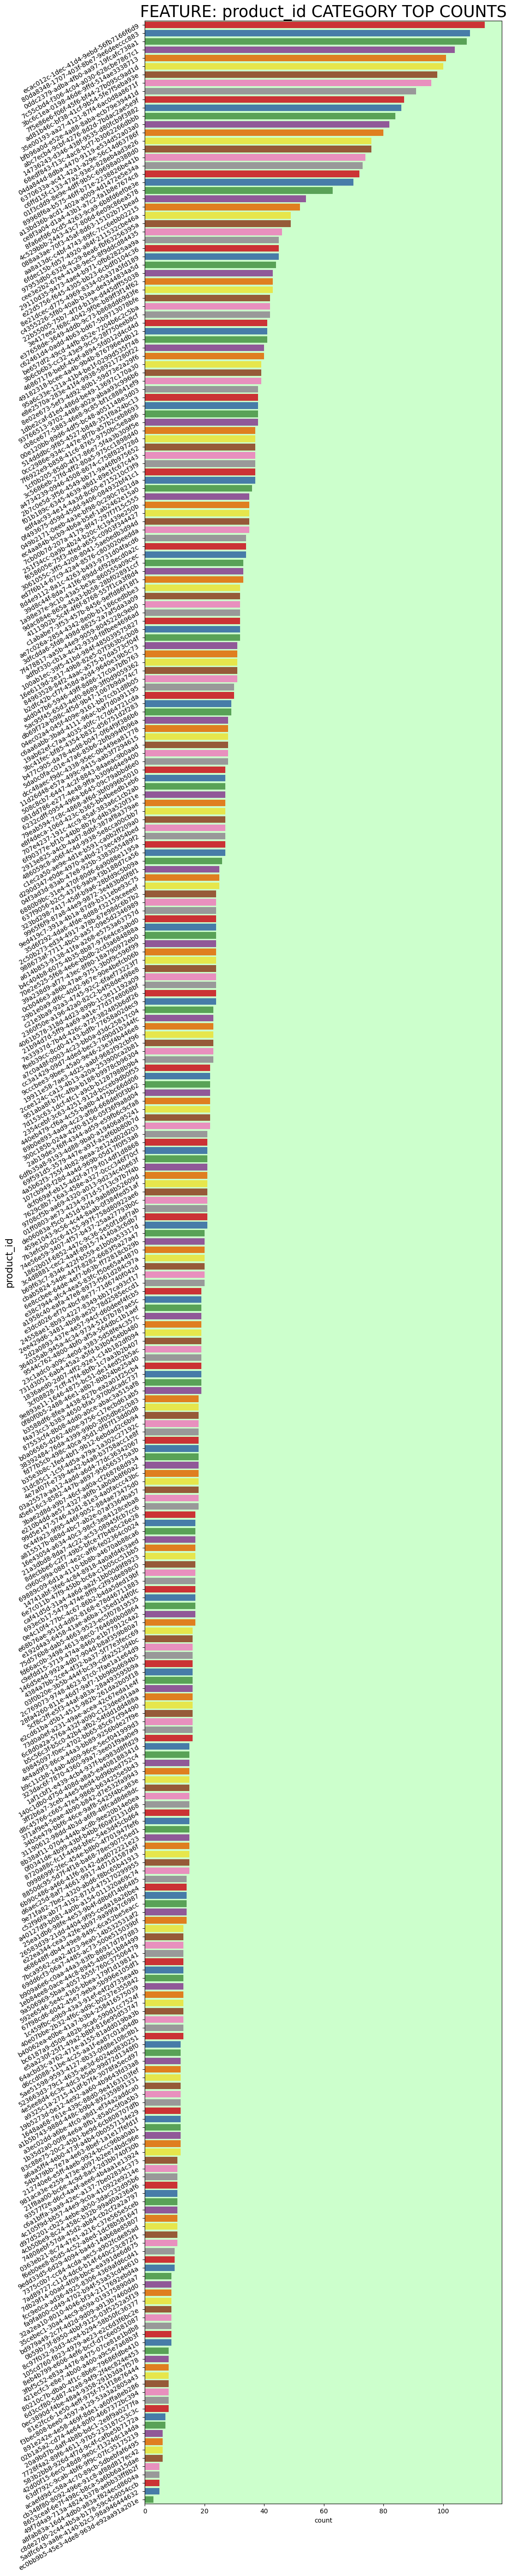

In [352]:
catcounts('product_id','Set1')

enter 1 for horizontal: 1


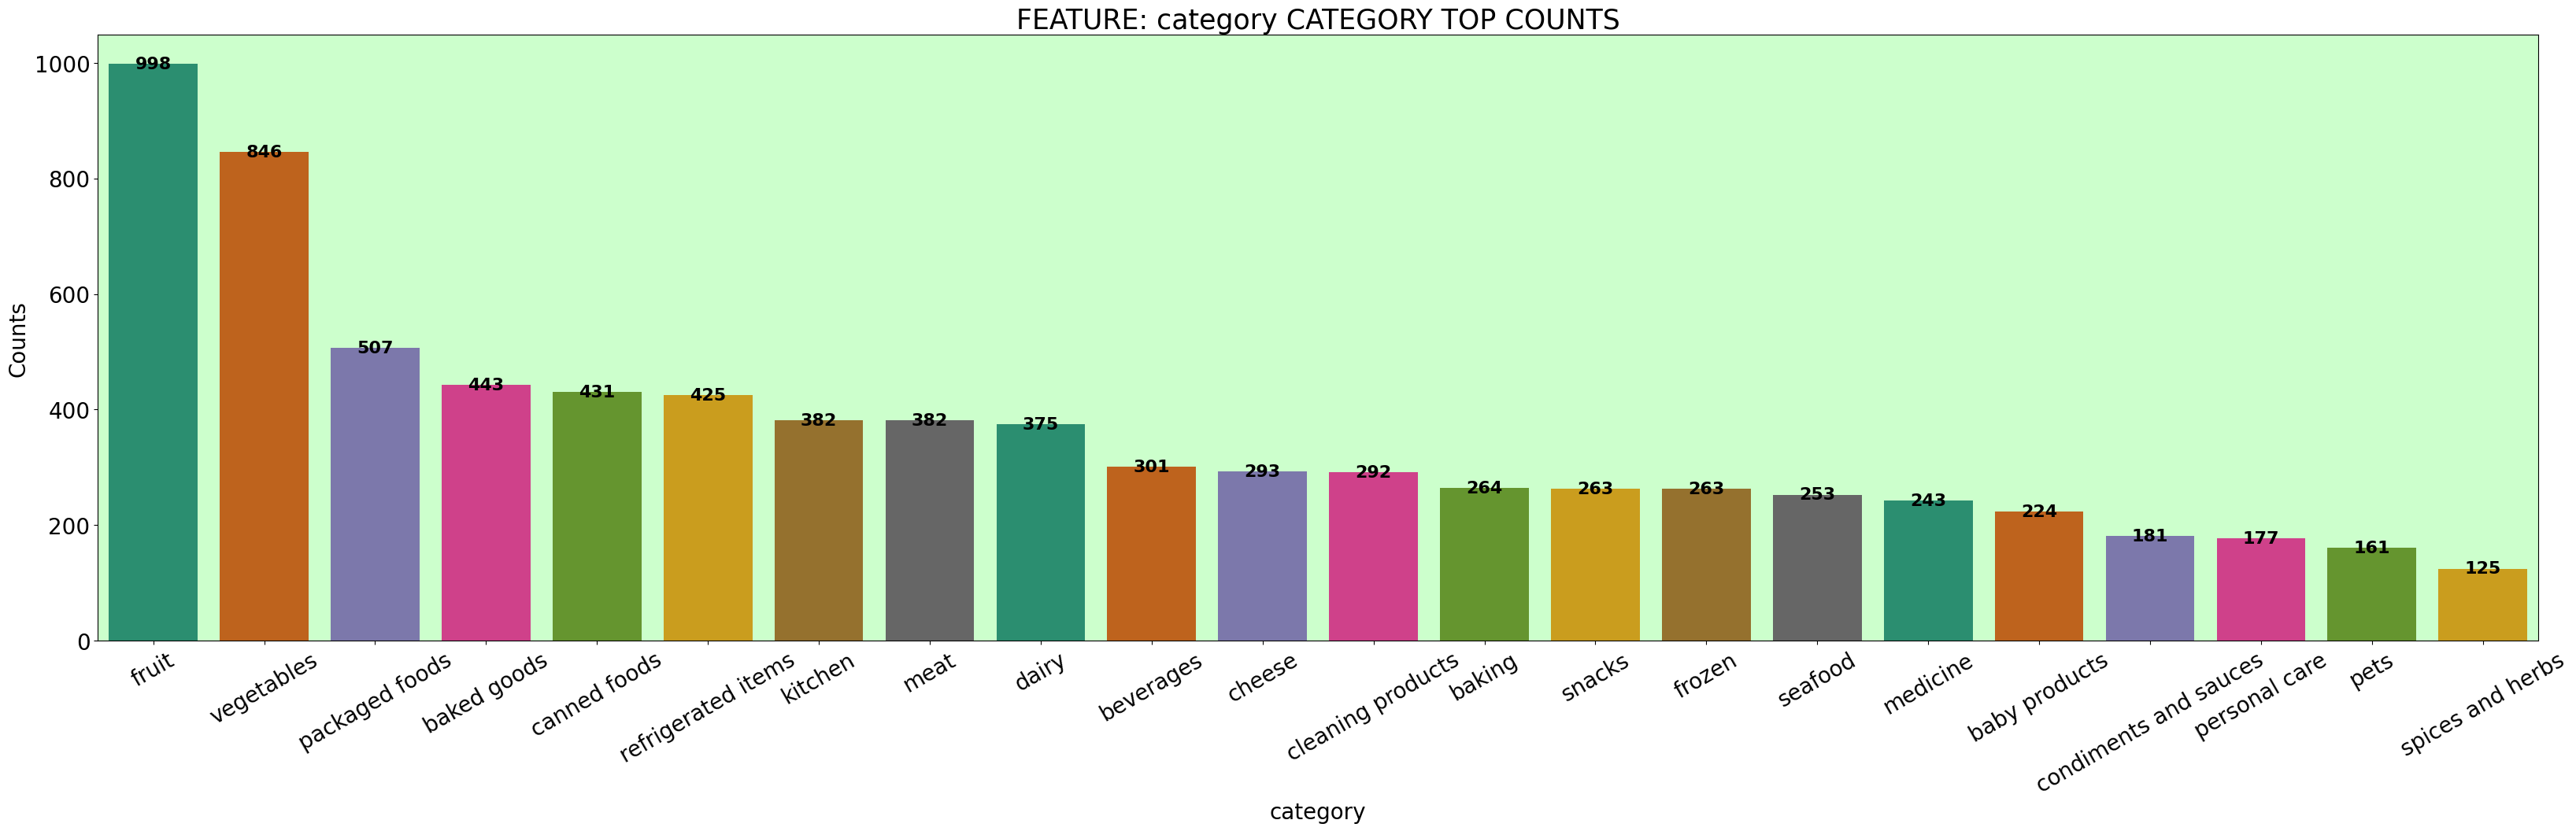

In [353]:
catcounts('category','Dark2')

* Fruits, Vegetables, Packaged foods and baked goods were the top selling categories

enter 1 for horizontal: 1


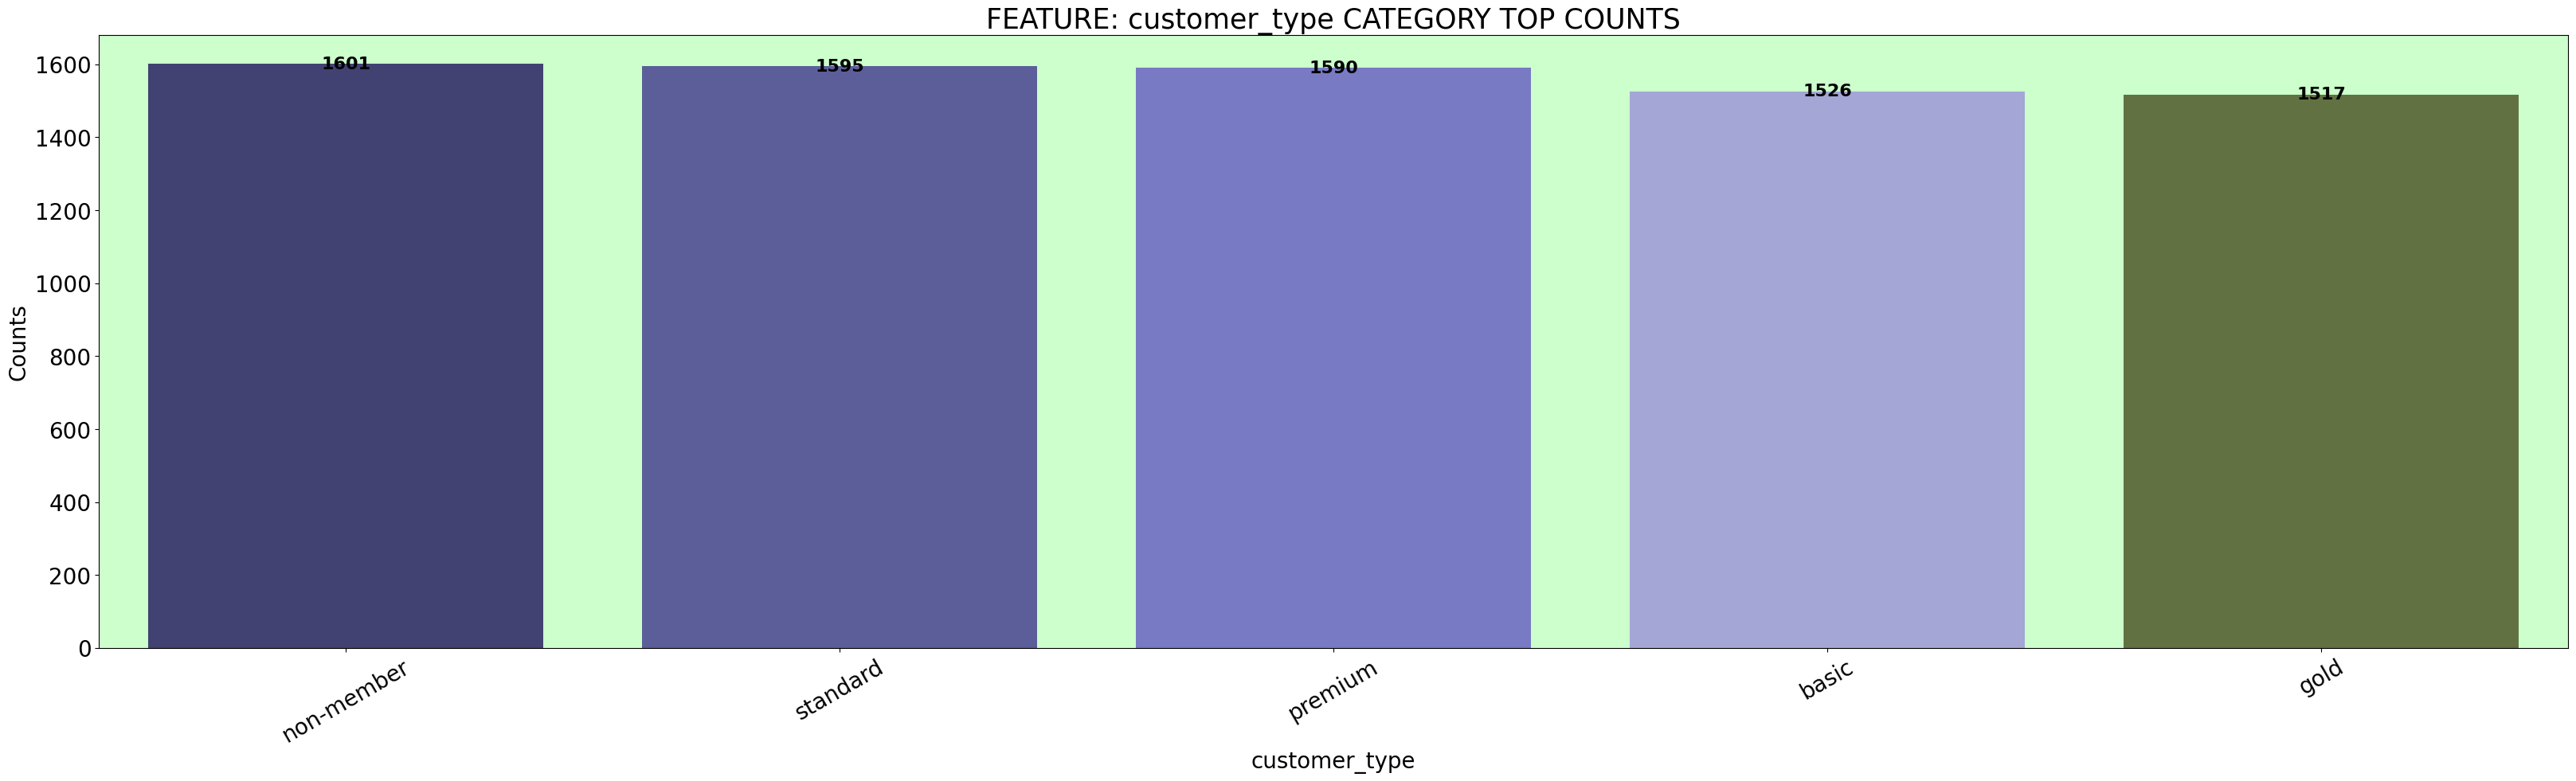

In [354]:
catcounts('customer_type','tab20b')

* Non-Members of customer type were the people who highly visiting the store.


enter 1 for horizontal: 1


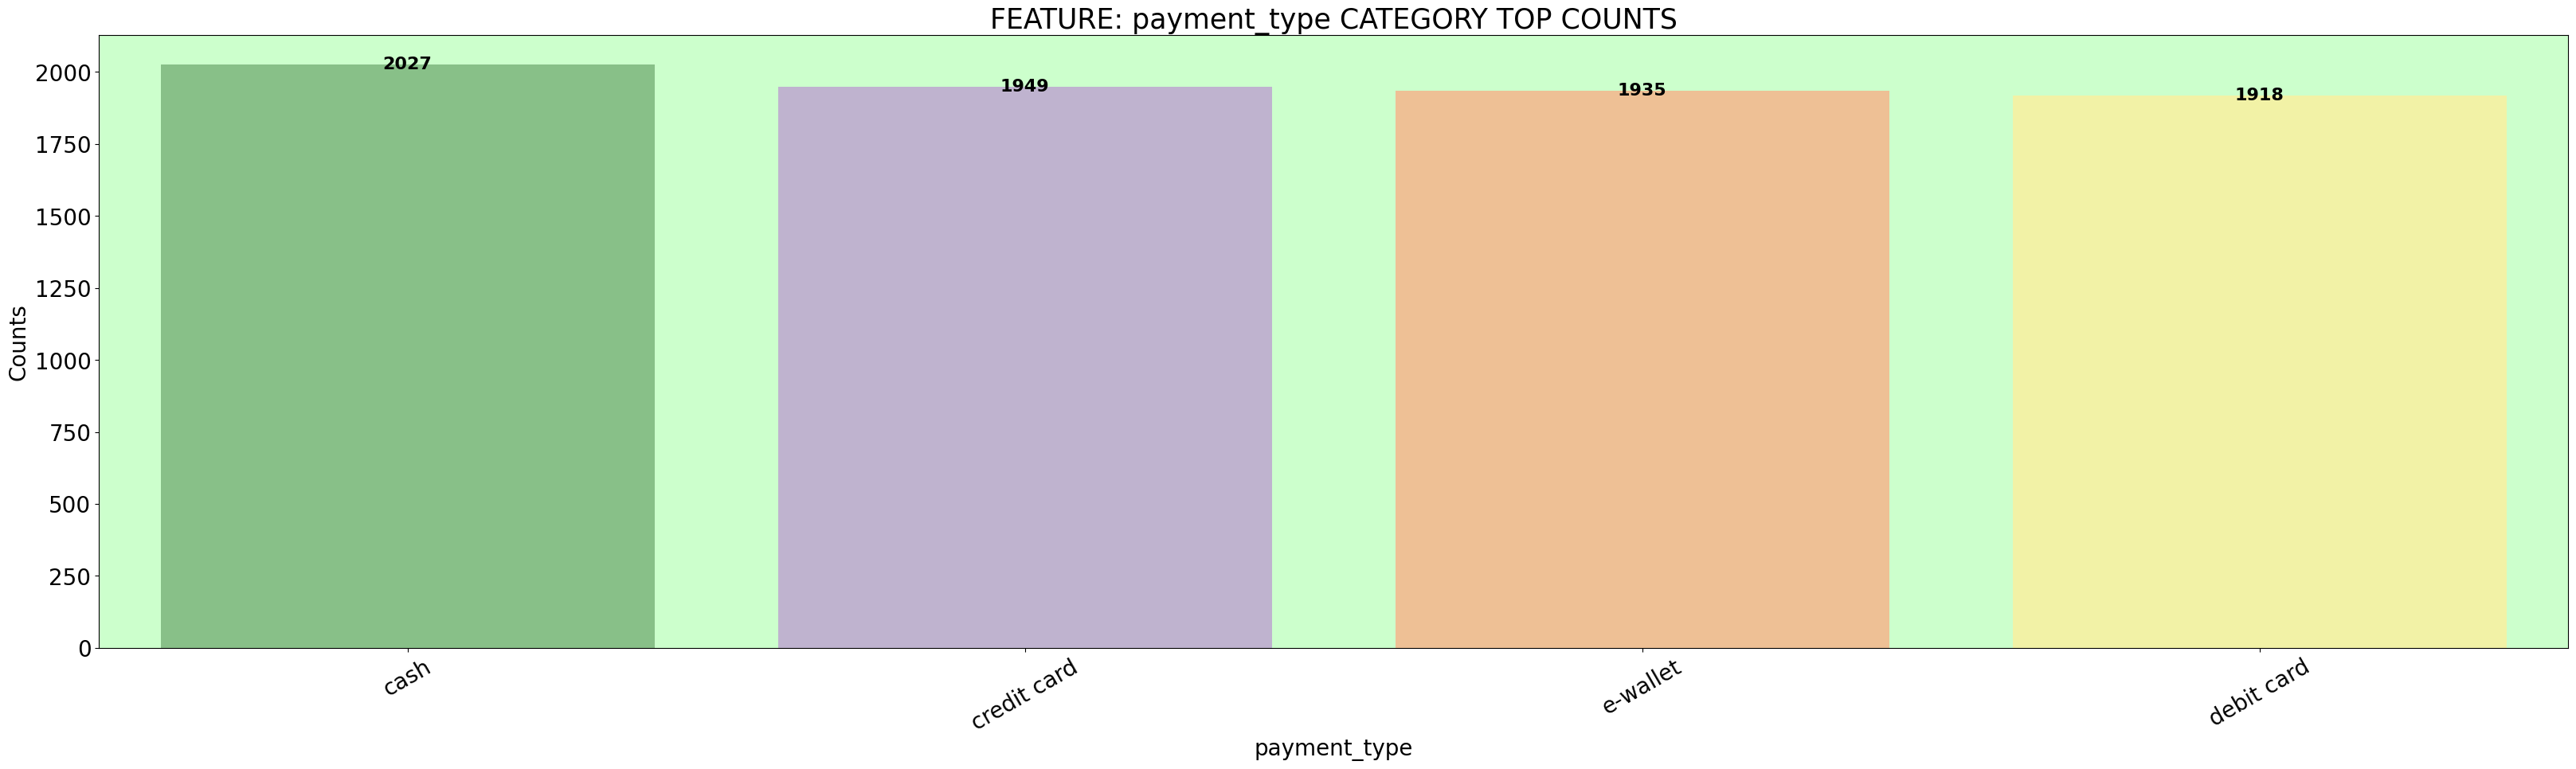

In [355]:
catcounts('payment_type','Accent')

* Mode of Payment : Cash is the top most used by people to pay in the stores.
* Credit Card is the 2nd and its quite impressive to know this information

In [356]:
def histo(fea,col):
    plt.figure(figsize=(30,8))
    sns.histplot(data=d,x=fea,kde=True,color=col,bins=30)
    plt.title(f"Feature: {fea} Distribution",fontsize=30)
    plt.ylabel('count',fontsize=15)
    plt.xlabel(fea,fontsize=15)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()

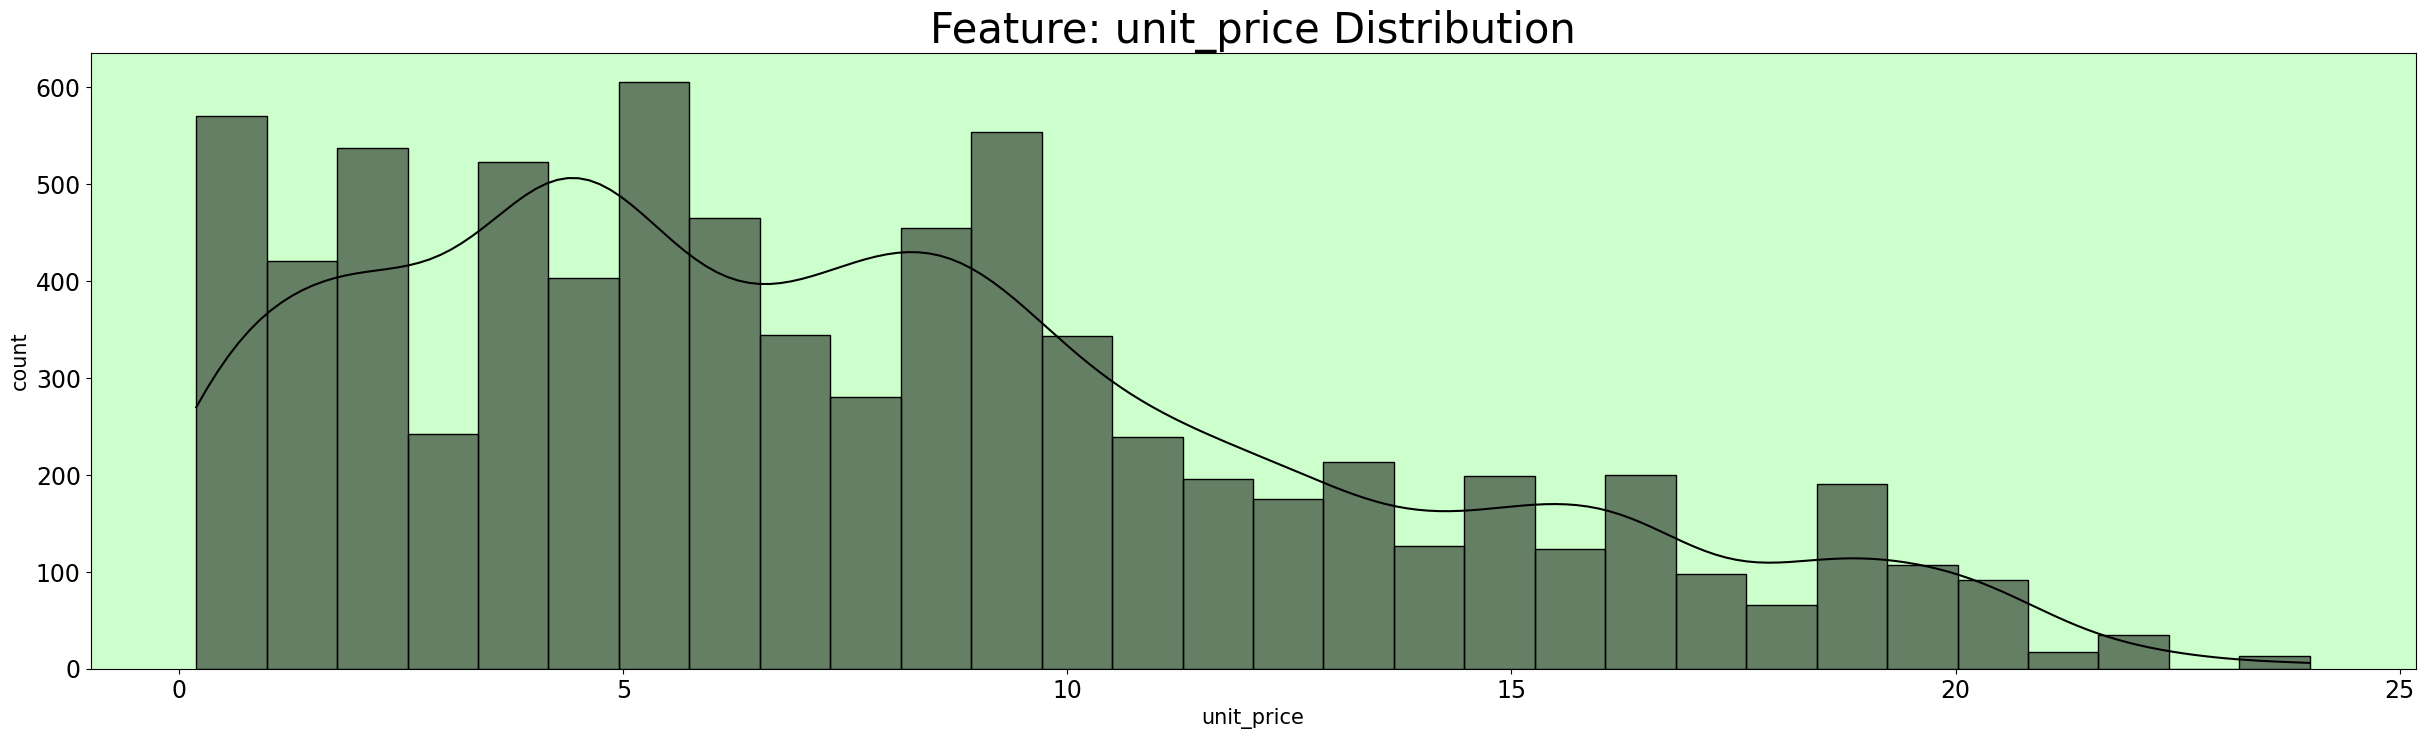

In [357]:
histo(num[0],'k')

* Unit Price distribution is right skewed in nature

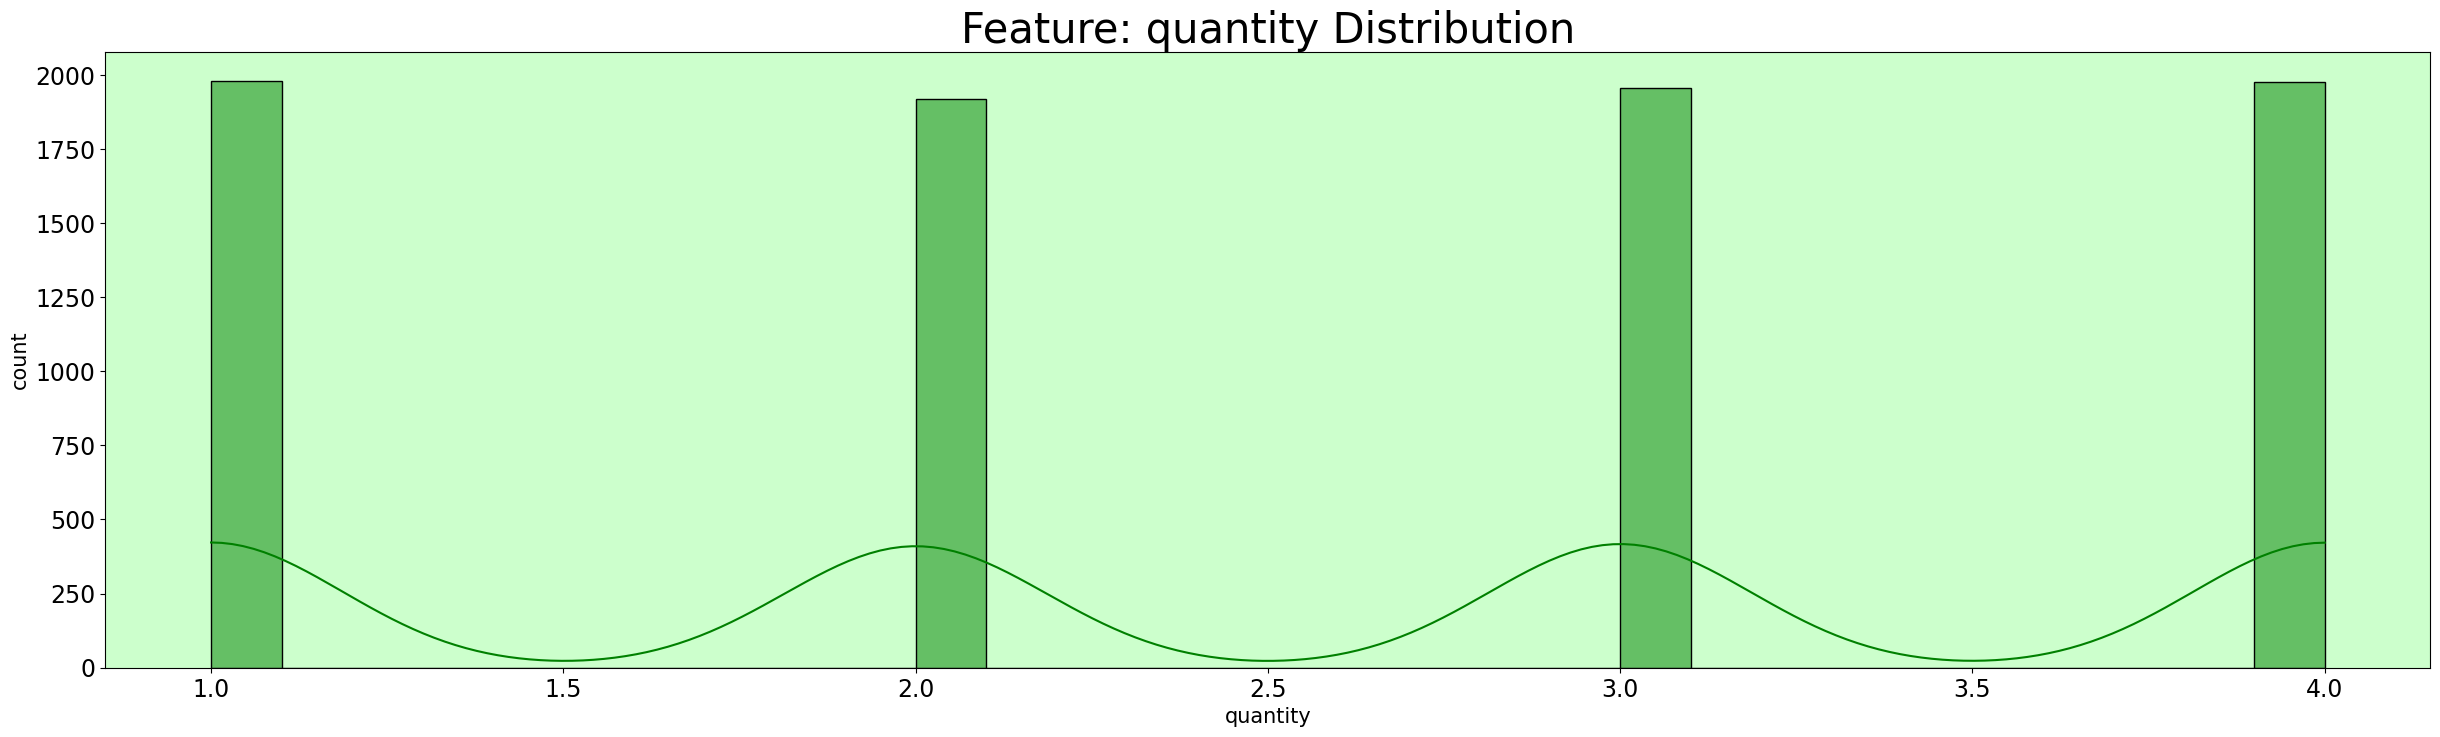

In [358]:
histo(num[1],'g')

* In the place of Quantity Distribution, there is a multi-modal bins are rising in 1,2, 3 and 4 which looks similar with its frequency of values

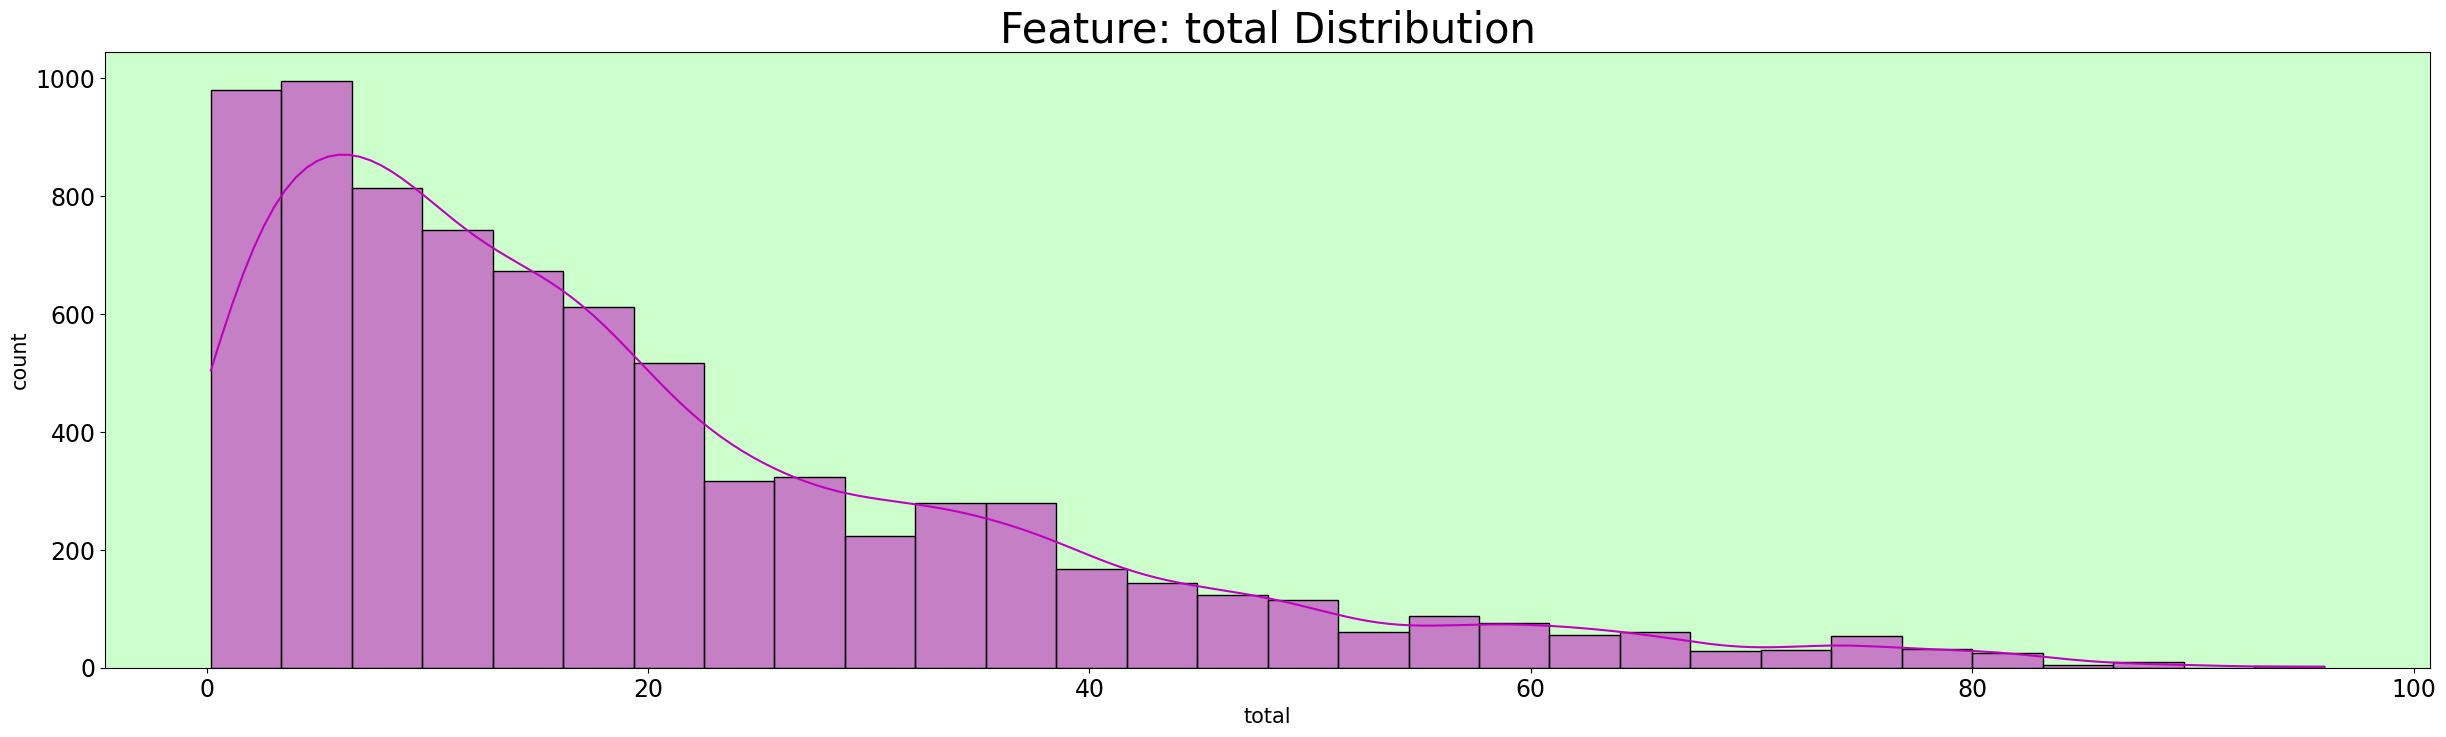

In [359]:
histo(num[2],'m')

* In Total Sale also skewed on right side of graph more. In later part data transformation technique will be used to address this issue to conver it as gausssian curve.


In [360]:
def box(fea,col):
    plt.figure(figsize=(30,8))
    sns.boxplot(data=d,x=fea,color=col)
    plt.title(f"Feature: {fea} Distribution",fontsize=30)
    plt.xlabel(fea,fontsize=15)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()

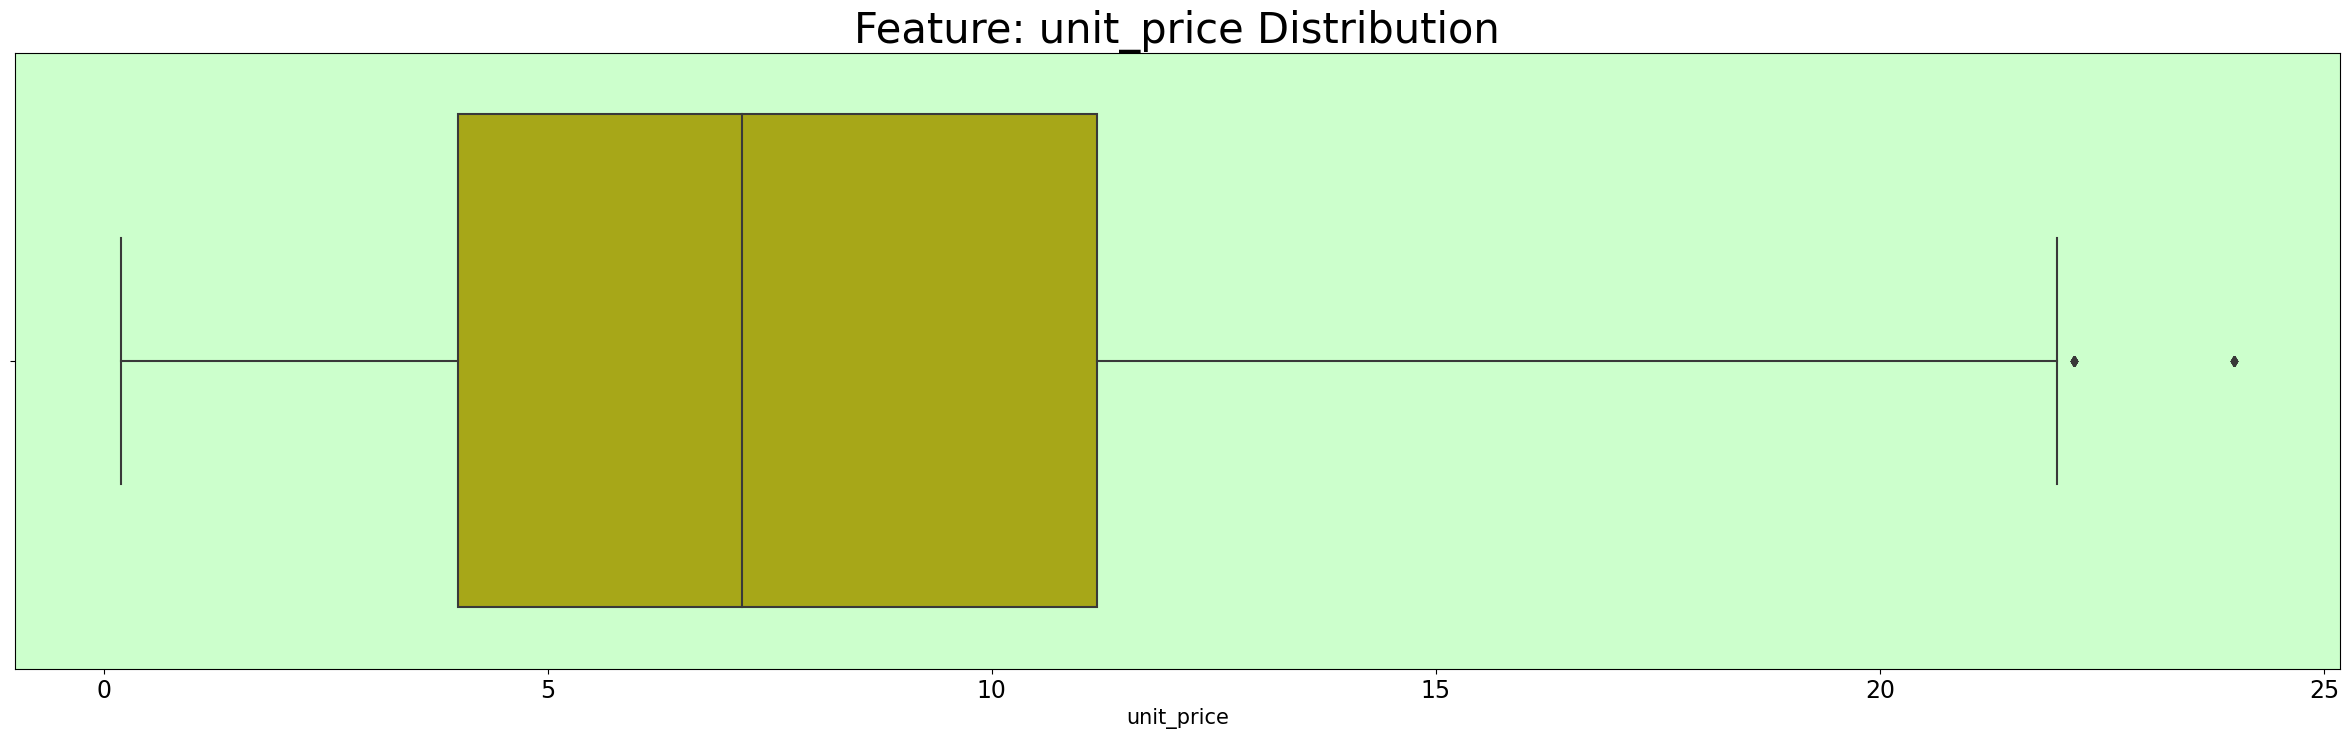

In [361]:
box(num[0],'y')

* In Unit Price Distribution there is few outliers and more values remain between 4(.25) and 11(.75)

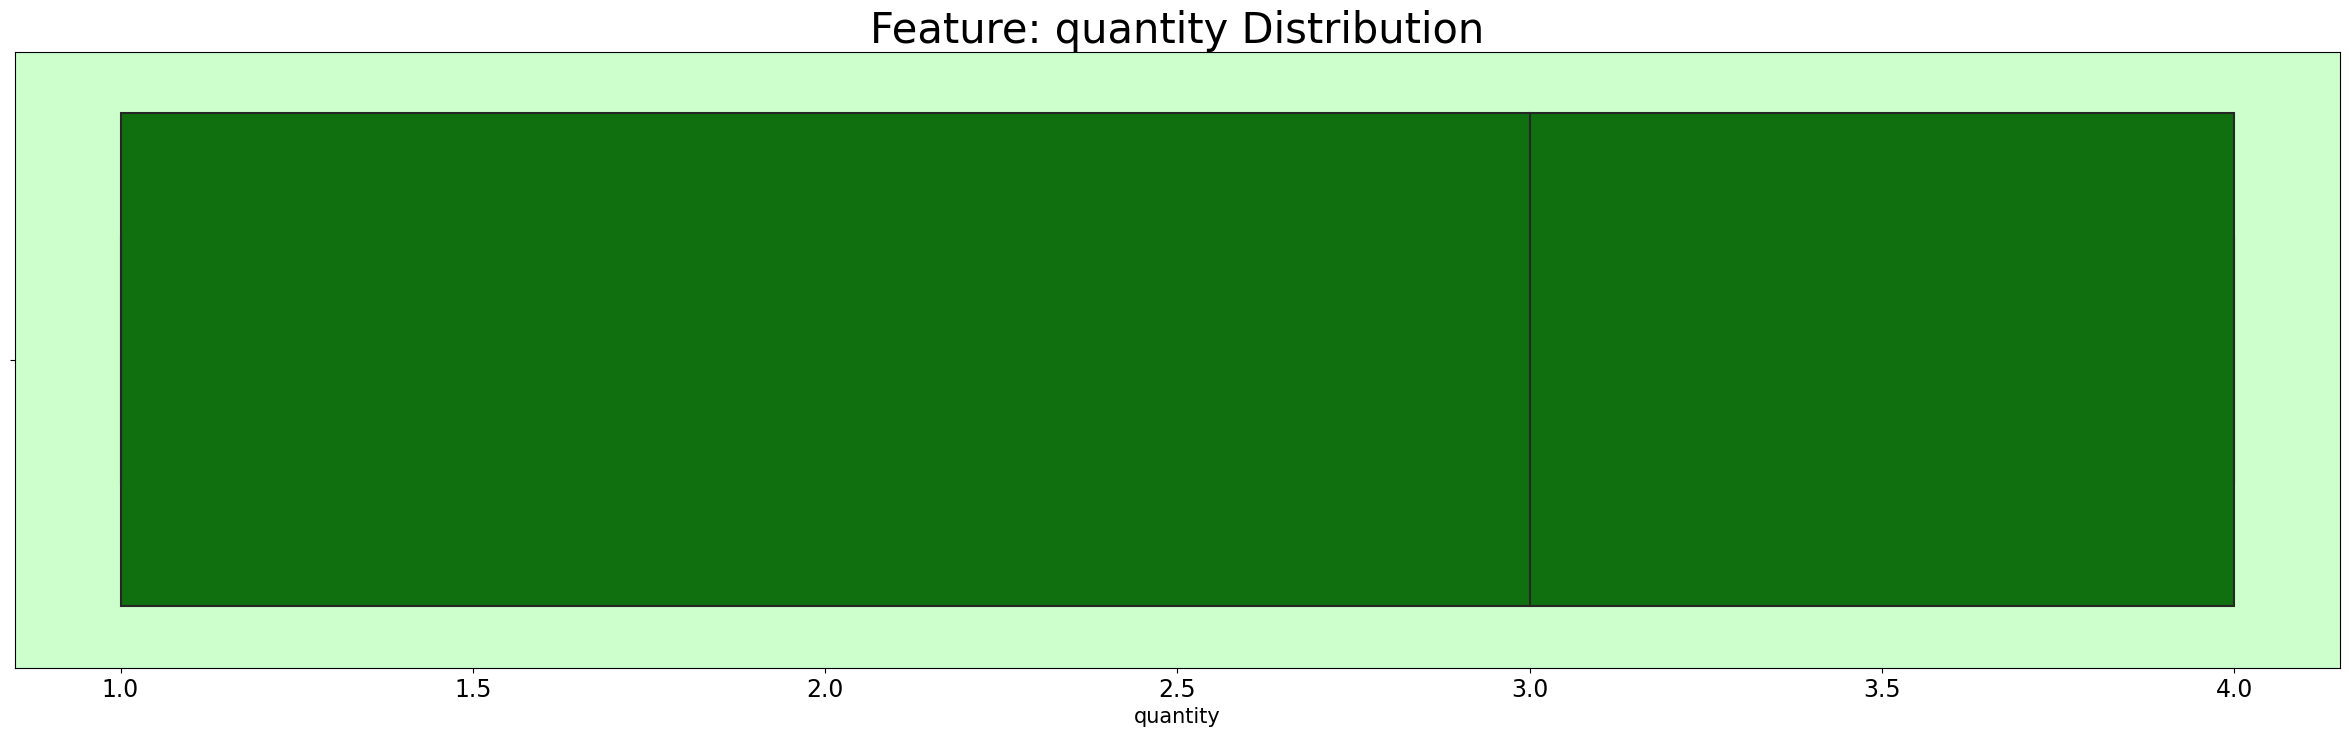

In [362]:
box(num[1],'g')

* we already knew that Quantity feature have only 4 values

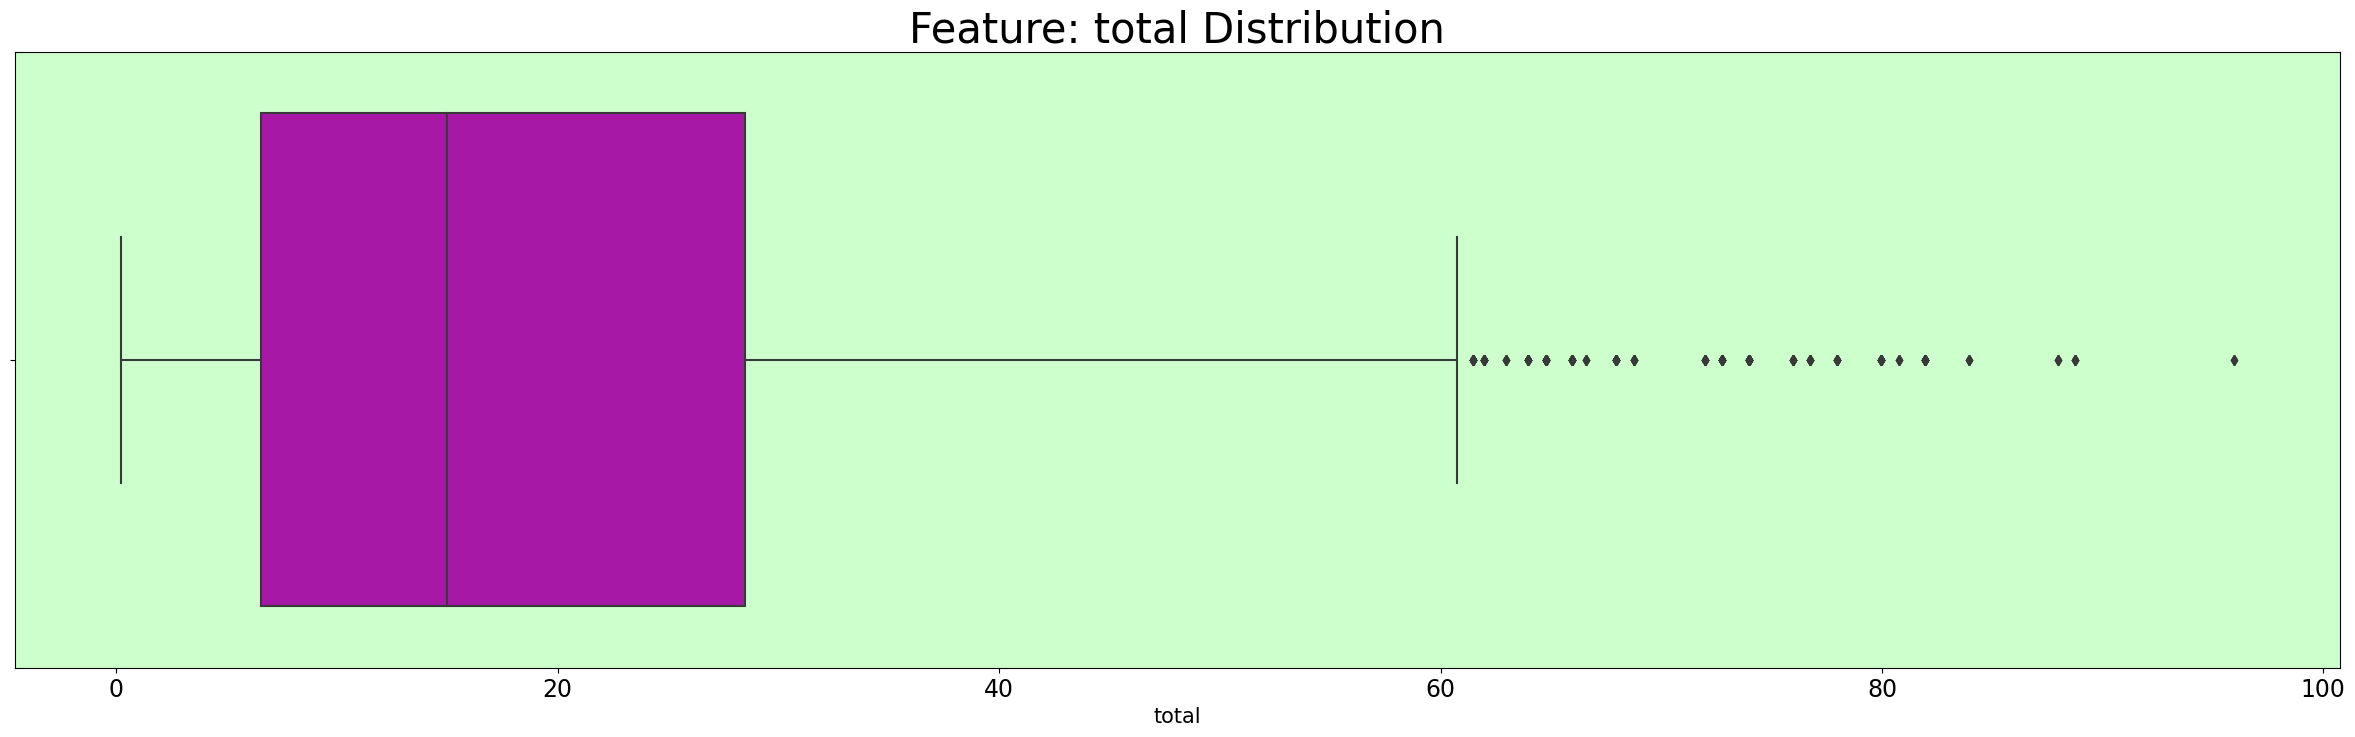

In [363]:
box(num[2],'m')

* Total sales of store contain outliers and treatment is required further for analysis and it will be done latter

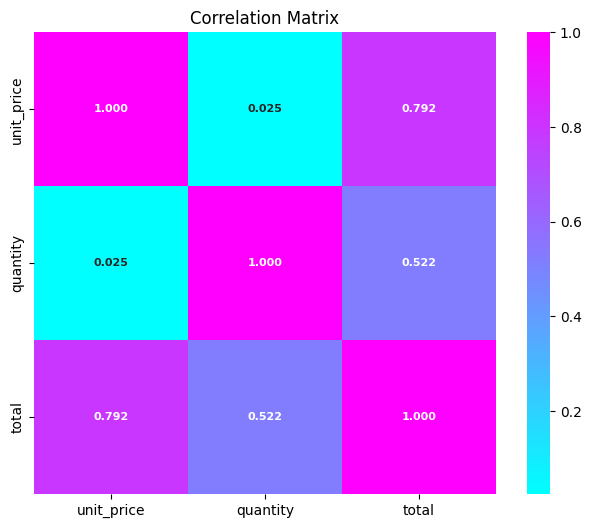

In [364]:
plt.figure(figsize=(8,6))
sns.heatmap(d.corr(numeric_only=True),square=True,fmt='.3f',annot=True,
            annot_kws={'size':'8','fontweight':'bold'},cmap='cool')
plt.title('Correlation Matrix')
plt.show()


* Correlations:
1. Unit price vs Quantity (0.0246)-which is a weak positive correlation between them.
2. Quantity vs Total (0.521)- which says that there is a Modereate positive correlation btw them.
3. Total vs Unit price (.792)- which implies very strong positive relationship between these two features.

In [365]:
def reg(f1,f2,col):
    plt.figure(figsize=(20,7))
    sns.regplot(data=d,x=f1,y=f2,scatter=True,color=col)
    plt.title(f"Regression Plot: {f1} vs {f2}\n Correlation r: {round(d[f1].corr(d[f2]),4)}",fontsize=20)
    plt.xlabel(f1,fontsize=15)
    plt.ylabel(f2,fontsize=15)
    plt.show()

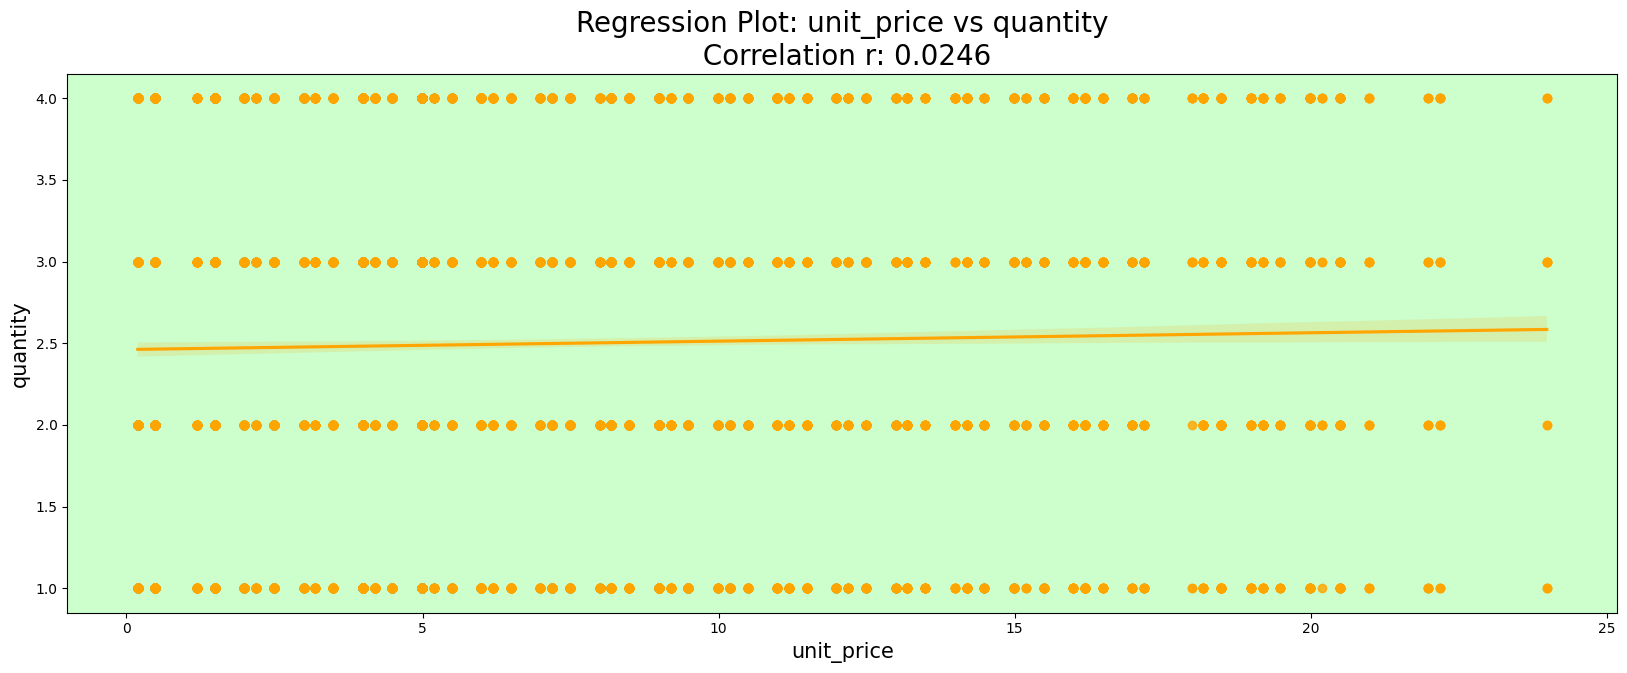

In [366]:
reg(num[0],num[1],'orange')

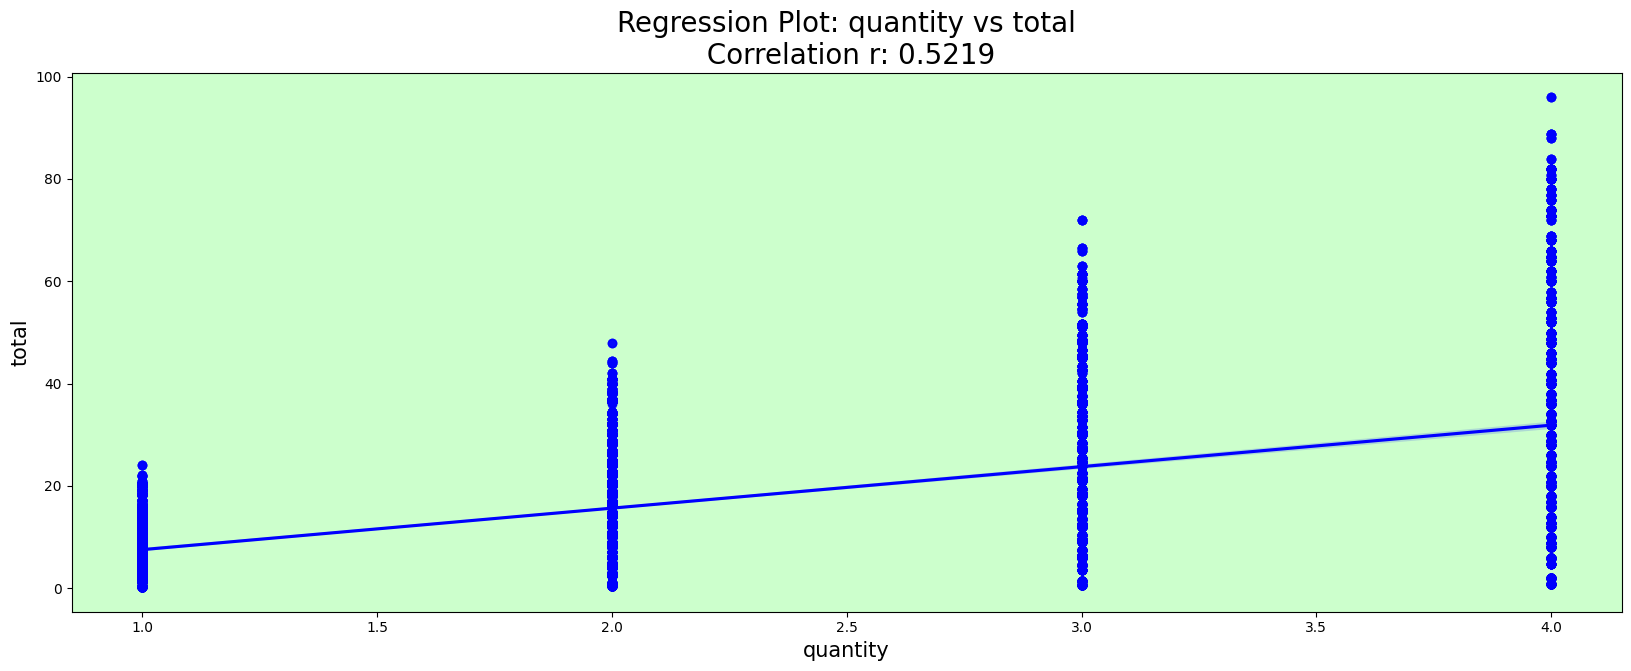

In [367]:
reg(num[1],num[2],'b')

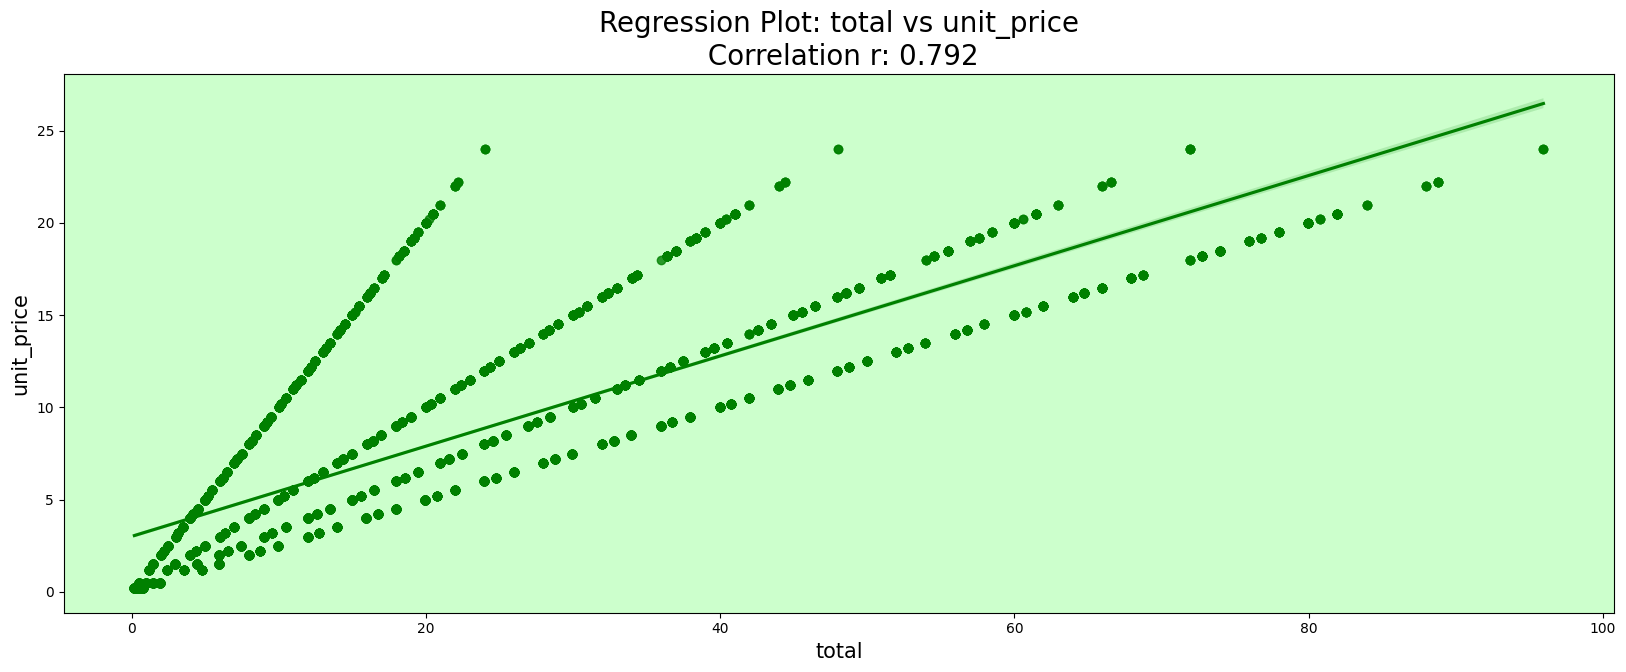

In [368]:
reg(num[2],num[0],'g')

In [369]:
def nc(nu,ca):
    plt.figure(figsize=(20,8))
    sns.boxplot(data=d,x=ca,y=nu)
    plt.title(f"Numeric Feature:{nu} vs Categorical Feature: {ca}",fontsize=25)
    plt.xlabel(ca,fontsize=15)
    plt.xlabel(nu,fontsize=15)
    plt.xticks(rotation=30,fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

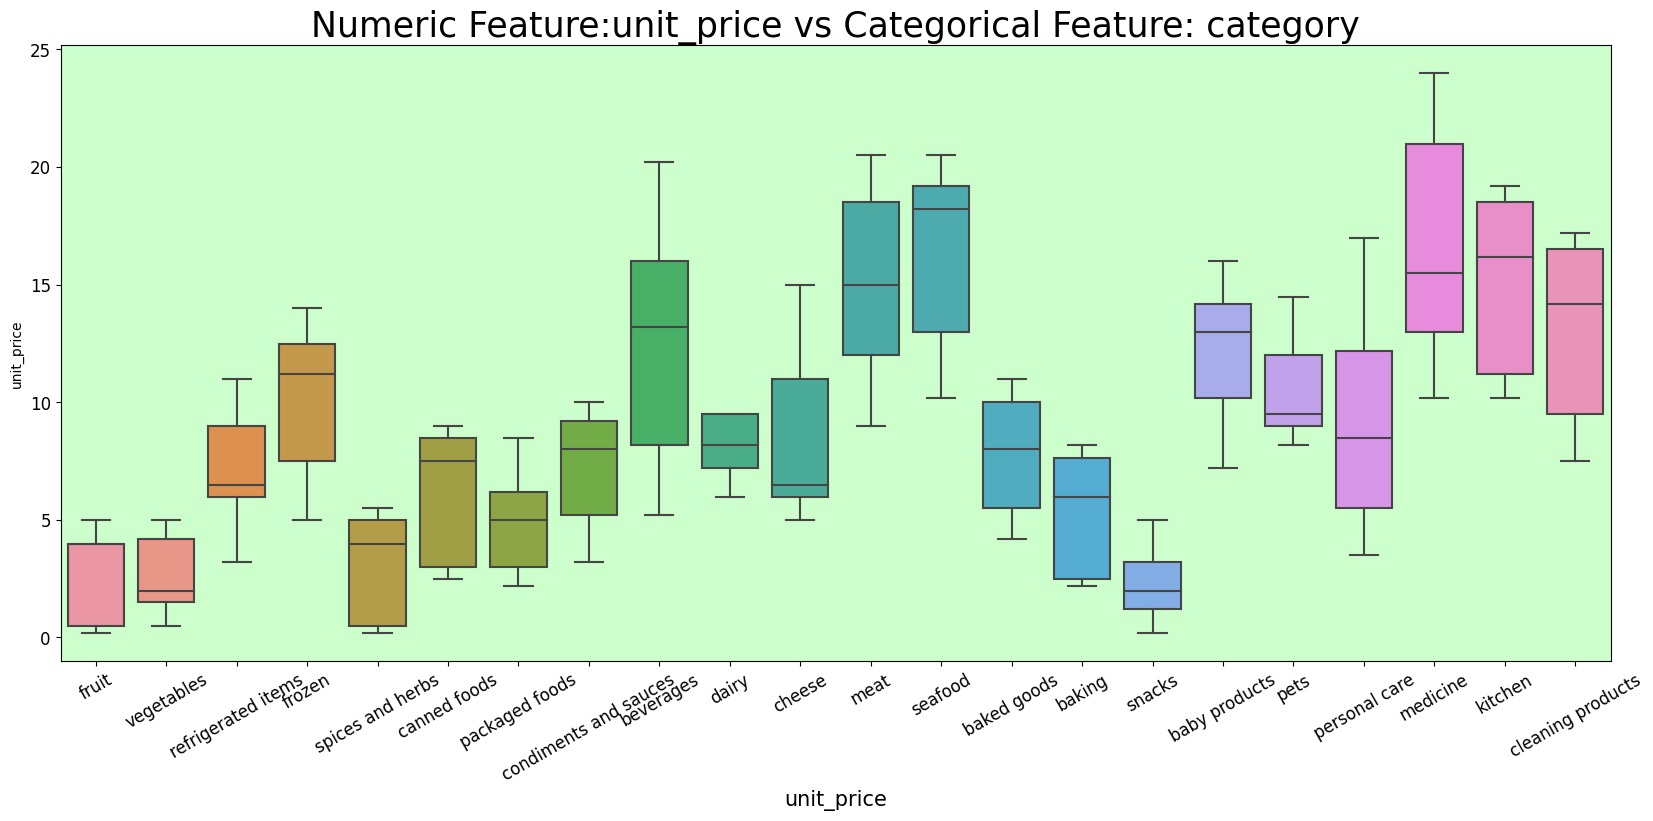

In [370]:
nc(num[0],'category')

* From the above boxplots of Unit price against the Category feature, the spread among the categories are uneven and variations we can observed easily.

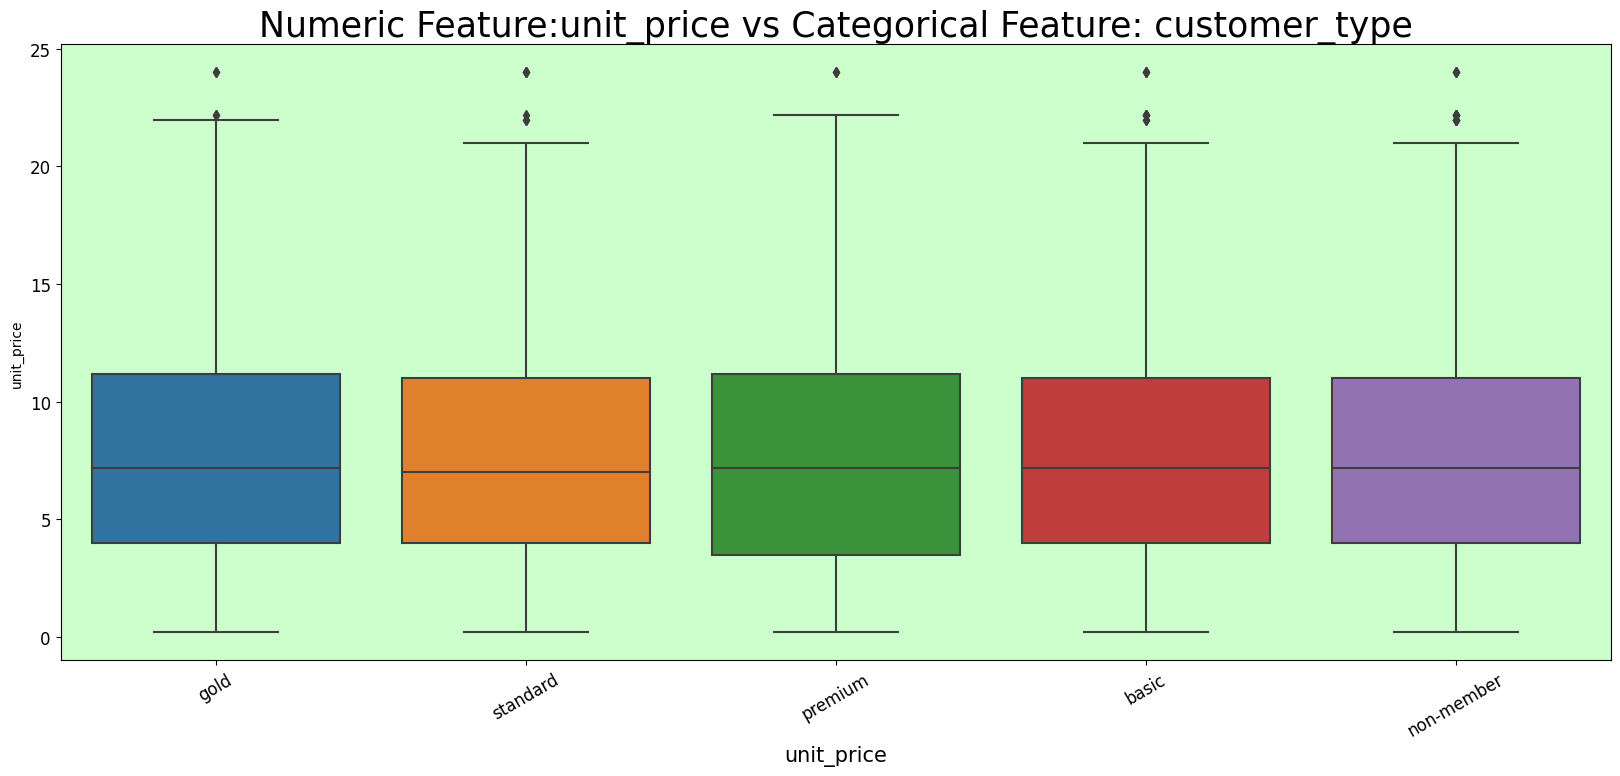

In [371]:
nc(num[0],'customer_type')

* The spread of distributions of Customer type is same across the Unit price of the Store and very few outliers are there.

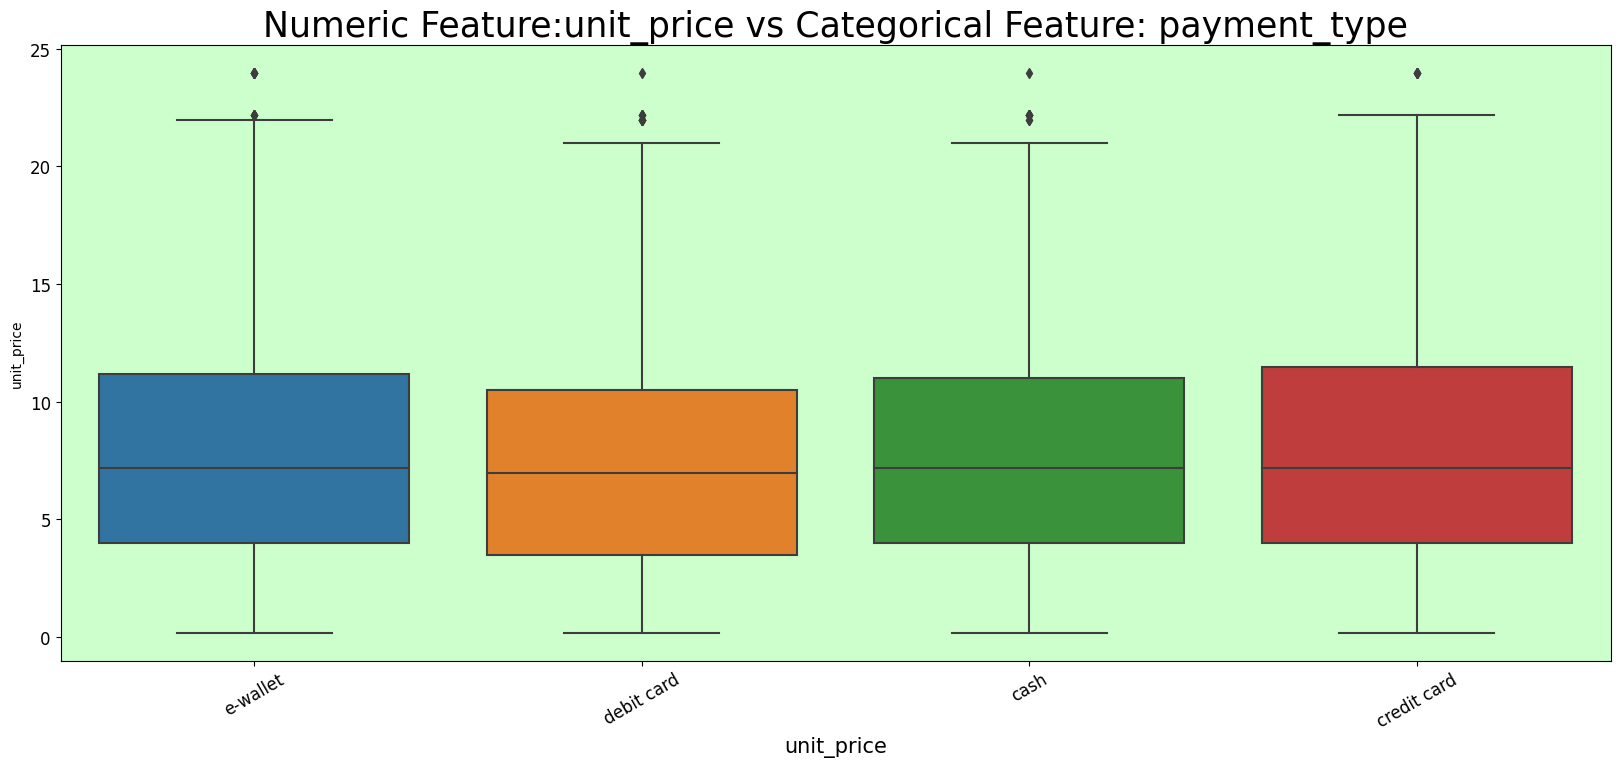

In [372]:
nc(num[0],'payment_type')

* The spread of data for the Payment type across the Unit price is same and also some outliers are present there

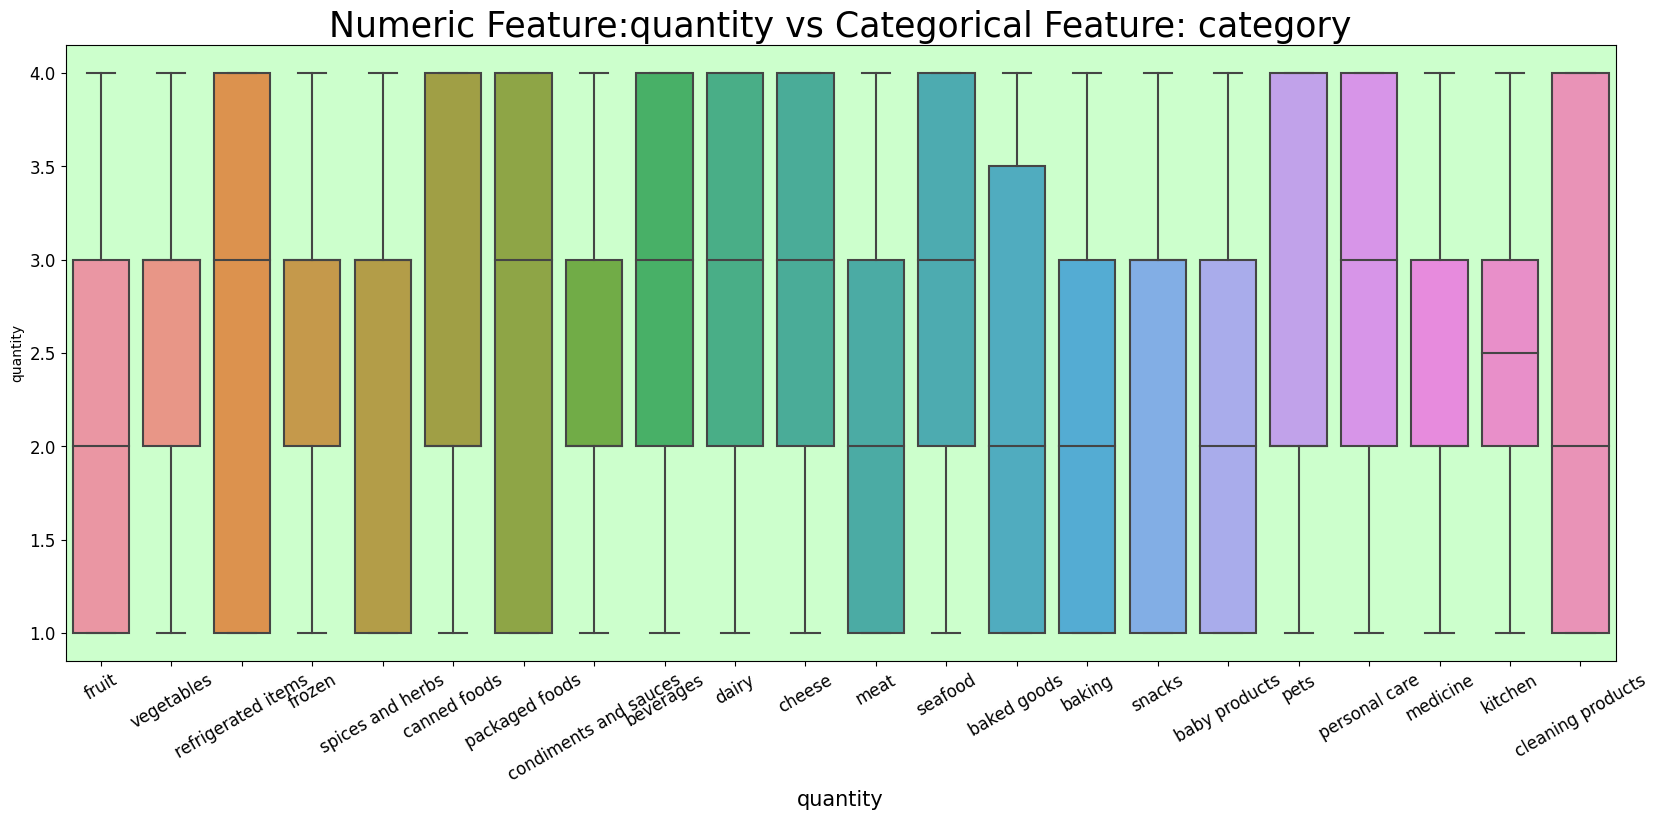

In [373]:
nc(num[1],'category')

* Minimum is equal to lower quartile and Maximum is equal to upper quartile -----> Refrigerated items, Packaged foods and Cleaning Products
* Note: If median is equal to upper quartile or lower quartile that median line will  not be visible.(vegetables, frozen,canned foods, and etc.)

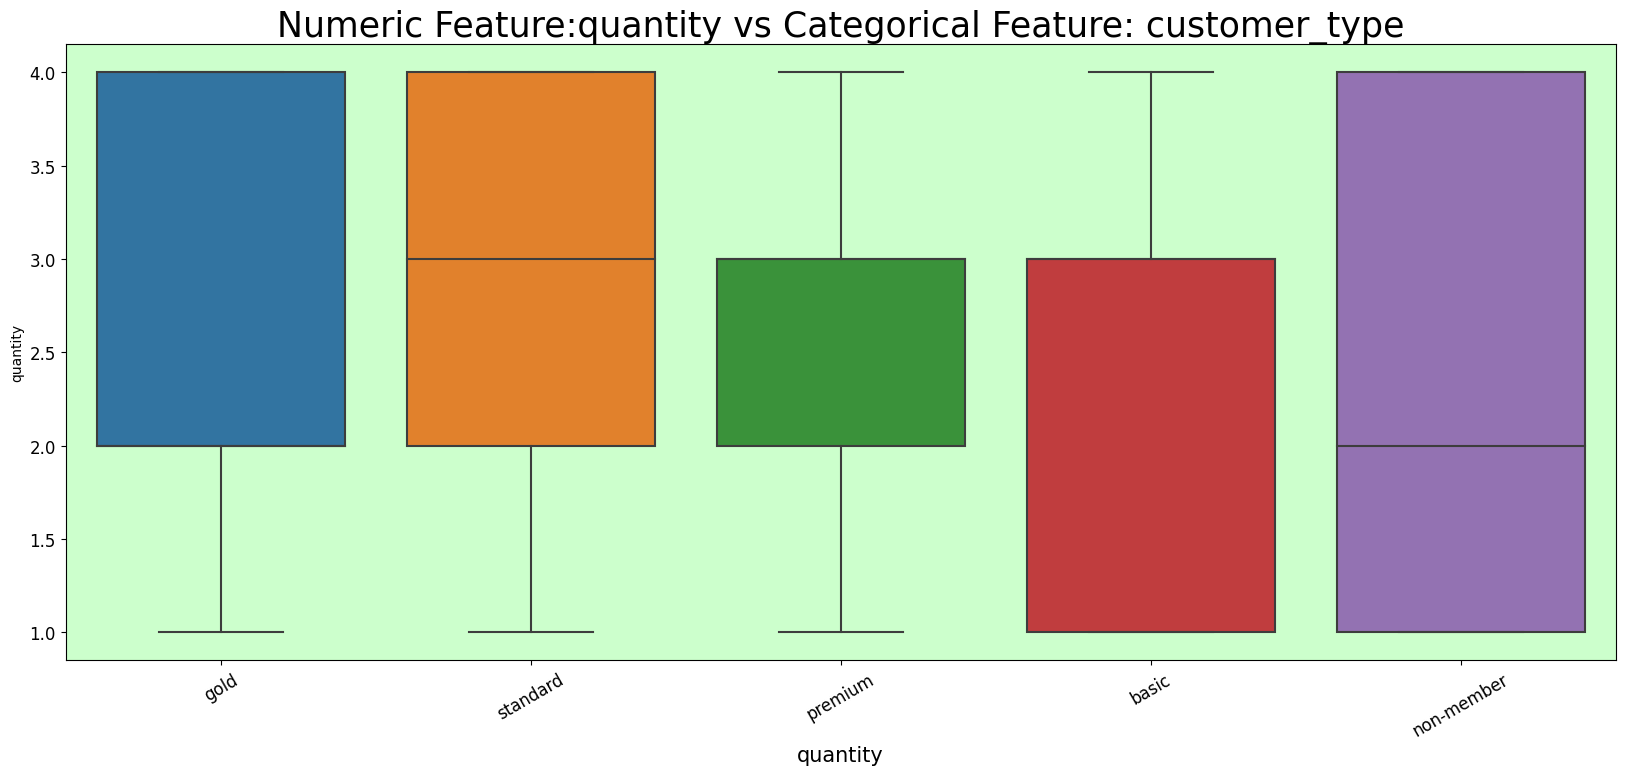

In [374]:
nc(num[1],'customer_type')

* quantity spread across the customer type is varies a lot.

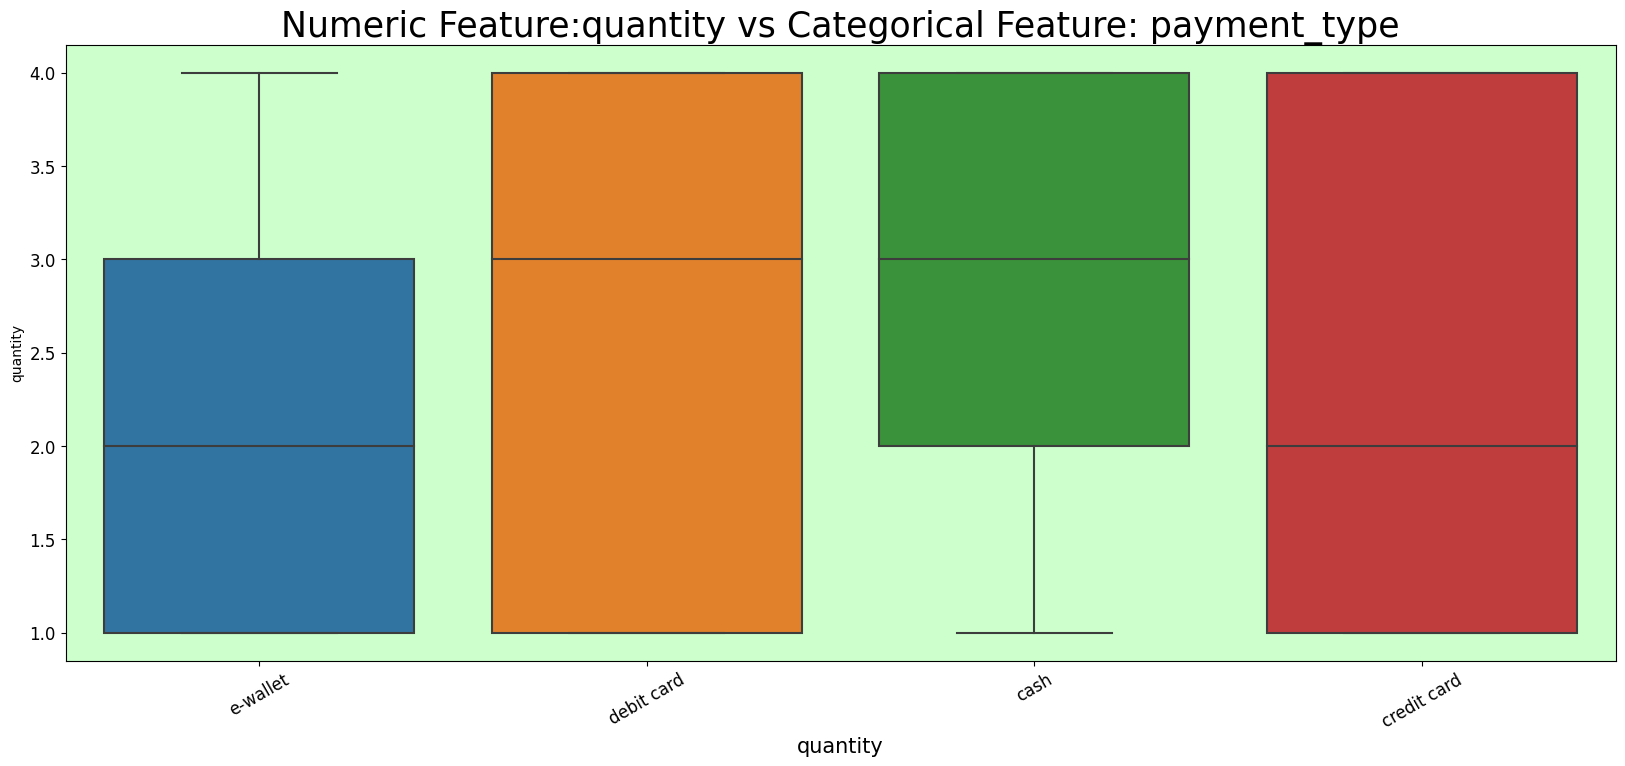

In [375]:
nc(num[1],'payment_type')

* Quantity across payment type is also not even spreaded.

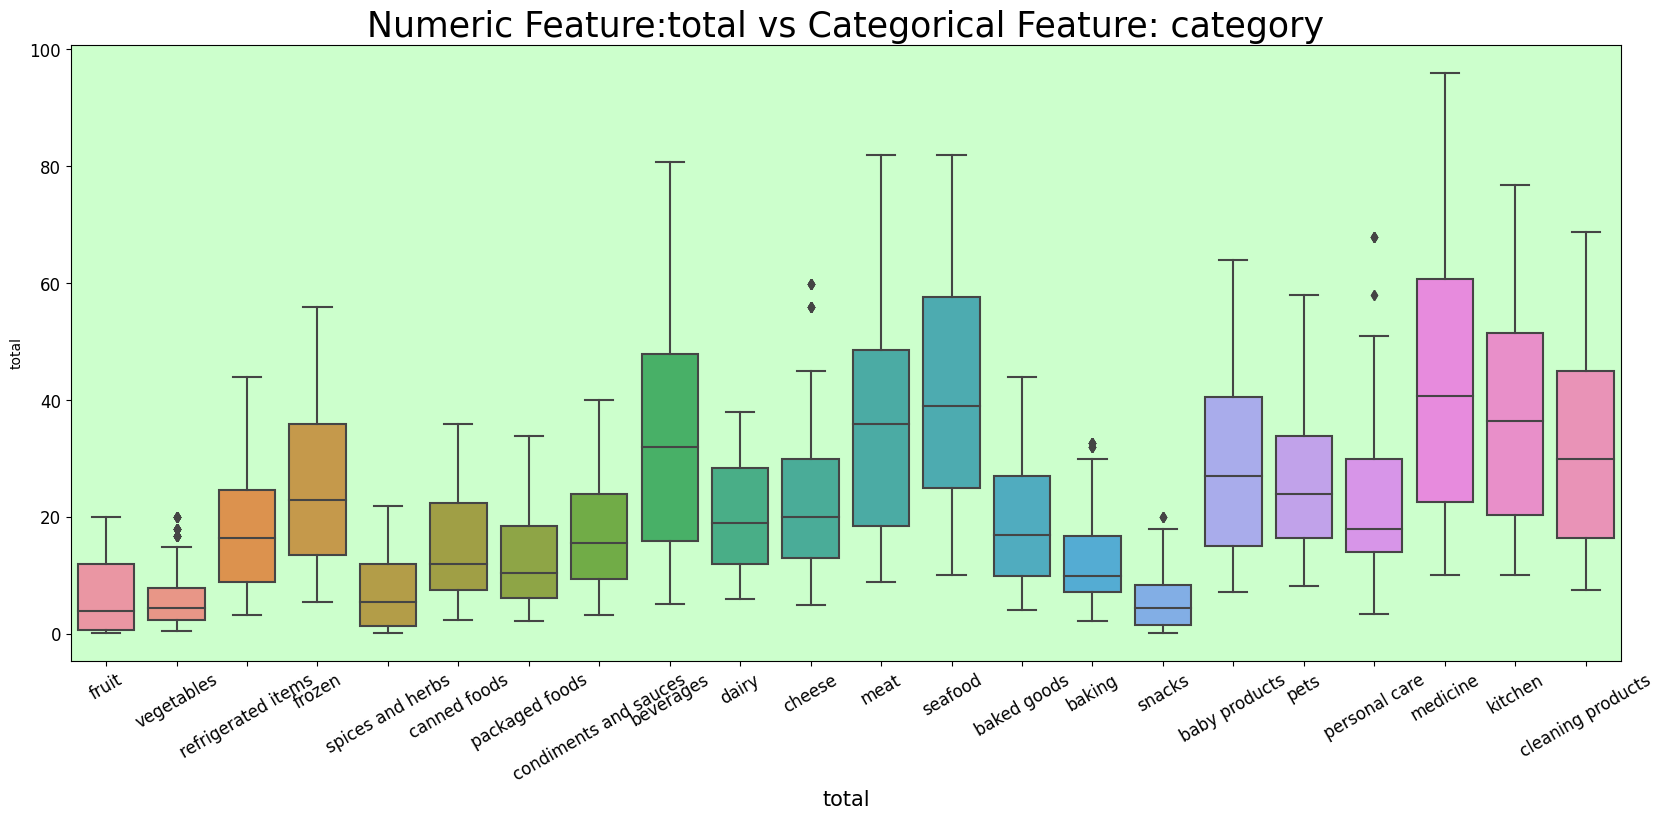

In [376]:
nc(num[2],'category')

* Spread of  total sales among the cateory is larger for medicine, kitchen, seafood, meat and bevarages

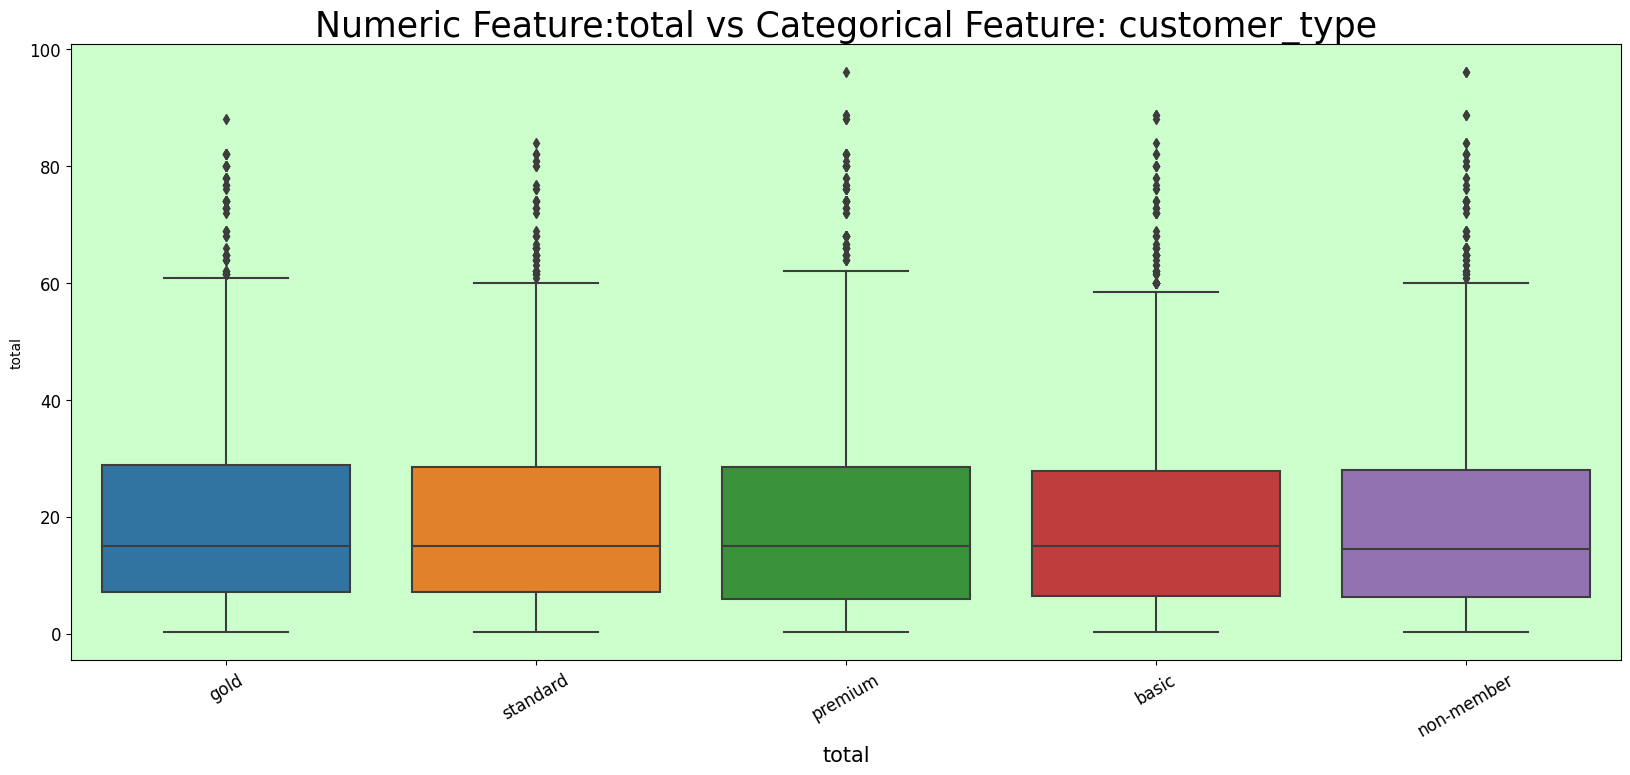

In [377]:
nc(num[2],'customer_type')

* Total sale against the cutomer types looks identitcal acrros the boxplot

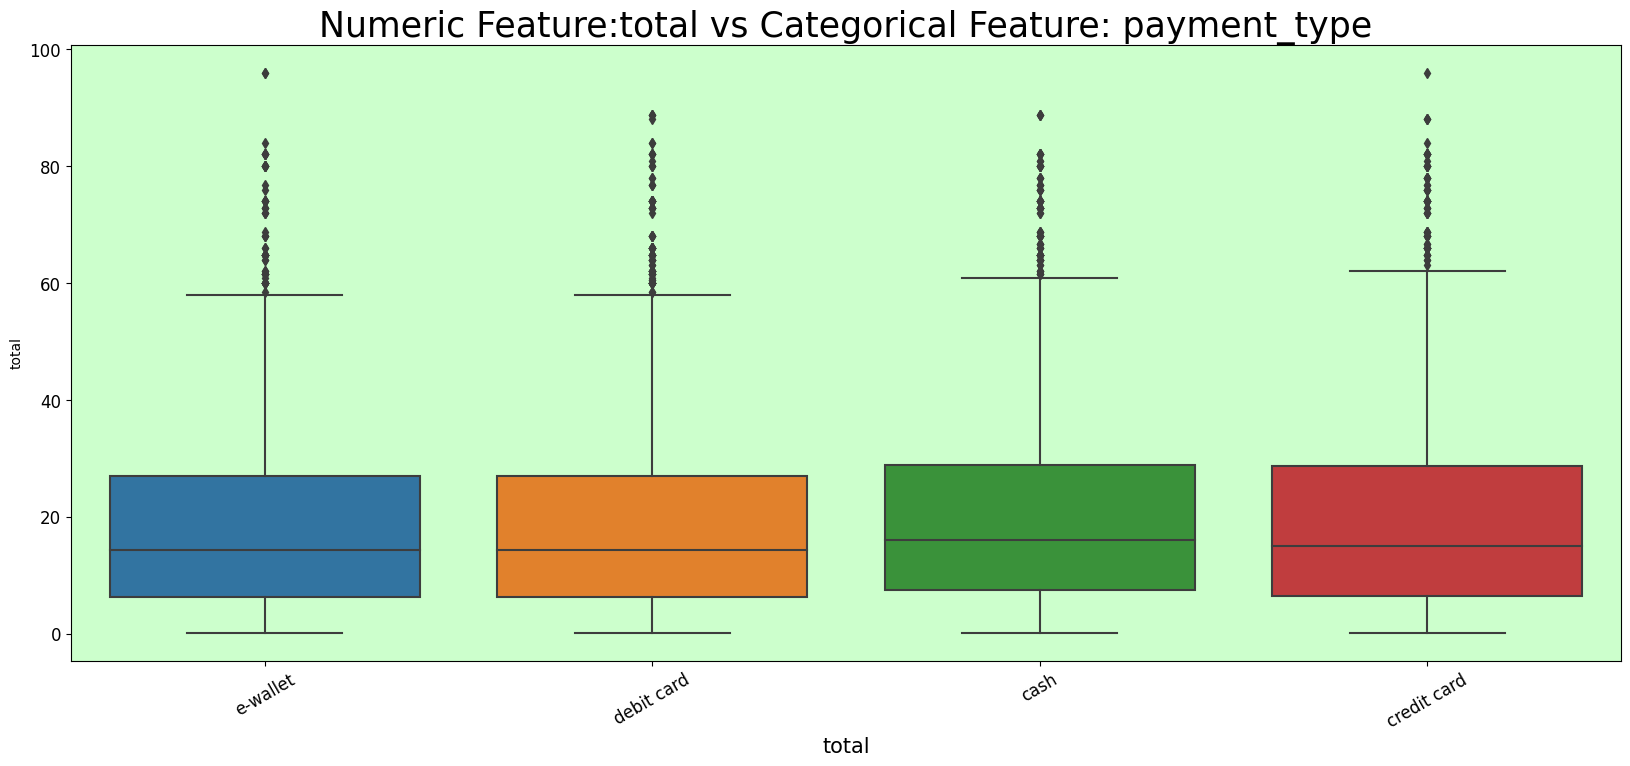

In [378]:
nc(num[2],'payment_type')

* distiribution of payment across the total sale is also looks very similar to each other.

In [379]:
def numcatkde(num,ca):
    plt.figure(figsize=(20,8))
    sns.kdeplot(data=d,x=num,hue=ca,fill=True)
    plt.title(f"Numeric Feature: {num} vs Categorical Feature: {ca} Desnityplot")
    
    plt.show()

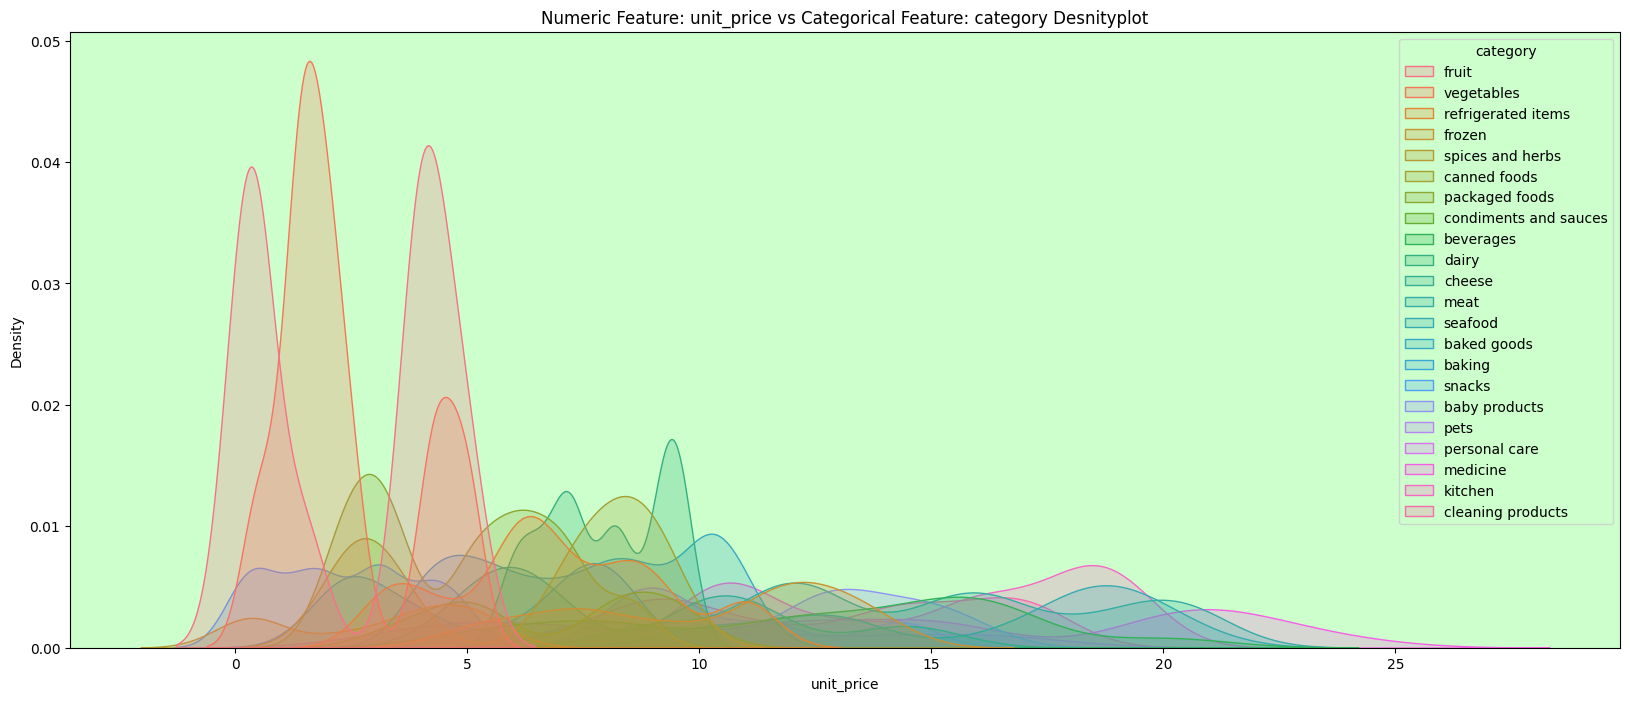

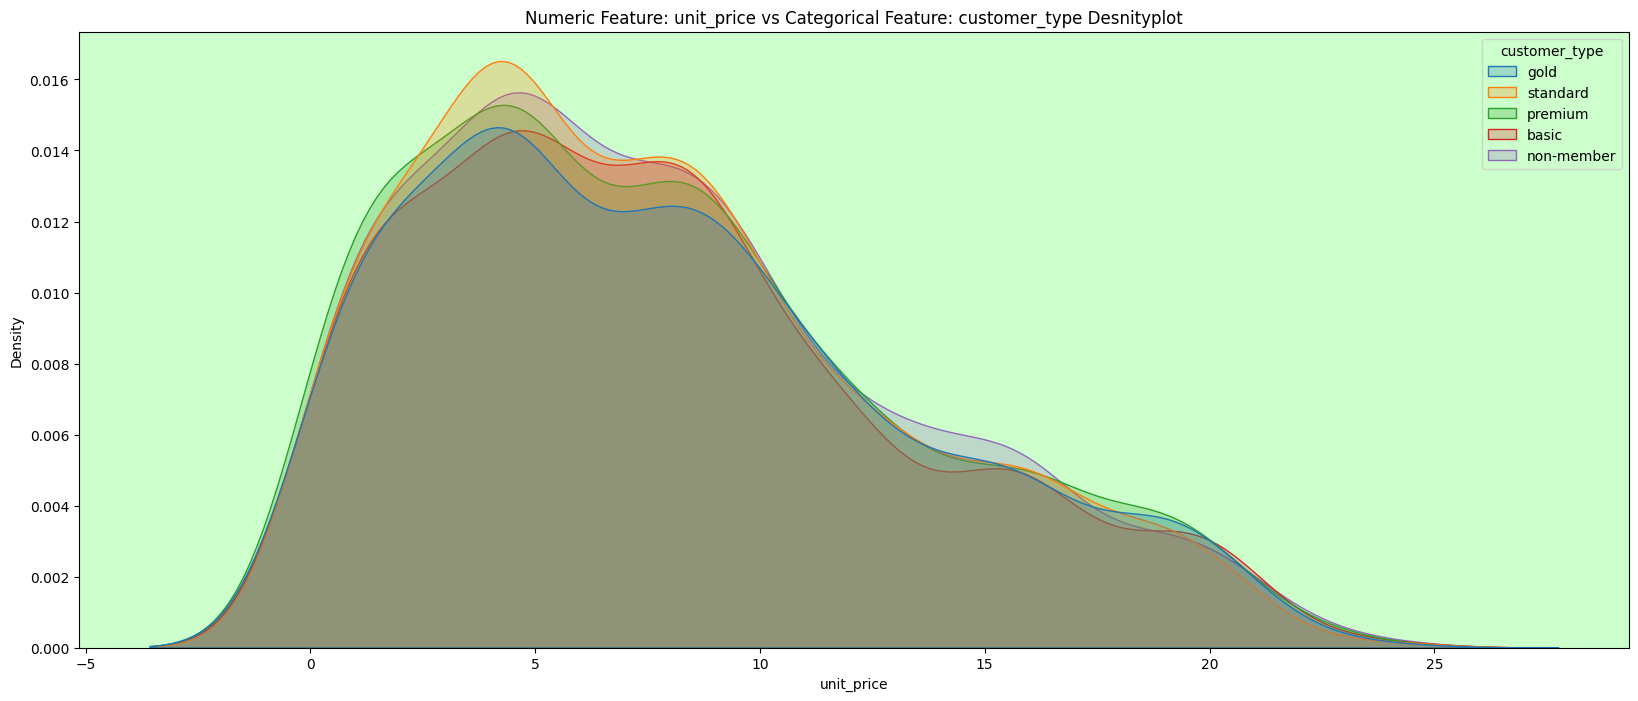

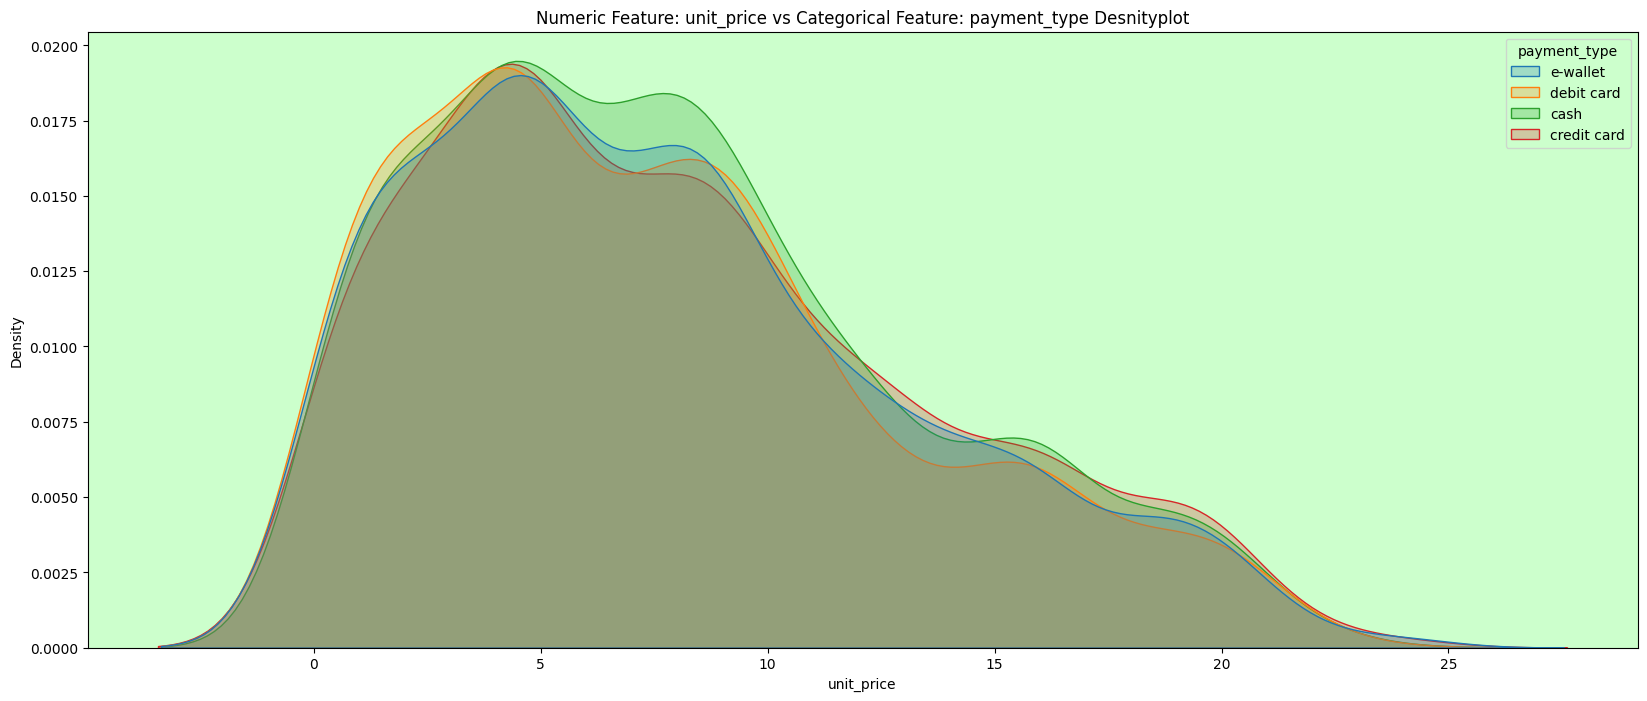

In [380]:
k=['category','customer_type','payment_type']
for i in k:
    numcatkde(num[0],i)

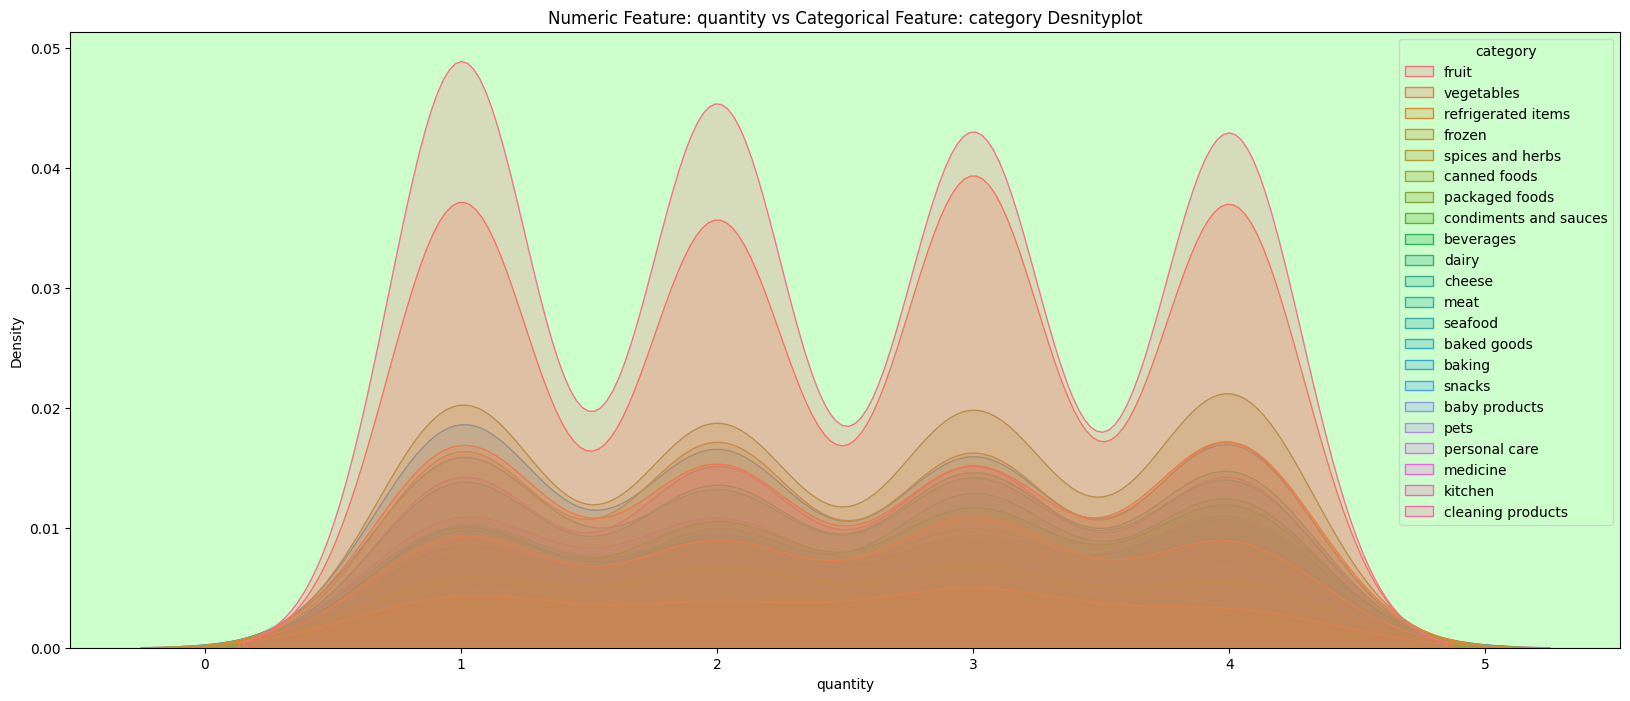

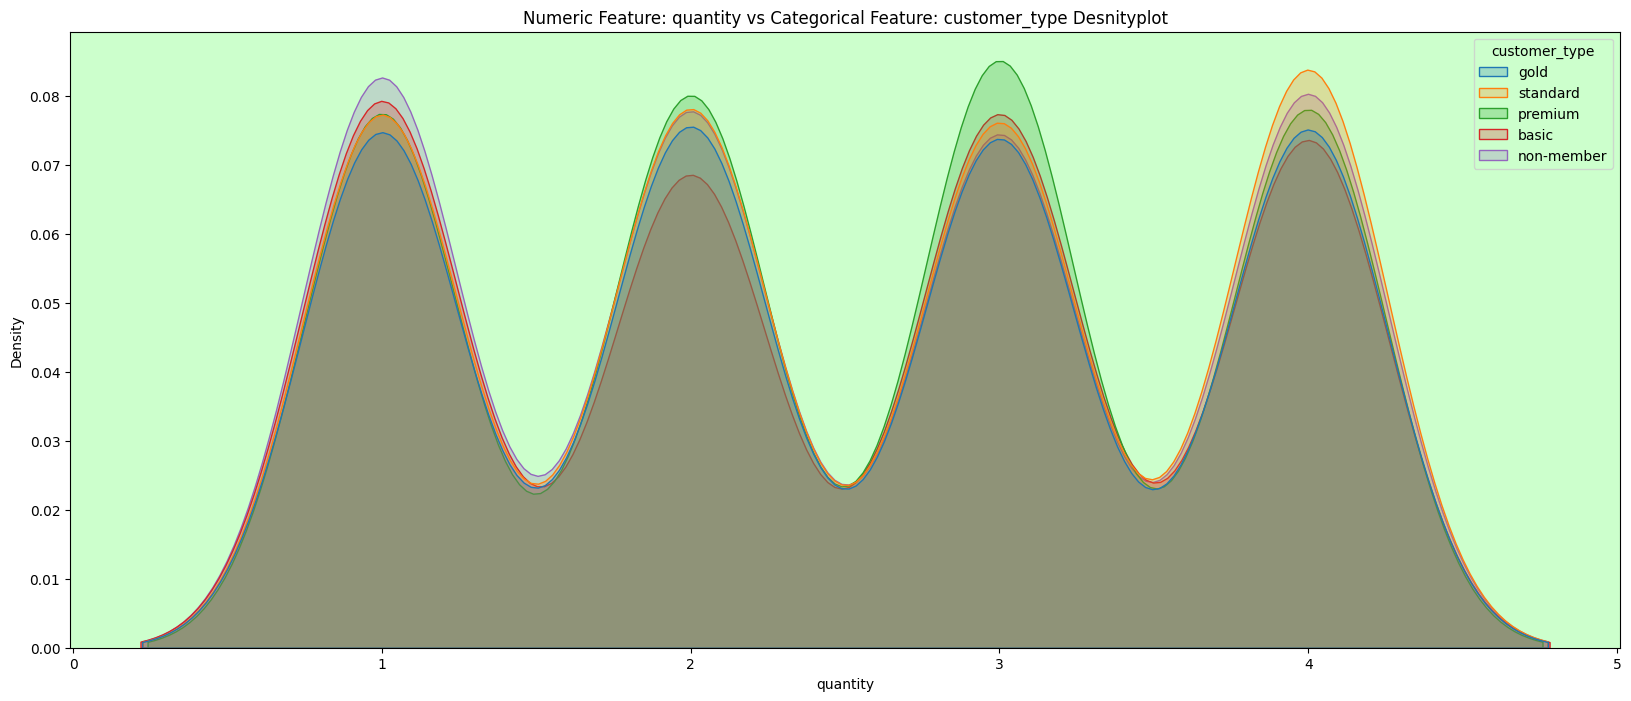

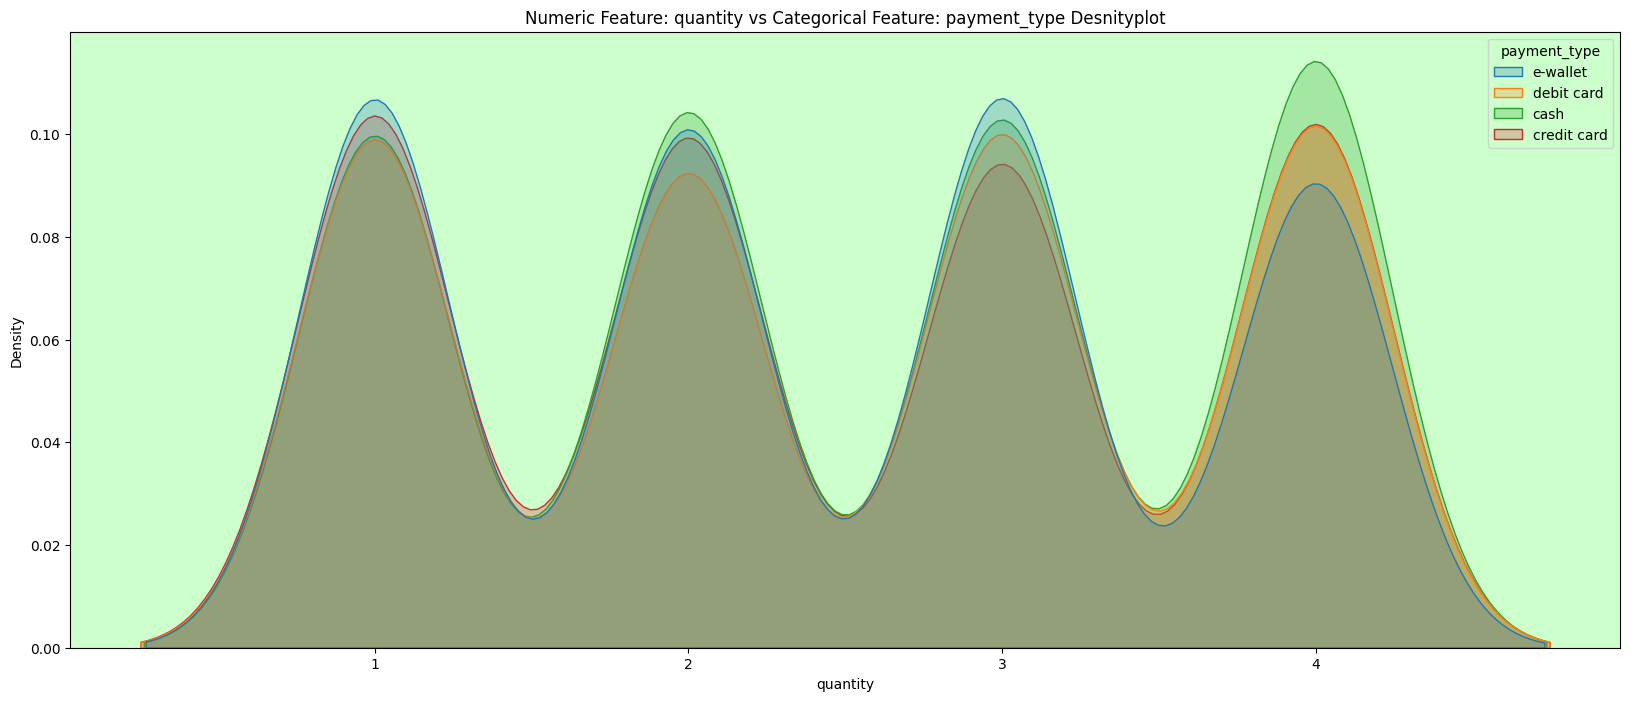

In [381]:

for i in k:
    numcatkde(num[1],i)

* More or less the Distributions looks similar for the payment_type and customer_type but it varies hugely for the Category types.

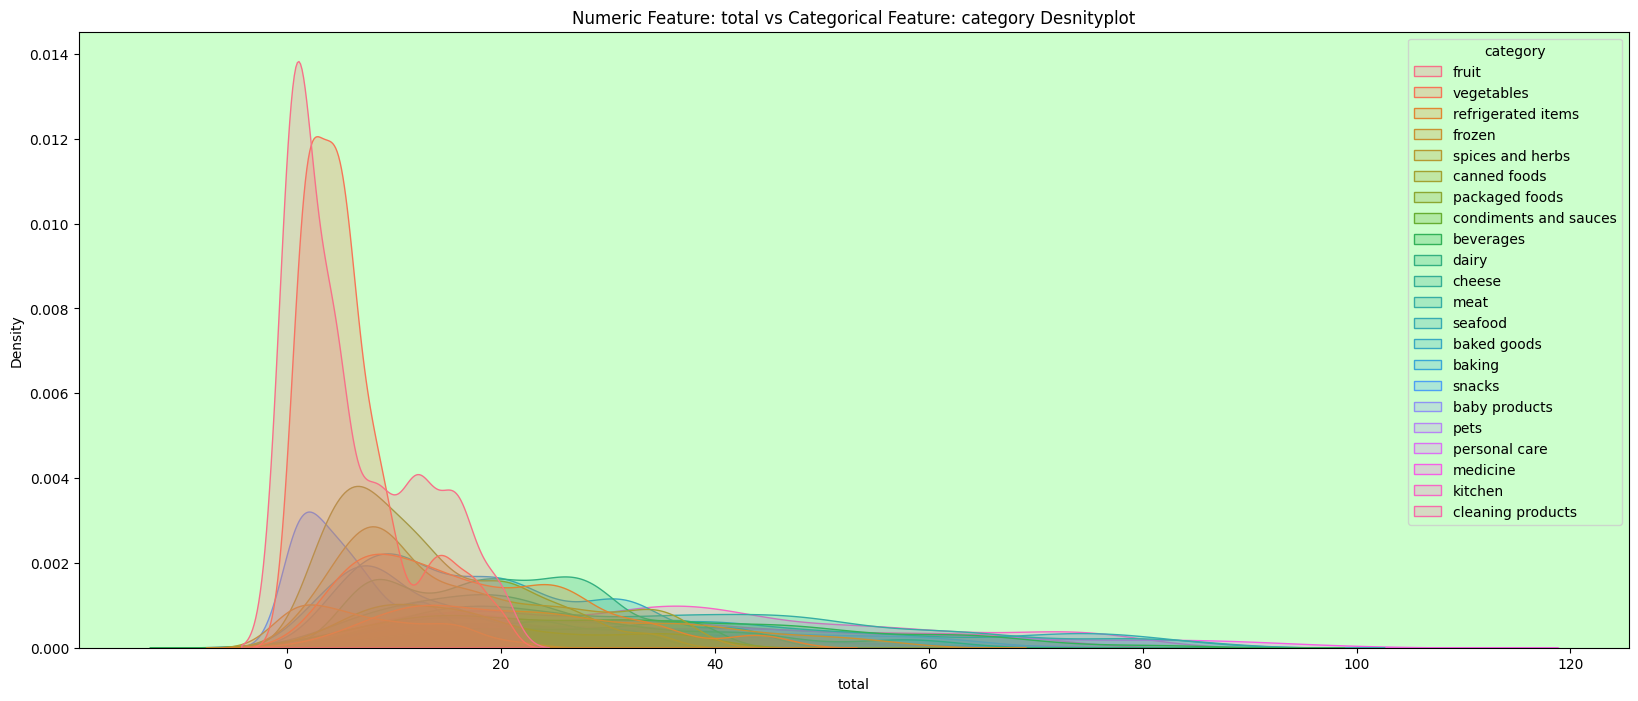

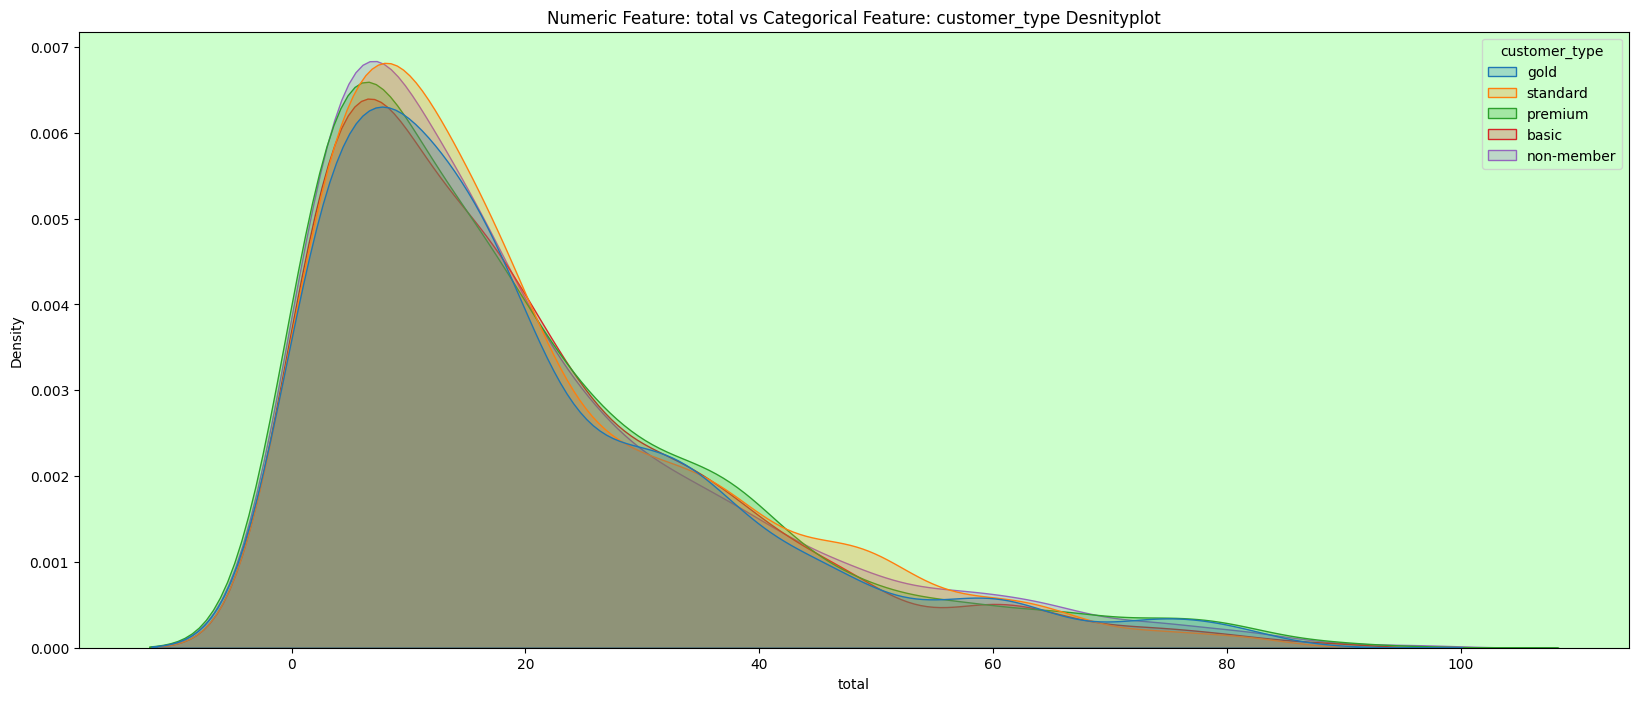

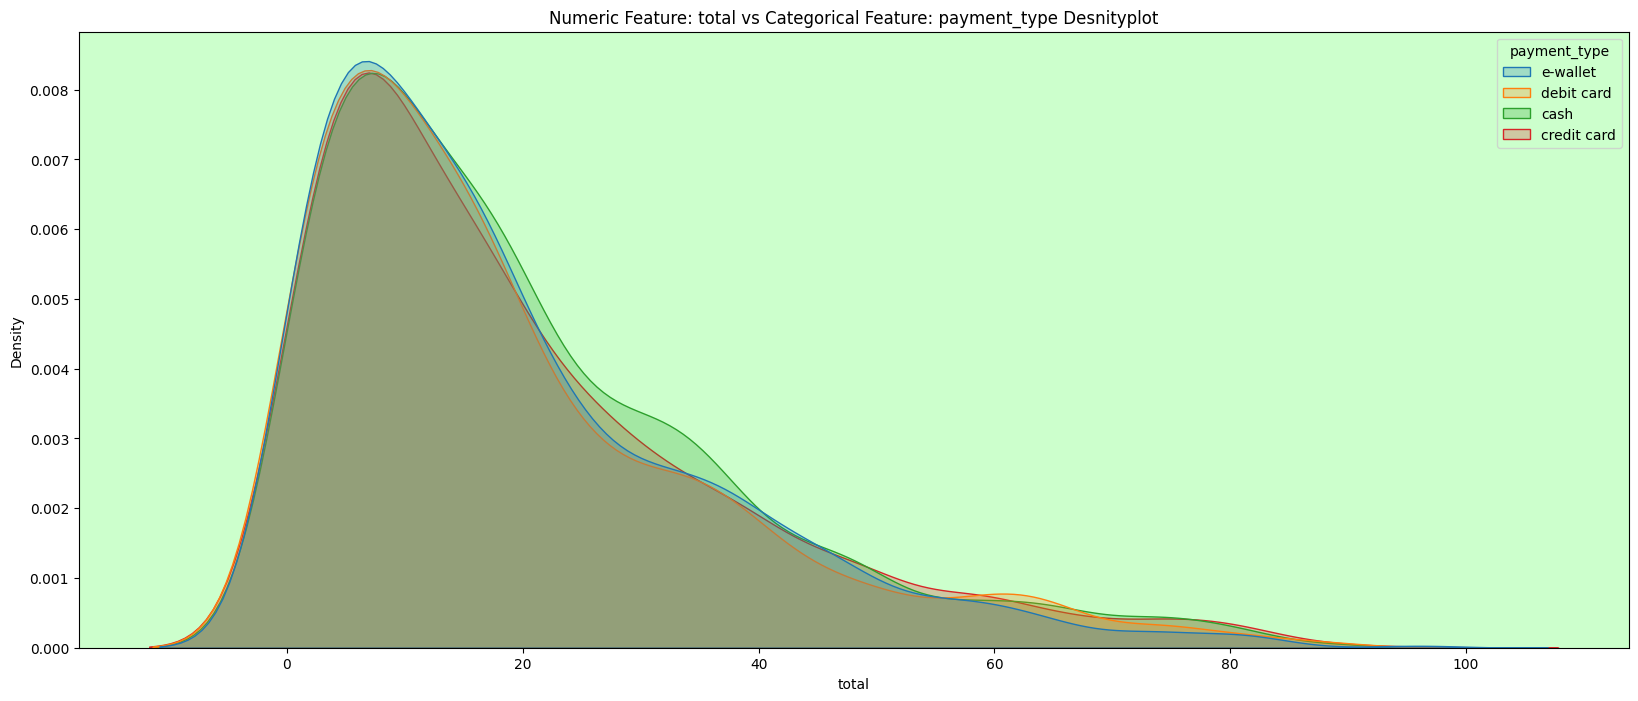

In [382]:
k=['category','customer_type','payment_type']
for i in k:
    numcatkde(num[2],i)

* More or less the Distributions looks similar for the payment_type and customer_type but it varies hugely for the Category types.

# **EXTRACTING NEW FEATURES**

In [383]:
d['date']=d['timestamp'].dt.date
d['dayofweek']=d['timestamp'].dt.dayofweek
d['hour']=d['timestamp'].dt.hour

**PIVOT CHARTS**

In [384]:
def piv(cols,val,agg):
    g=pd.pivot_table(data=d,columns=cols,values=val,aggfunc=agg)
    return g.T.sort_values(by=val,ascending=False)
def pivg(dd,fea,pal,tit):
    plt.figure(figsize=(20,8))
    sns.barplot(data=dd,y=fea,x=dd.index,palette=pal)
    for ind, val in enumerate(dd[fea]):
        plt.text(ind, val, f"{round(val,2)}", va='baseline', ha='center')
    plt.xticks(rotation=30)
    plt.title(tit)
    plt.show()

In [385]:
ci=piv(['category'],'unit_price','mean')
ci

unit_price
category                         
medicine                17.148848
seafood                 16.063518
kitchen                 15.100995
meat                    15.012513
cleaning products       12.802671
beverages               12.624551
baby products           12.285536
pets                    10.578820
frozen                  10.071369
personal care            9.198475
cheese                   8.651775
dairy                    7.980133
baked goods              7.619797
refrigerated items       6.922235
condiments and sauces    6.886685
canned foods             6.269350
baking                   5.342273
packaged foods           4.924714
spices and herbs         3.080400
fruit                    2.503627
snacks                   2.378593
vegetables               2.368369

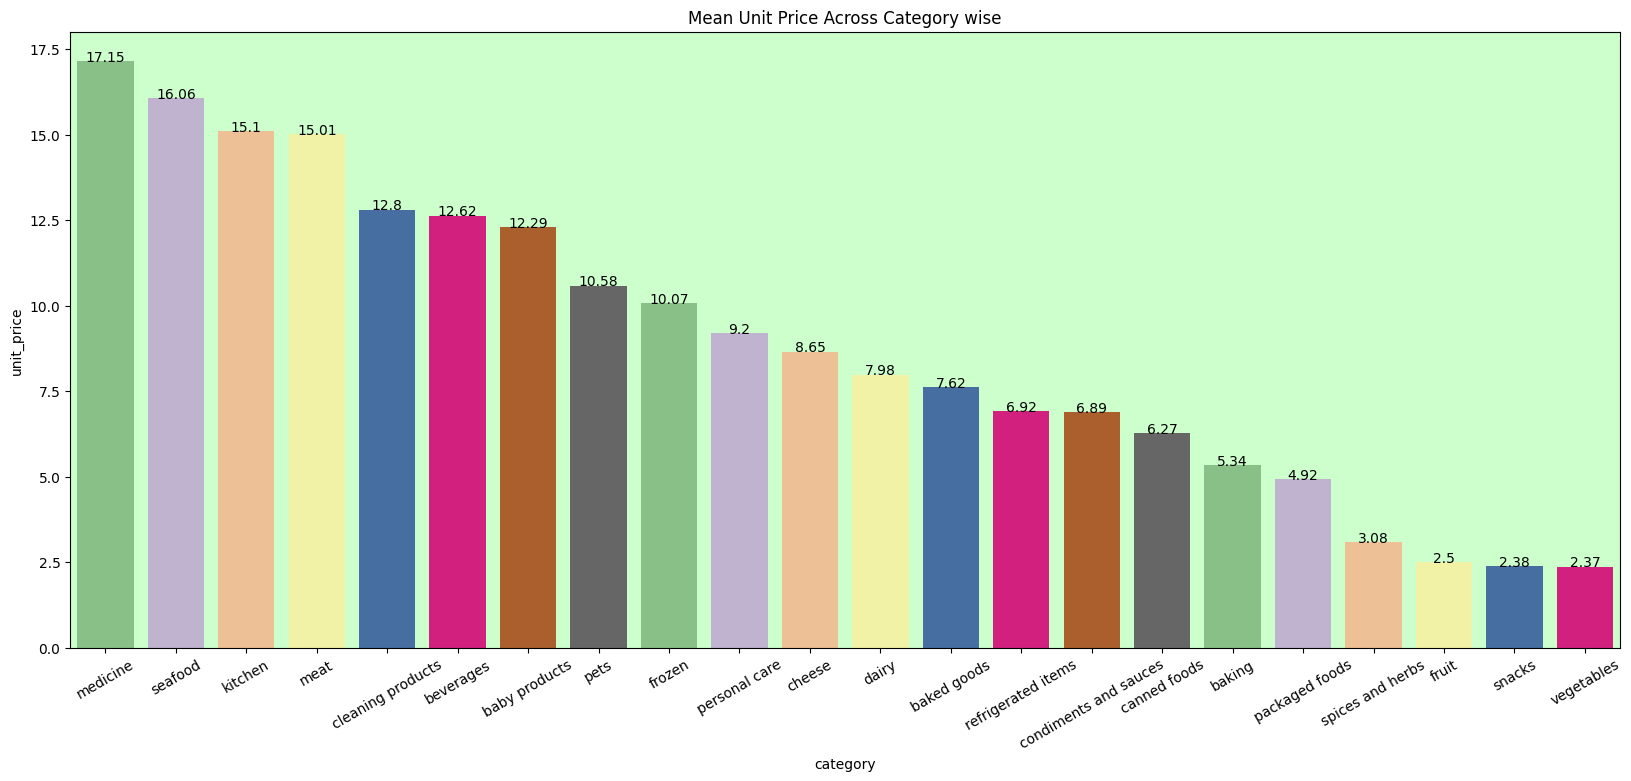

In [386]:
pivg(ci,'unit_price','Accent','Mean Unit Price Across Category wise')

* The avg unit price higly solded for the medicine, seafood and kitchen categories

In [387]:
qc=piv(['category'],'quantity','mean')
qc

quantity
category                       
cheese                 2.672355
seafood                2.644269
beverages              2.578073
personal care          2.570621
dairy                  2.533333
packaged foods         2.524655
vegetables             2.510638
canned foods           2.510441
frozen                 2.509506
refrigerated items     2.505882
kitchen                2.500000
condiments and sauces  2.486188
cleaning products      2.482877
snacks                 2.479087
medicine               2.477366
baked goods            2.458239
meat                   2.458115
baking                 2.454545
pets                   2.453416
fruit                  2.443888
spices and herbs       2.432000
baby products          2.424107

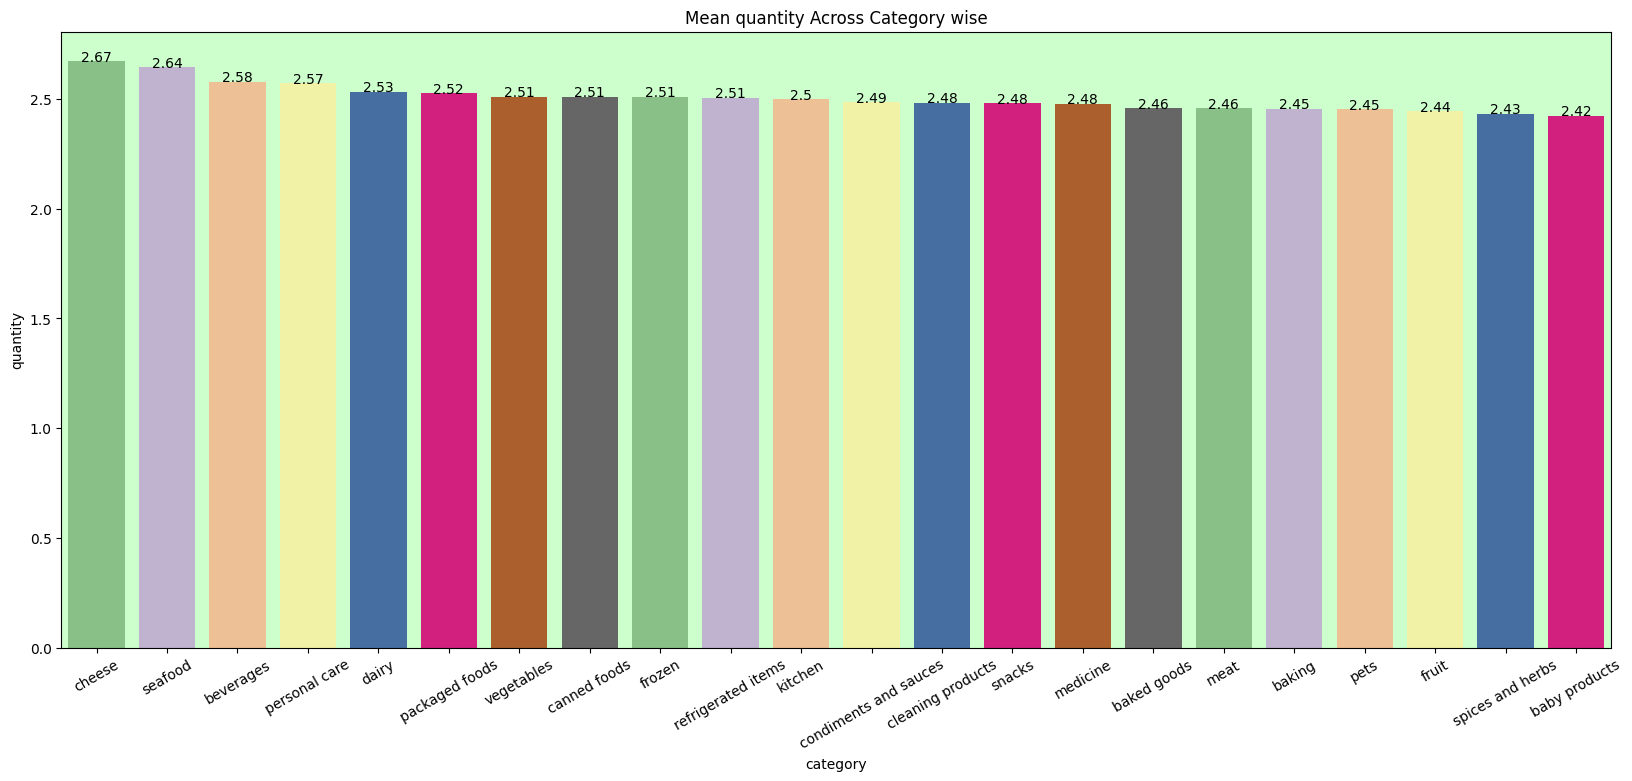

In [388]:
pivg(qc,'quantity','Accent','Mean quantity Across Category wise')

There is no larger differences in mean quantity but Cheese,bevarages and seafoods solded higher

In [389]:
tc=piv(['category'],'total','mean')
tc

total
category                        
medicine               42.772757
seafood                42.509130
kitchen                37.844634
meat                   36.917042
beverages              32.992159
cleaning products      32.478596
baby products          29.932902
pets                   26.123913
frozen                 25.057414
cheese                 23.417304
personal care          23.228531
dairy                  20.137600
baked goods            18.844718
refrigerated items     17.497529
condiments and sauces  17.191160
canned foods           15.646125
baking                 13.075076
packaged foods         12.571400
spices and herbs        7.571680
fruit                   6.136483
vegetables              5.993452
snacks                  5.913232

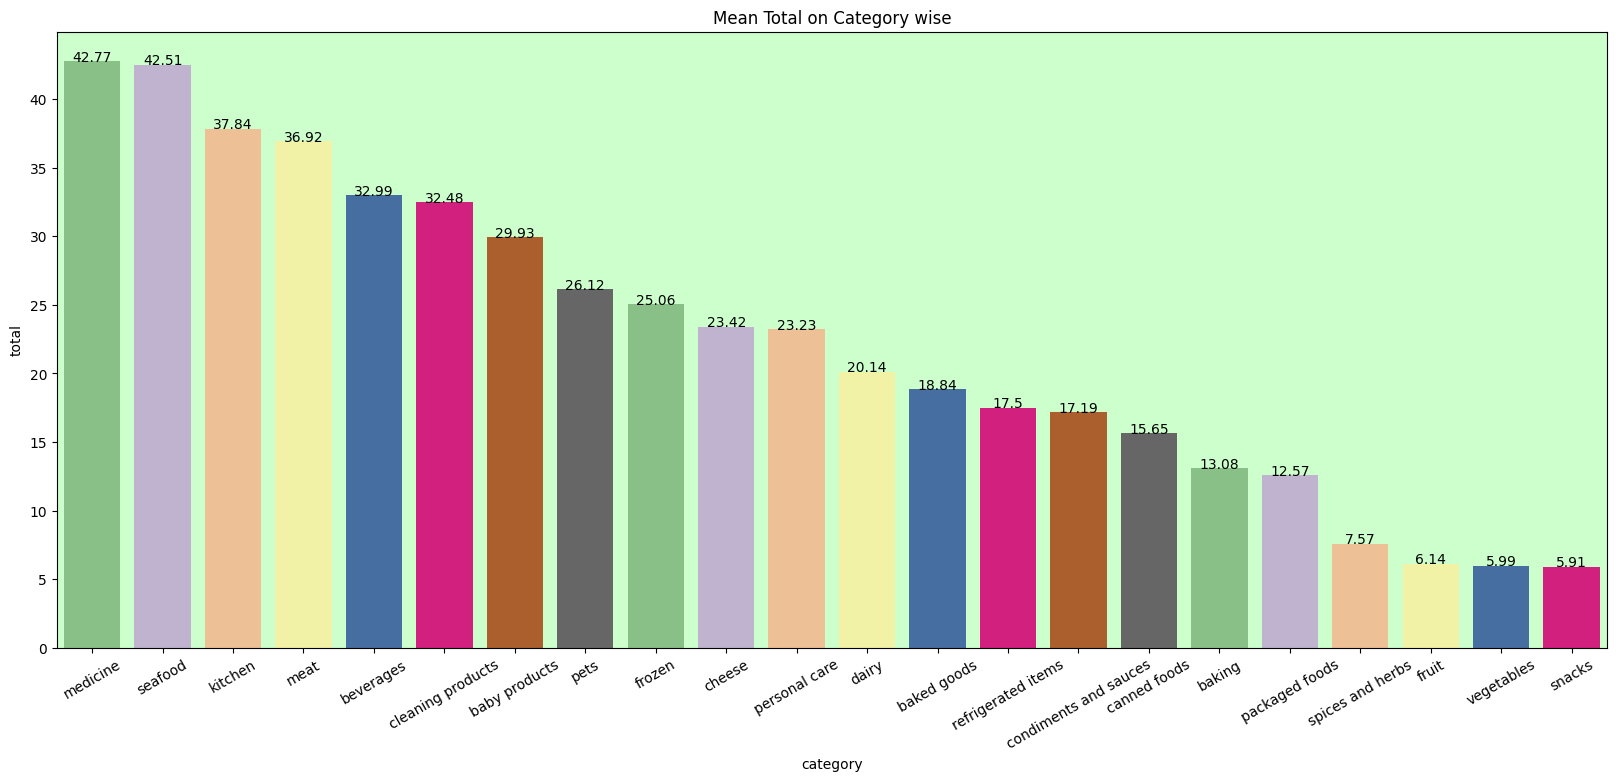

In [390]:
pivg(tc, 'total','Accent', 'Mean Total on Category wise')

* As like before in unit price, same categories such as medicine, seafood and kitchen are the higher with mean total sales

In [391]:
a=piv('customer_type','total','mean')
b=piv('customer_type','unit_price','mean')
c=piv('customer_type','quantity','mean')

In [392]:
a

total
customer_type           
premium        19.909233
non-member     19.834628
gold           19.736315
standard       19.679486
basic          19.376907

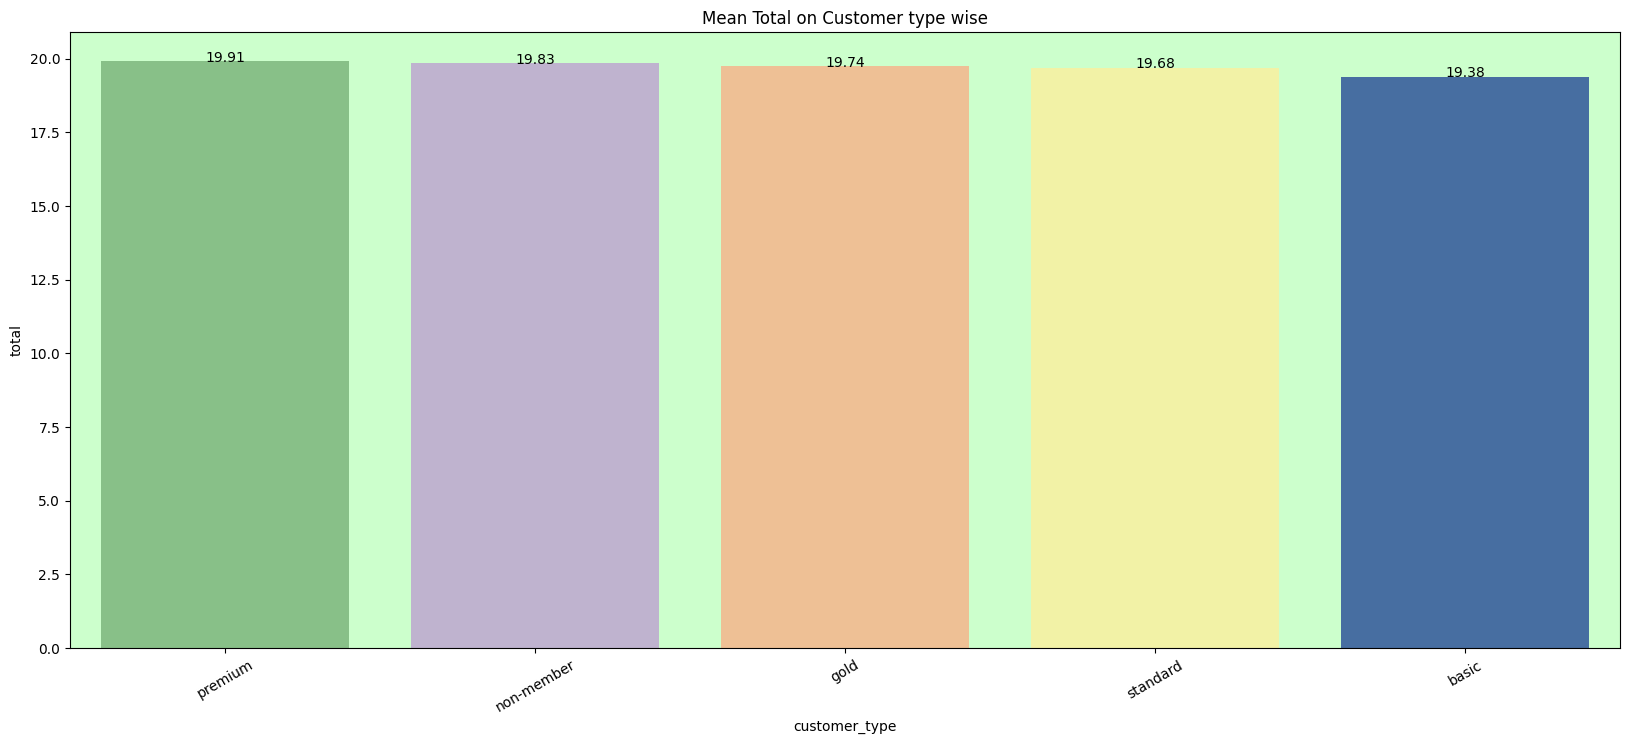

In [393]:
pivg(a, 'total','Accent', 'Mean Total on Customer type wise')

* There is no larger differences among the customer type in terms of mean total sales

In [394]:
b

unit_price
customer_type            
gold             7.888484
non-member       7.877071
basic            7.820079
premium          7.804654
standard         7.710251

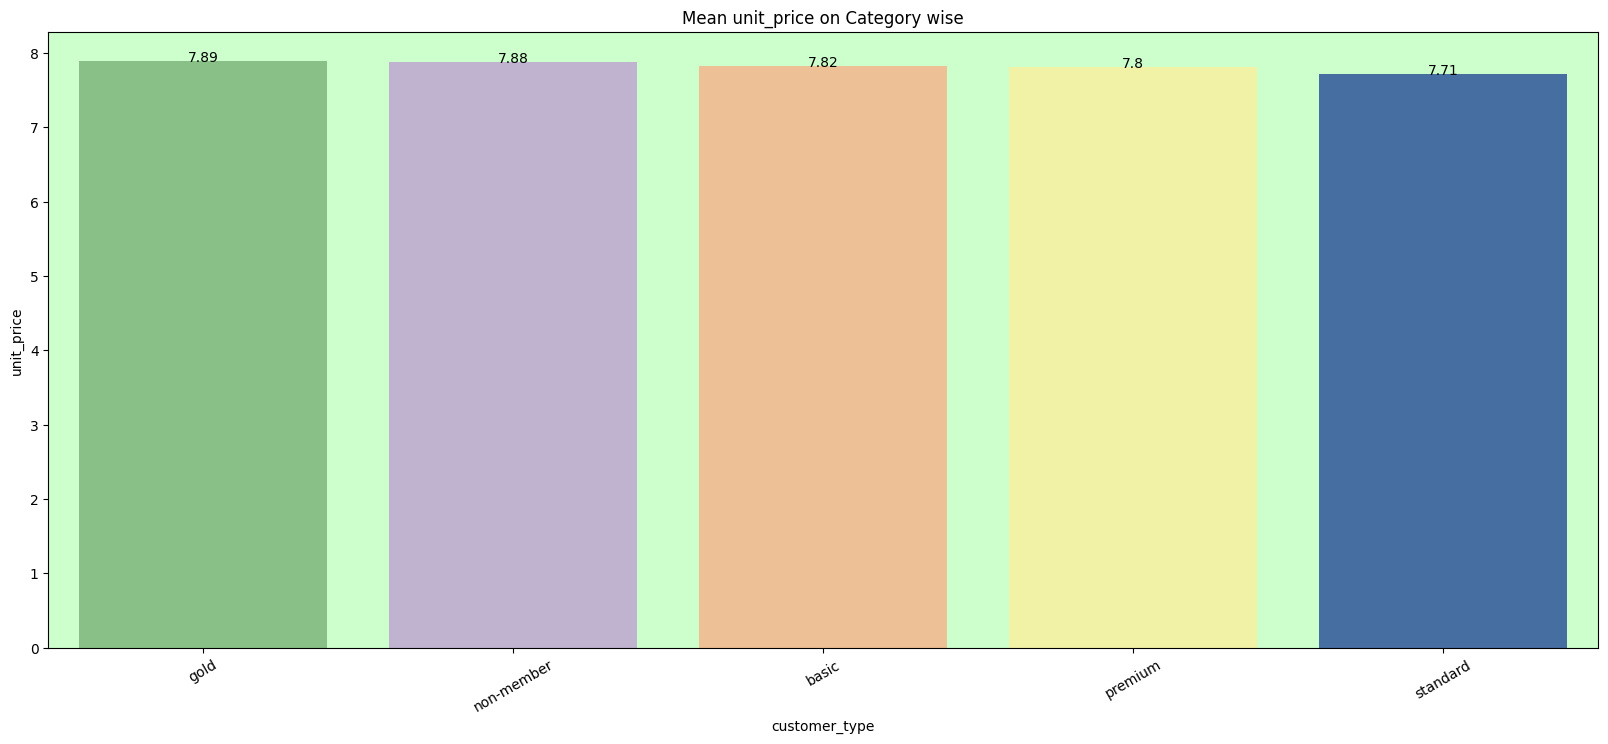

In [395]:
pivg(b, 'unit_price','Accent', 'Mean unit_price on Category wise')

* Similary, there is no larger differences among the mean Unit price accross the customer type

In [396]:
c

quantity
customer_type          
standard       2.527900
premium        2.510692
gold           2.499011
basic          2.486239
non-member     2.483448

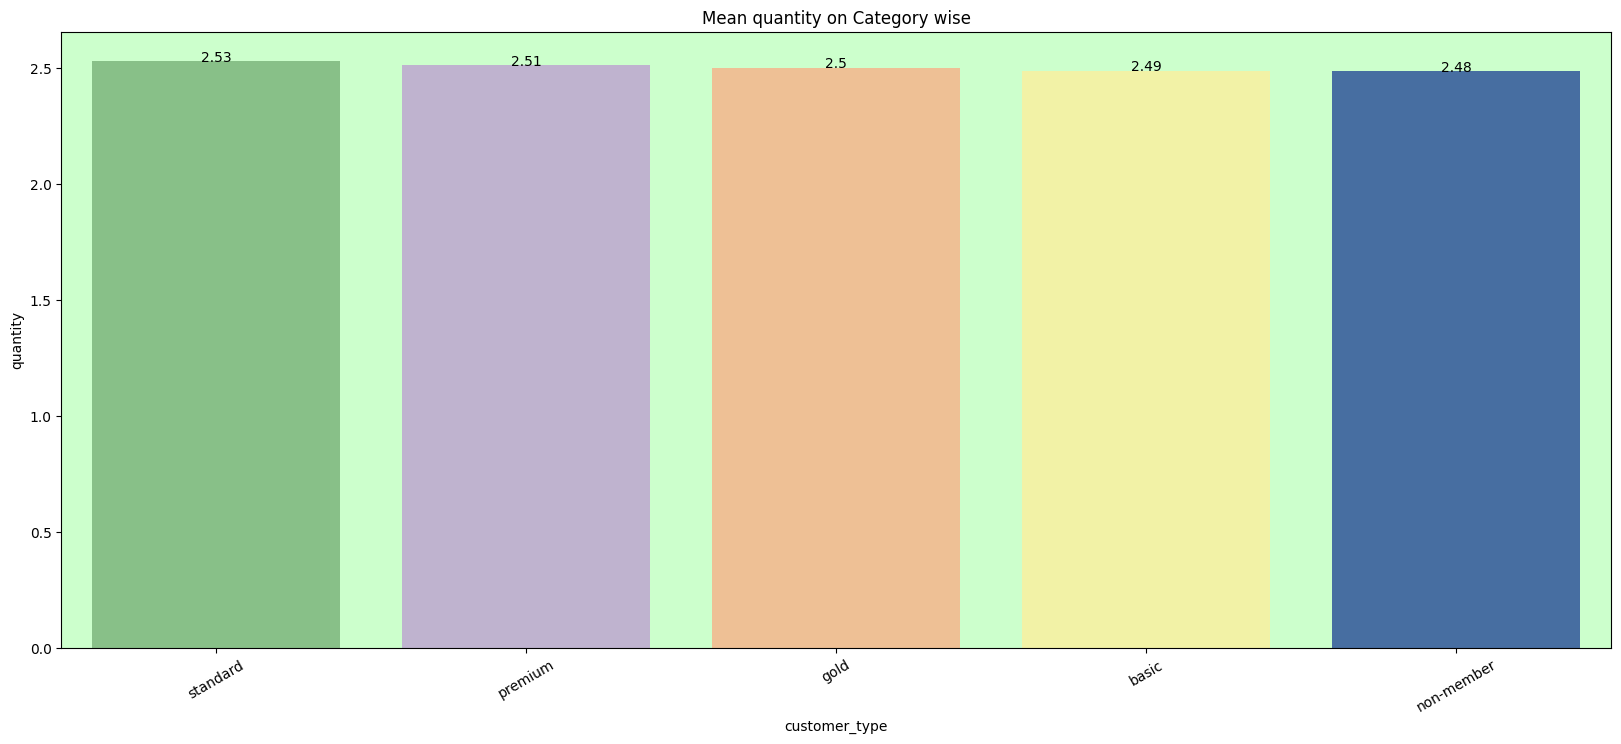

In [397]:
pivg(c, 'quantity','Accent', 'Mean quantity on Category wise')

* No, there is such a larger differences across the customer types on mean quantity consumptions.

In [398]:
p1=piv('payment_type','total','mean')
p2=piv('payment_type','unit_price','mean')
p3=piv('payment_type','quantity','mean')

In [399]:
p1

total
payment_type           
cash          20.368678
credit card   20.169071
debit card    19.296491
e-wallet      18.967106

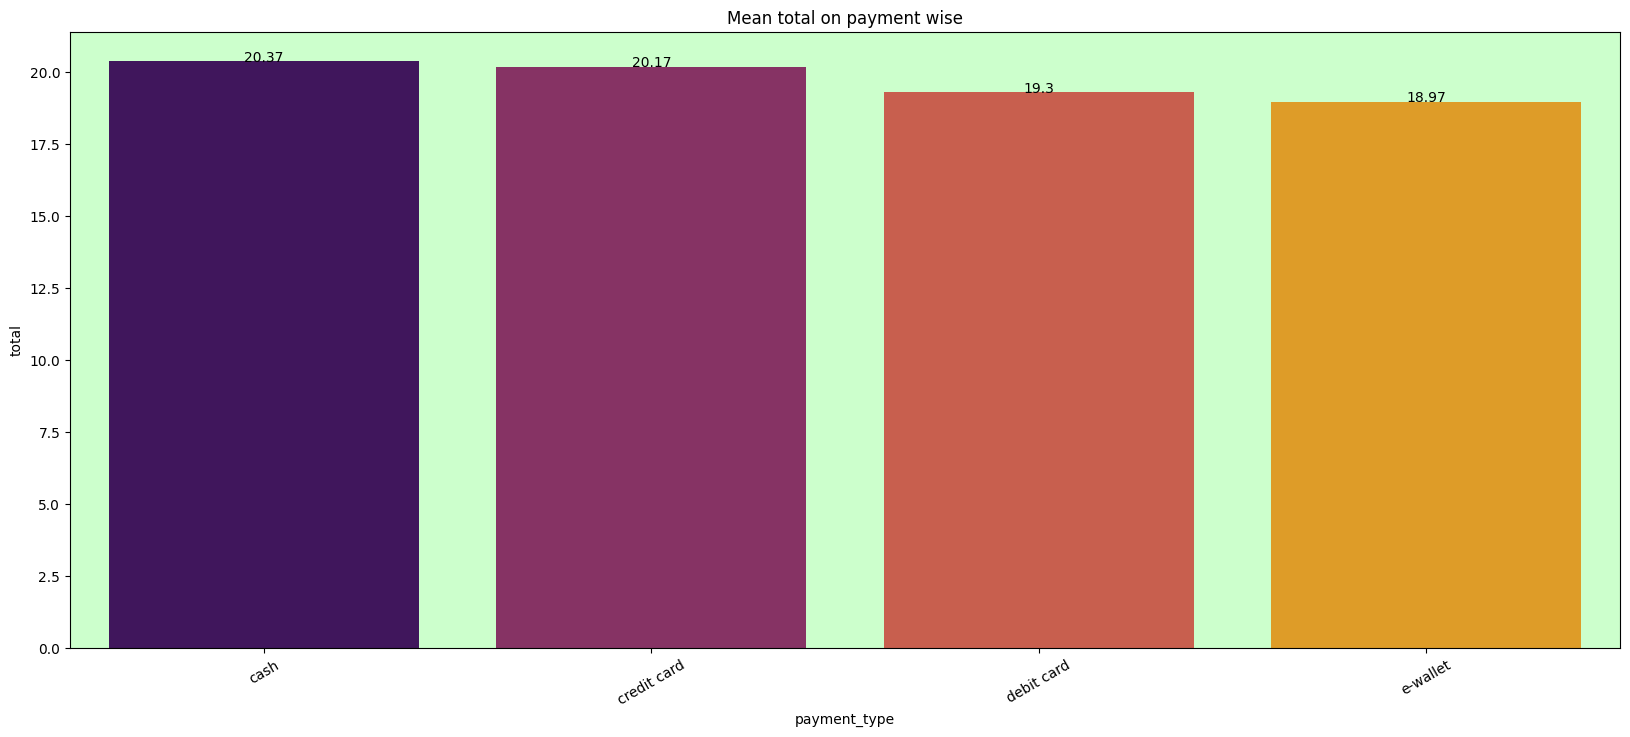

In [400]:
pivg(p1, 'total','inferno', 'Mean total on payment wise')

* As far as mean total sales on payment type there is sligher differences, where Cash and credit remains at the top

In [401]:
p2

unit_price
payment_type            
credit card     8.018579
cash            7.900952
e-wallet        7.770155
debit card      7.580824

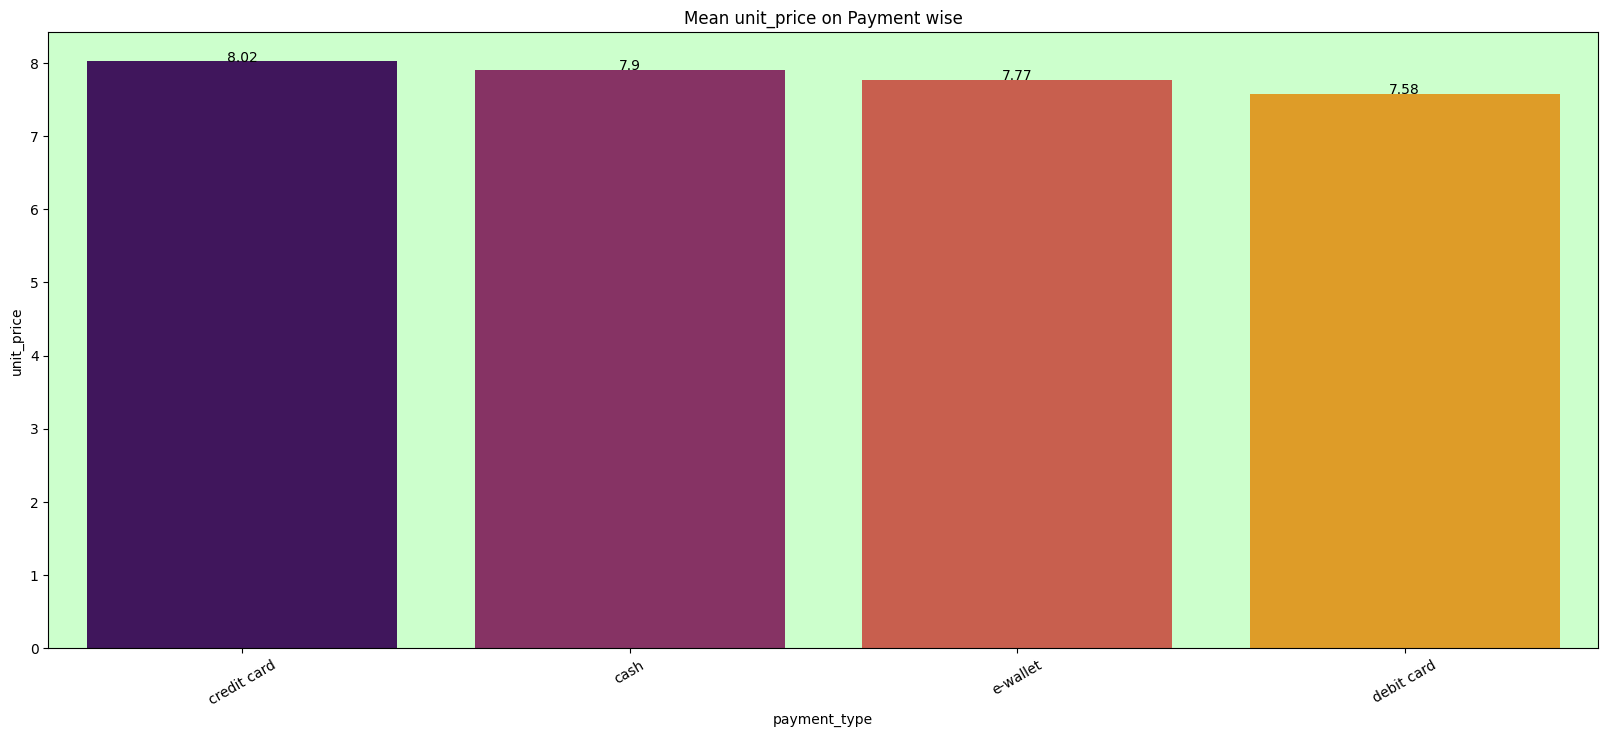

In [402]:
pivg(p2, 'unit_price','inferno', 'Mean unit_price on Payment wise')

* Mean unit price credit card tooks the first place with sligher margin with the cash

In [403]:
p3

quantity
payment_type          
cash          2.550074
debit card    2.519812
credit card   2.487429
e-wallet      2.447028

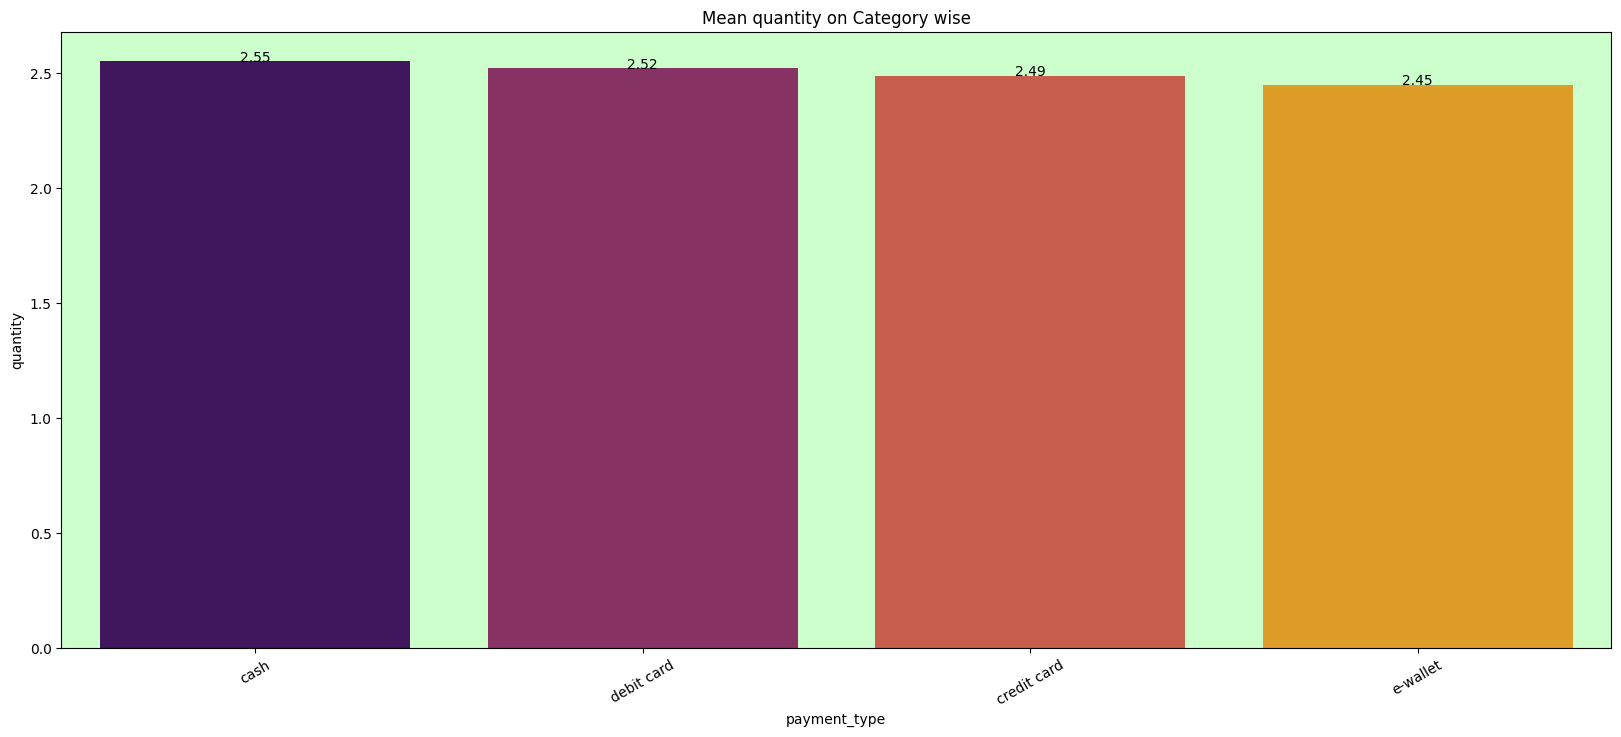

In [404]:
pivg(p3, 'quantity','inferno', 'Mean quantity on Category wise')

In terms of mean quantiy consumption across the payment type everything looks similar with sligher margins

In [405]:
h=pd.pivot_table(d,values='total',columns='hour',aggfunc='sum')
h=h.T
h

total
hour          
9     13904.25
10    13346.56
11    14997.63
12    14359.87
13    13590.22
14    13759.12
15    13563.79
16    14475.48
17    14010.43
18    14347.75
19    13953.75

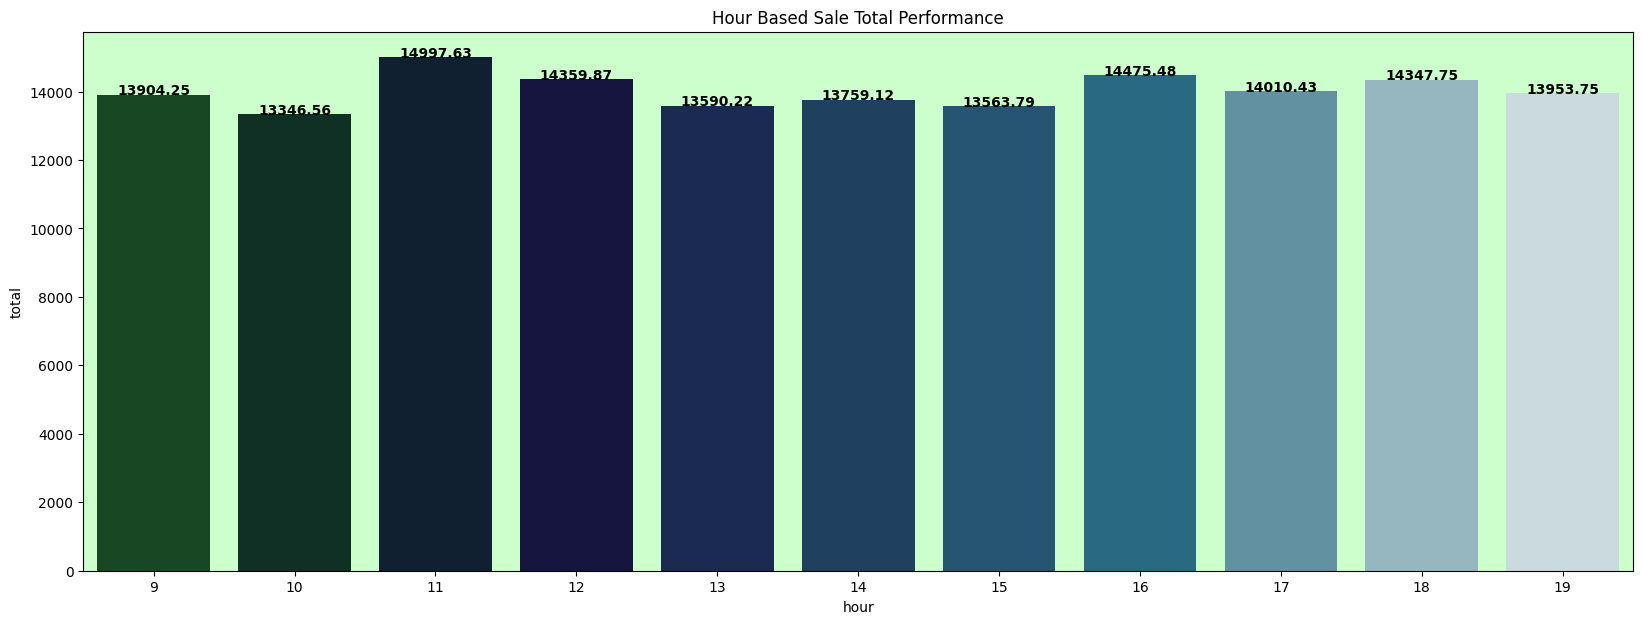

In [406]:
plt.figure(figsize=(20,7))
sns.barplot(data=h,x=h.index,y='total',palette='ocean',saturation=.5)
for i, j in enumerate(h['total']):
    plt.text(i,j, j ,va='baseline', ha='center',fontweight='bold')
plt.title('Hour Based Sale Total Performance')
plt.show()


* Peak sale timing happening  in the 14th hour and 16th hour of day.

In [407]:
hou_cus=piv(['hour','customer_type'],'total','sum').reset_index()
hou_cus

hour customer_type    total
0     18       premium  3505.94
1     12       premium  3432.50
2     16      standard  3431.76
3     11         basic  3427.31
4     11    non-member  3315.97
5     12      standard  3299.06
6     19       premium  3162.86
7      9    non-member  3156.01
8     19    non-member  3138.08
9     17      standard  3134.44
10    14    non-member  3048.03
11    17          gold  3018.34
12    18          gold  2997.76
13    13    non-member  2986.97
14    14      standard  2919.19
15     9          gold  2919.09
16    15         basic  2909.90
17    10       premium  2871.60
18    16       premium  2848.39
19    10         basic  2844.26
20    16    non-member  2834.44
21     9       premium  2824.70
22    16         basic  2823.13
23    11          gold  2813.00
24    17         basic  2780.65
25    13       premium  2769.33
26    13      standard  2746.75
27    15       premium  2744.81
28    18    non-member  2744.01
29    11      standard  2738.02
30    12    non-member  2736.22
31    14          gold  2730.54
32    17    non-member  2711.27
33    15      standard  2704.23
34    11       premium  2703.33
35    15          gold  2697.91
36    18      standard  2690.37
37    13          gold  2674.22
38    14         basic  2634.87
39    19      standard  2617.37
40    10    non-member  2577.30
41    19          gold  2555.62
42    10      standard  2555.20
43     9      standard  2552.39
44    16          gold  2537.76
45    15    non-member  2506.94
46    10          gold  2498.20
47    12          gold  2497.55
48    19         basic  2479.82
49     9         basic  2452.06
50    14       premium  2426.49
51    13         basic  2412.95
52    18         basic  2409.67
53    12         basic  2394.54
54    17       premium  2365.73

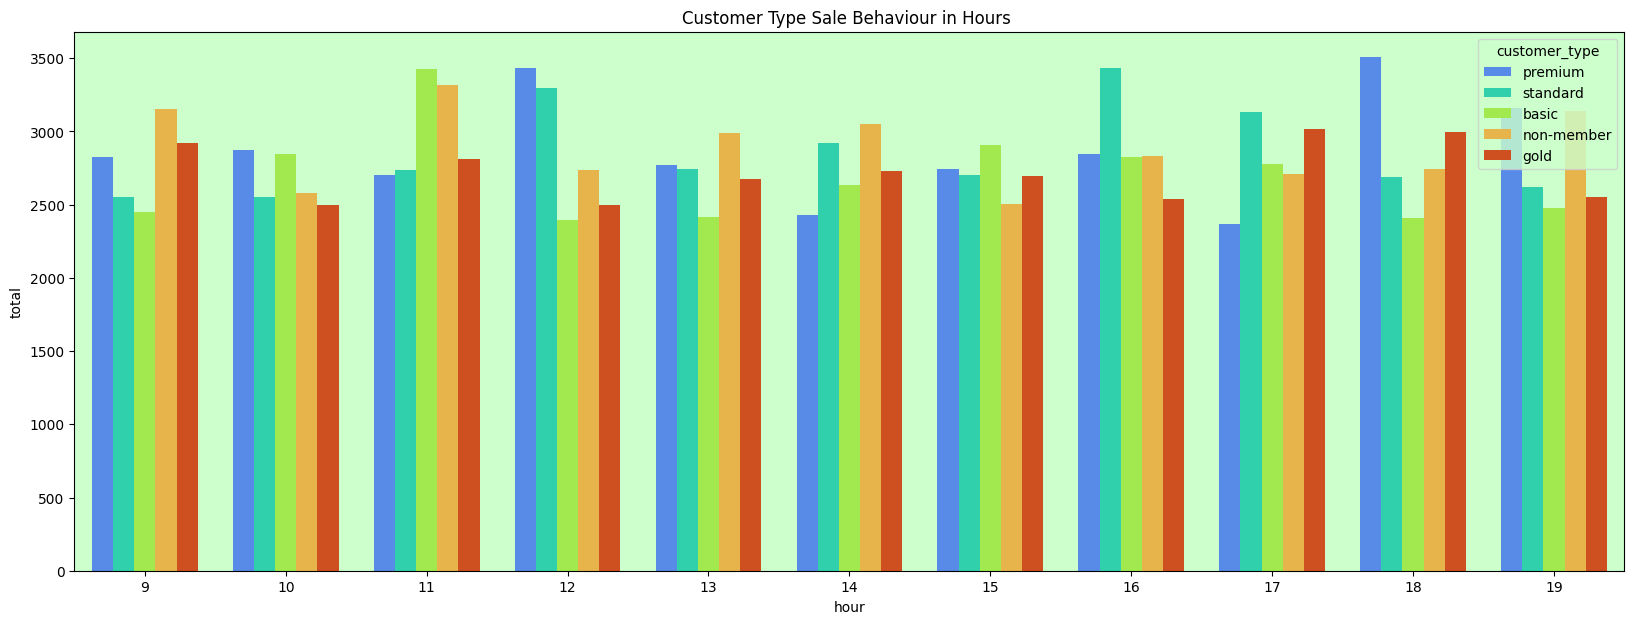

In [408]:
plt.figure(figsize=(20,7))
sns.barplot(data=hou_cus,x='hour',y='total',hue='customer_type',palette='turbo',saturation=0.8,width=.75)
plt.title('Customer Type Sale Behaviour in Hours ')
plt.show()

Based on the peak sale timing , customer types:
* Premium customers visiting mostly - 18th  and 12th hour of the day
* Standard customers visiting mostly - 16th hour of the day
* Both Basic and Non-members visiting mostly - 11th hour of the day

In [409]:
hou_pay=piv(['hour','payment_type'],'total','sum').reset_index()
hou_pay

hour payment_type    total
0     19         cash  4375.51
1     16         cash  4272.96
2     18   debit card  4102.08
3      9  credit card  4099.61
4     11         cash  4055.66
5     13  credit card  4040.64
6     12  credit card  3920.13
7     17         cash  3900.03
8     14         cash  3841.10
9     11  credit card  3818.53
10    12         cash  3711.26
11    15         cash  3692.15
12    12     e-wallet  3646.38
13    14     e-wallet  3629.25
14    11   debit card  3624.77
15     9         cash  3576.11
16    16  credit card  3562.80
17    19     e-wallet  3542.30
18    10  credit card  3521.31
19    17   debit card  3509.35
20    10   debit card  3501.46
21    11     e-wallet  3498.67
22    17  credit card  3479.41
23    16   debit card  3455.54
24    18         cash  3434.39
25    18     e-wallet  3429.51
26    13         cash  3408.34
27    18  credit card  3381.77
28    15  credit card  3329.59
29    10     e-wallet  3303.99
30    15     e-wallet  3286.19
31    15   debit card  3255.86
32     9   debit card  3190.72
33    16     e-wallet  3184.18
34    14   debit card  3165.42
35    14  credit card  3123.35
36    17     e-wallet  3121.64
37    13   debit card  3119.81
38    12   debit card  3082.10
39     9     e-wallet  3037.81
40    19  credit card  3032.38
41    13     e-wallet  3021.43
42    10         cash  3019.80
43    19   debit card  3003.56

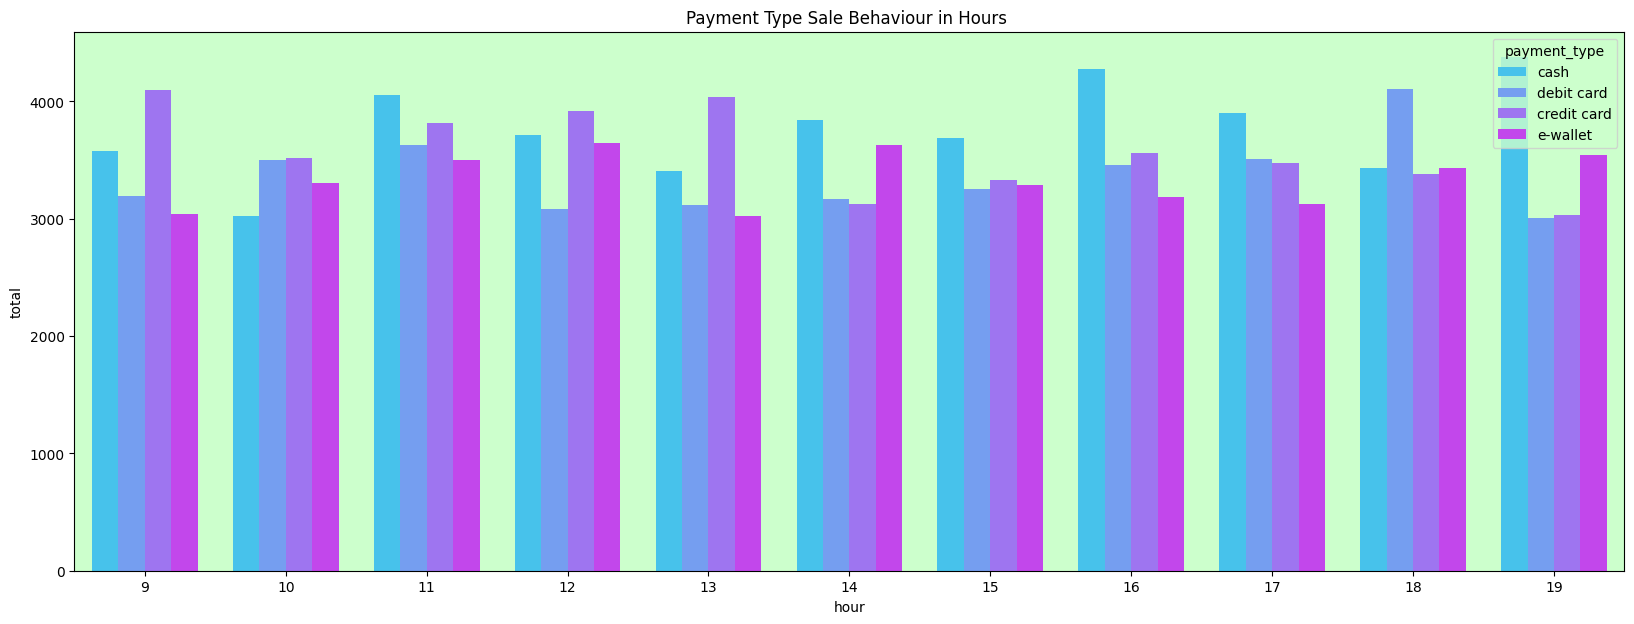

In [410]:
plt.figure(figsize=(20,7))
sns.barplot(data=hou_pay,x='hour',y='total',hue='payment_type',palette='cool',saturation=0.8,width=.75)
plt.title('Payment Type Sale Behaviour in Hours ')
plt.show()

Mode of Payments across hours
* Cash mode is highly used on -19th and 16th hour of the day.
* Debit card mode is highly pursued on -18th hour of the day(premium customers)
* Credit card mode is highly used on -9th and 13th hour of the day
* E-wallet mode is highly used on -12th  hour of the day

In [411]:
dow=piv(['dayofweek'],'total','sum')
dow=dow.sort_values(by='total',ascending=False)
dow

total
dayofweek          
2          22500.79
0          22287.17
4          22262.64
1          22183.96
6          21865.79
5          21803.03
3          21405.47

In [412]:
dow=piv(['dayofweek'],'total','sum').reset_index()
dow=dow.sort_values(by='dayofweek',ascending=True)
dow

dayofweek     total
1          0  22287.17
3          1  22183.96
0          2  22500.79
6          3  21405.47
2          4  22262.64
5          5  21803.03
4          6  21865.79

Note:
  The setfirstweekday() method sets the weekday (0 is Monday, 6 is Sunday)

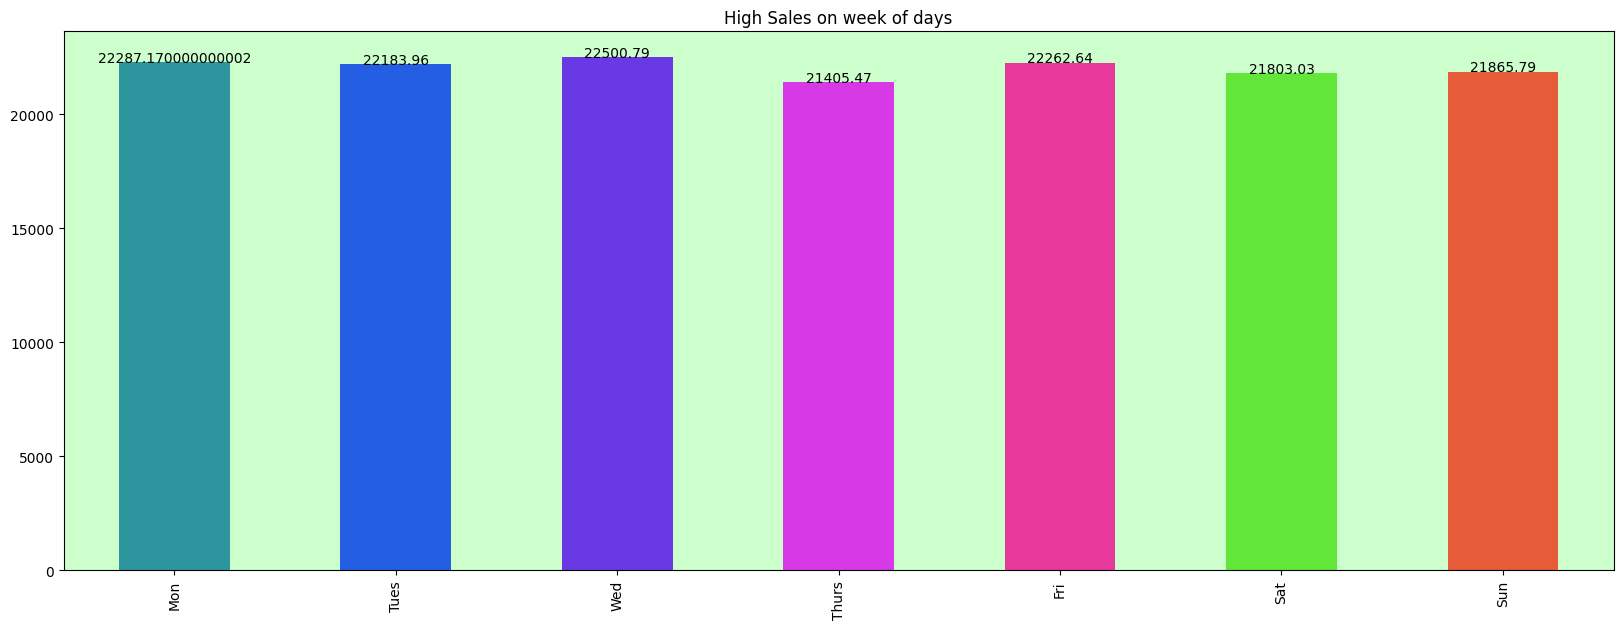

In [413]:
dow['total'].plot(kind='bar',figsize=(20,7),color=['#2c959e','#245ee3','#6a39e6','#d739e6','#e6399b','#62e639','#e65c39'],title='High Sales on week of days')
plt.xticks(ticks=[2,0,4,1,6,5,3],labels=['Wed','Mon','Fri','Tues','Sun','Sat','Thurs'])
for i,j in enumerate(dow['total']):
    plt.text(i,j,j, va='baseline',ha='center')

* From the above bar graph the Wednesday have higher sales,Monday is the 2nd to have higher sales. Thursday haveing lowest sales in the day of week.

In [414]:
t1=d.groupby(['customer_type','quantity'])['total'].sum().to_frame()
t1=t1.unstack()
t1

total                            
quantity             1        2        3         4
customer_type                                     
basic          3095.65  5688.40  9567.75  11217.36
gold           3113.01  5671.34  8750.88  12404.76
non-member     3158.60  6344.50  8607.66  13644.48
premium        2842.66  6188.26  9797.04  12827.72
standard       2872.99  6119.70  9191.85  13204.24

In [415]:
t1.columns = t1.columns.droplevel(0)
t1

quantity             1        2        3         4
customer_type                                     
basic          3095.65  5688.40  9567.75  11217.36
gold           3113.01  5671.34  8750.88  12404.76
non-member     3158.60  6344.50  8607.66  13644.48
premium        2842.66  6188.26  9797.04  12827.72
standard       2872.99  6119.70  9191.85  13204.24

Text(0, 0.5, 'Total Sale')

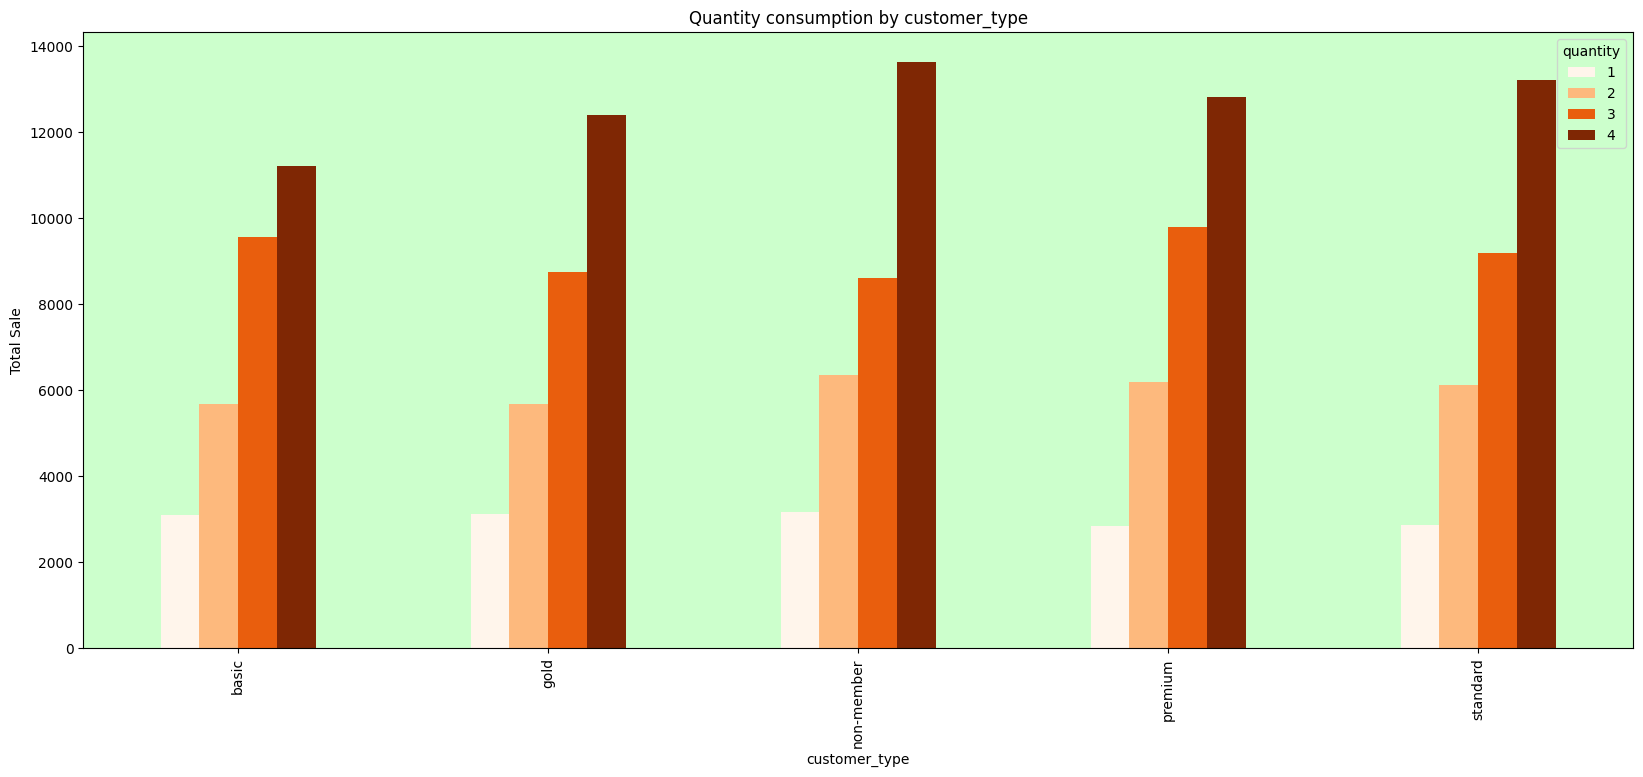

In [416]:
t1.plot(kind='bar',figsize=(20,8),title='Quantity consumption by customer_type',colormap='Oranges')
plt.ylabel('Total Sale')

* In almost every customer type category the highest number of quantity consumed by all the type is '4'

* people prefering more in quanity and the order (4 > 3 > 2> 1)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'PairGrid' object has no attribute 'suptitle'

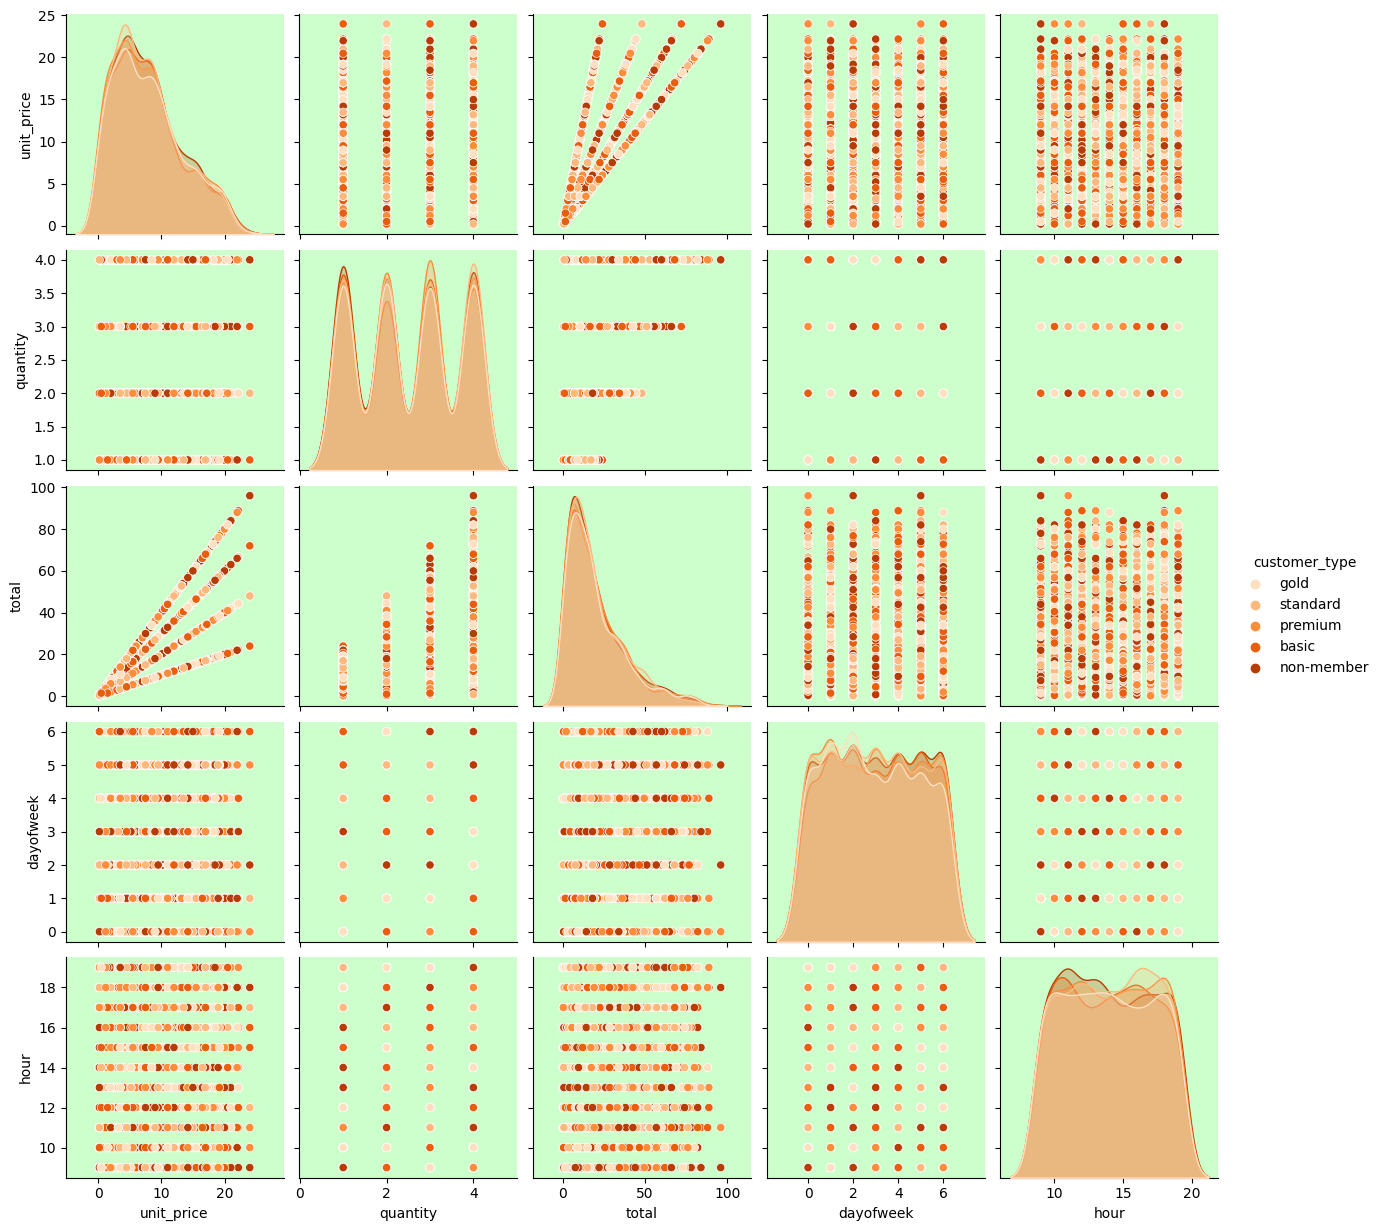

In [417]:
fig=sns.pairplot(d,palette='Oranges',hue='customer_type')
fig.suptitle('Pairplot')

# **TEST FOR INDEPENDENCE(CATEGORICAL)-CHI2 TEST**

dof = observed.size - sum(observed.shape) + observed.ndim - 1

lambda_float or str, optional
The power in the Cressie-Read power divergence statistic. The default is 1. For convenience, lambda_ may be assigned one of the following strings, in which case the corresponding numerical value is used:

"pearson" (value 1)--->
Pearson’s chi-squared statistic. In this case, the function is equivalent to chisquare.
* Used when we dont have specific reasons to choose another method.
* Used when we conducting a general test of association between the two categorical variables.

"log-likelihood" (value 0)
Log-likelihood ratio. Also known as the G-test [3].
* Used when we have small sample sizes.
* Prefered when dealing with sparese data or when we want a test that is more sensitive to deviation from independence in small samples

"freeman-tukey" (value -1/2)
Freeman-Tukey statistic.
* Used when we own sparse contigency tables and we want to account for the sparsity in the analysis.
* Used when we are dealing with large number of expected cell counts below 5.

"mod-log-likelihood" (value -1)
Modified log-likelihood ratio.

"neyman" (value -2)
Neyman’s statistic.

"cressie-read" (value 2/3)
The power recommended in [5].
* Used when we want to control the level of sensitivity to deviations from independencies.
* It will allow us to specify a power parameter and different levels of sensititvity.
* Mostly useful if we have specific requirements for our analysis.

* Effect Size:
     * 0 --> Weak Association
     * 0.1-0.3 --> Small to Moderate Association
     * 0.3-0.5 --> Moderate to Strong Association
     * close to 1 --> Strong Association

In [418]:
import pingouin as pg

In [419]:
def crosstables(cat1,cat2):
    
    w=pd.crosstab(d[cat1],d[cat2])
    print('!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    print(w)
    print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    print('')
    print('>>>>>>>>>>>>>>>>>>>>>>>> Chi-square test <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    e,o,st=pg.chi2_independence(data=d,x=cat1,y=cat2)# lambda= 'pearson association'
    print(f"Chi-Square Statistic:")
    print(st.round(3))
    print('')
    print("**********************Expected Frequencies*************************************")
    print(e)
    print("*******************************************************************************")

In [420]:
cus_qual=crosstables('customer_type','quantity')
cus_qual

!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
quantity         1    2    3    4
customer_type                    
basic          405  350  395  376
gold           379  383  374  381
non-member     420  395  378  408
premium        384  397  422  387
standard       391  395  385  424
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

>>>>>>>>>>>>>>>>>>>>>>>> Chi-square test <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Chi-Square Statistic:
                 test  lambda    chi2   dof   pval  cramer  power
0             pearson   1.000  10.520  12.0  0.570   0.021  0.175
1        cressie-read   0.667  10.520  12.0  0.570   0.021  0.175
2      log-likelihood   0.000  10.520  12.0  0.570   0.021  0.175
3       freeman-tukey  -0.500  10.522  12.0  0.570   0.021  0.175
4  mod-log-likelihood  -1.000  10.525  12.0  0.570   0.021  0.175
5              neyman  -2.000  10.534  12.0  0.569   0.021  0.176

**********************Expected Freq

* Inference:
        Since the P value(pearson) is greater than 0.05 so there is no actual relationship between the Customer type and Quantities

In [421]:
cus_pay=crosstables('customer_type','payment_type')
cus_pay

!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
payment_type   cash  credit card  debit card  e-wallet
customer_type                                         
basic           373          386         391       376
gold            358          389         352       418
non-member      434          396         402       369
premium         434          382         388       386
standard        428          396         385       386
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

>>>>>>>>>>>>>>>>>>>>>>>> Chi-square test <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Chi-Square Statistic:
                 test  lambda    chi2   dof   pval  cramer  power
0             pearson   1.000  17.135  12.0  0.145   0.027  0.282
1        cressie-read   0.667  17.116  12.0  0.145   0.027  0.282
2      log-likelihood   0.000  17.084  12.0  0.146   0.027  0.281
3       freeman-tukey  -0.500  17.066  12.0  0.147   0.027  0.281
4  mod-log-likelihood

* Inference:
        Since all the p value(pearson) are greater than 0.05 so there is no relationship between Customer type and payment modes

In [422]:
pay_qu=crosstables('payment_type','quantity')
pay_qu

!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
quantity        1    2    3    4
payment_type                    
cash          480  502  495  550
credit card   506  485  460  498
debit card    483  451  488  496
e-wallet      510  482  511  432
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

>>>>>>>>>>>>>>>>>>>>>>>> Chi-square test <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Chi-Square Statistic:
                 test  lambda    chi2  dof   pval  cramer  power
0             pearson   1.000  17.613  9.0  0.040   0.027  0.331
1        cressie-read   0.667  17.687  9.0  0.039   0.027  0.333
2      log-likelihood   0.000  17.843  9.0  0.037   0.028  0.336
3       freeman-tukey  -0.500  17.966  9.0  0.036   0.028  0.338
4  mod-log-likelihood  -1.000  18.095  9.0  0.034   0.028  0.341
5              neyman  -2.000  18.371  9.0  0.031   0.028  0.346

**********************Expected Frequencies*************************************
qu

* Inference:
        Since all the p value(pearson) are lower than 0.05 so there is a relationship between Payment Mode  and Quantity.
        
        when considering the effect size , it has very weak association between the payment type and quantity variables

In [423]:
cat_cus=crosstables('category','customer_type')
cat_cus

!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
customer_type          basic  gold  non-member  premium  standard
category                                                         
baby products             49    46          45       39        45
baked goods               87    73          85       89       109
baking                    53    55          47       55        54
beverages                 66    47          57       63        68
canned foods              89    77          88       93        84
cheese                    42    63          77       60        51
cleaning products         57    56          67       63        49
condiments and sauces     35    37          37       37        35
dairy                     71    71          82       76        75
frozen                    45    59          48       55        56
fruit                    186   197         187      206       222
kitchen                   85    79          64       76       

* Inference:
        Since all the p value(pearson) are greater than 0.05 so there is no relationship between Customer type and category.

In [424]:
cat_qu=crosstables('category','quantity')
cat_qu

!!!!!!!!!!!!!!!!!!!!! Actual Frequencies !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
quantity                 1    2    3    4
category                                 
baby products           57   67   48   52
baked goods            122  107  103  111
baking                  73   63   63   65
beverages               69   71   79   82
canned foods           106  110  104  111
cheese                  57   66   86   84
cleaning products       77   75   62   78
condiments and sauces   43   48   49   41
dairy                   92   89   96   98
frozen                  65   61   75   62
fruit                  271  251  238  238
kitchen                 93   98   98   93
meat                   107   87   94   94
medicine                60   65   60   58
packaged foods         129  118  125  135
personal care           39   43   50   45
pets                    39   51   30   41
refrigerated items     112  100   99  114
seafood                 54   58   65   76
snacks                  69   62   69  

* Inference:
        Since all the p value(pearson) are greater than 0.05 so there is no relationship between Category type and quantity.

# **CONCLUSION**

* Fruits, Vegetables, Packaged foods and baked goods were the top selling categories
* Non-Members of customer type were the people who highly visiting the store.
* Fruits, Vegetables, Packaged foods and baked goods were the top selling categories
* Non-Members of customer type were the people who highly visiting the store.
* Correlations:
    * Unit price vs Quantity (0.0246)-which is a weak positive correlation between them.
    *  Quantity vs Total (0.521)- which says that there is a Modereate positive correlation btw them.
    *  Total vs Unit price (.792)- which implies very strong positive relationship between these two features.
* Unit price against the Category feature, the spread among the categories are uneven
* Minimum is equal to lower quartile and Maximum is equal to upper quartile -----> Refrigerated items, Packaged foods and Cleaning Products
* quantity spread across the customer type is varies a lot.
* The avg unit price higly solded for the medicine, seafood and kitchen categories
* There is no larger differences in mean quantity but Cheese,bevarages and seafoods solded higher
* In unit price, same categories such as medicine, seafood and kitchen are the higher with mean total sales.
* There is no larger differences among the customer type in terms of mean total sales
* Similary, there is no larger differences among the mean Unit price accross the customer type
* No, there is such a larger differences across the customer types on mean quantity consumptions.
* Mean total sales on payment type there is sligher differences, where Cash and credit remains at the top
* Mean unit price credit card tooks the first place with sligher margin with the cash
* Peak sale timing happening  in the 14th hour and 16th hour of day.
* Based on the peak sale timing , customer types:
    * Premium customers visiting mostly - 18th  and 12th hour of the day
    * Standard customers visiting mostly - 16th hour of the day
    * Both Basic and Non-members visiting mostly - 11th hour of the day
* Mode of Payments across hours
    * Cash mode is highly used on -19th and 16th hour of the day.
    * Debit card mode is highly pursued on -18th hour of the day(premium customers)
    * Credit card mode is highly used on -9th and 13th hour of the day
    * E-wallet mode is highly used on -12th  hour of the day
* From the above bar graph the Wednesday have higher sales,Monday is the 2nd to have higher sales. Thursday haveing lowest sales in the day of week.
* In almost every customer type category the highest number of quantity consumed by all the type is '4'
* people prefering more in quanity and the order (4 > 3 > 2> 1)
* For Chi2 test of independence:
           Since all the p value(pearson) are lower than 0.05 so there is a relationship between Payment Mode  and Quantity. When considering the effect size , it has very weak association between the payment type and quantity variables

# **KINDLY UPVOTE THE NOTEBOOK IF YOU FIND IT INSIGHTFUL**